In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
from functools import partial
import seaborn as sns
from google.colab import drive
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from math import sqrt
from scipy import stats
from sklearn.svm import SVR
import matplotlib


In [2]:
def test_model_reg(model, model_name, x_train, y_train, x_test, y_test):
  model.fit(x_train,y_train)
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  mae_train = mean_absolute_error(y_train, y_train_pred)
  mae_test = mean_absolute_error(y_test, y_test_pred)
  
  rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

  scores = {
      'r2': {'train':r2_train, 'val': r2_test},
      'rmse': {'train':rmse_train, 'val': rmse_test},
      'mae': {'train':mae_train, 'val': mae_test}
  }
  
  plt.scatter(y_test,y_test_pred, s=5)
  plt.xlabel('GT')
  plt.ylabel('Predicted')
  plt.gca().set_aspect('equal')
  plt.title(model_name)
  plt.show()
  plt.close()
  
  return scores

def plot_r2(model_names, model_scores_t, model_scores_v):
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel(r'$R^2$')
  plt.xticks(rotation=45, ha='right')
  plt.ylim(-0.1, 1)
  plt.legend()
  plt.show()
  plt.close()

def plot_score_reg(model_names, model_scores_t, model_scores_v):
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('score')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

def plot_mae(model_names, model_scores_t, model_scores_v):
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('MAE')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

def plot_rmse(model_names, model_scores_t, model_scores_v):
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel('RMSE')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()  

In [3]:
def test_model_class(model, model_name, x_train, y_train, x_test, y_test):
  model.fit(x_train,y_train)
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)

  score_train = model.score(x_train,y_train)
  score_test = model.score(x_test,y_test)

  f1_test = f1_score(y_test, y_test_pred) #, average='micro')
  f1_train = f1_score(y_train, y_train_pred) #, average='micro')

  # con_mtx = confusion_matrix(y_test, y_test_pred)

  precision_test = precision_score (y_test, y_test_pred,zero_division=0) #, average='micro')
  precision_train= precision_score (y_train, y_train_pred,zero_division=0) #, average='micro')

  recall_test = recall_score(y_test, y_test_pred )#, average='micro')
  recall_train = recall_score(y_train, y_train_pred )#,  average='micro')

  scores = {
      'Score': {'train':score_train, 'val': score_test},
      'F1': {'train':f1_train, 'val': f1_test},
      'Precision': {'train':precision_train, 'val': precision_test},
      'Recall': {'train':recall_train, 'val': recall_test},
      'AP': None,
      'PR_curve': None,
  }

  try:
    y_test_pred_proba = model.predict_proba(x_test)
    y_train_pred_proba = model.predict_proba(x_train)

    ohe = OneHotEncoder(sparse=False)
    y_train_oh = ohe.fit_transform(y_train.reshape((-1, 1))) 
    y_test_oh = ohe.fit_transform(y_test.reshape((-1, 1)))

    ap_test = average_precision_score(y_test_oh, y_test_pred_proba)
    ap_train = average_precision_score(y_train_oh, y_train_pred_proba)
    
    pr_curve_test = precision_recall_curve(y_test, y_test_pred_proba[:, -1])
    pr_curve_train = precision_recall_curve(y_train, y_train_pred_proba[:, -1])
  
    scores['AP'] = {'train':ap_train, 'val': ap_test}
    scores['PR_curve'] = {'train':pr_curve_train, 'val': pr_curve_test}
  except AttributeError as e:
    print(e)
  
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize = 'true')
  plt.title(model_name)
  plt.show()
  plt.close()

  return scores

def plot_score_generic(model_names, model_scores_t, model_scores_v, score_name):
  plt.plot(model_names, model_scores_t, '*', label = 'training')
  plt.plot(model_names, model_scores_v, '*', label = 'validation')
  plt.ylabel(score_name)
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.show()
  plt.close()

def plot_score(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='score')

def plot_f1_score(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='f1')

def plot_score_precision(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='precision')

def plot_score_recall(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='recall')
  
def plot_score_ap(model_names, model_scores_t, model_scores_v):
  plot_score_generic(model_names, model_scores_t, model_scores_v, score_name='AP')

def plot_curve_generic(model_names, model_scores_t, model_scores_v, x_score_name, y_score_name):
  for mn, (precision, recall, thresholds) in zip(model_names, model_scores_t):
    plt.plot(recall, precision, '--', label = f'{mn} training')
  for mn, (precision, recall, thresholds) in zip(model_names, model_scores_v):
    plt.plot(recall, precision, '-', label = f'{mn} validation')
  
  plt.ylabel(y_score_name)
  plt.xlabel(x_score_name)
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.show()
  plt.close()

In [4]:
def merge_results_dict(res_merge_into, res_merge_from):
  if len(res_merge_into) == 0:
    for k, v_from in res_merge_from.items():
      if type(v_from) not in [list, np.ndarray]:
        continue
      res_merge_into[k] = v_from.copy()
    return

  for k, v_from in res_merge_from.items():
    if type(v_from) not in [list, np.ndarray]:
      continue
      
    if k not in res_merge_into:
      raise ValueError(f'Unexpected key in new result dict: {k}')

    v_into = res_merge_into[k]

    if type(v_from) == list and type(v_into) == list:
      v_into.extend(v_from)
    elif type(v_from) == np.ndarray and type(v_into) == np.ndarray:
      v_new = np.concatenate((v_into, v_from))
      res_merge_into[k] = v_new
    # elif type(v_into) == list:
    #   v_into.append(v_from)
    # else:
    #   v_new = [v_into, v_from]
    #   res_merge_into[k] = v_new

In [5]:
def grid_reg(model, params, features, target):
  scoring = {'r2': make_scorer(r2_score),
           'rmse': make_scorer(mean_squared_error),
           'mae': make_scorer(mean_absolute_error)
           }

  #####
  if type(params) == list: 
    results = {}  
    found_params = {}  
    for params_i in params:
      print(f'found_params={found_params}, params_i={params_i}')
      test_params = found_params.copy() 
      for k,v in params_i.items():
        print(f'k={k}, v={v}, test_params={test_params}')
        test_params[k] = v
        print(f'new test_params={test_params}')
      model_grid = GridSearchCV(model, test_params, scoring=scoring, refit='r2') 
      model_grid.fit(features, target)

      found_params = {k:[v] for k, v in  model_grid.best_params_.items()}

      merge_results_dict(results, model_grid.cv_results_)
       
    grid_results = pd.DataFrame(results)
  else:
    model_grid = GridSearchCV(model, params, scoring=scoring, refit='r2')
    model_grid.fit(features, target)
    grid_results = pd.DataFrame(model_grid.cv_results_)
    
  ####
  
  
  #grid_results['params'] = list(map(lambda n: str(list(n.values())), grid_results['params']))
  grid_results['root_mean_test_mse'] = list(map(lambda n: sqrt(n), grid_results['mean_test_rmse']))
  params_list = grid_results['params']
  our_list = []
  features_list = list(set().union(*(d.keys() for d in params_list)))
  pairs = {}

  for params_dict in params_list:
    our_str = ""
    for i, k in enumerate(features_list):
      if params_dict.get(k) is not None:
        our_str += chr(i + 65) +':'+ str(params_dict[k]) + " "
        pairs[k] = chr(i + 65)
        
    our_list.append(our_str.strip())

  grid_results['params'] = our_list
  our_list = grid_results['params']
  
  return model_grid,grid_results,pairs

def plot_cv_r2(model_name, model_params, model_r2,pairs):
    fig, ax = plt.subplots()
    fig.set_size_inches(30,10)
    plt.plot(model_params, model_r2, label = 'r2', color='blue')
    plt.xticks(rotation=90, ha='right')
    plt.title(model_name)

    parameter_labels = []
    for k, v in pairs.items():
      parameter_labels.append(f'{k}={v}')

    text = '\n'.join(parameter_labels)
    plt.legend()
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')
    plt.show()
    plt.close()


def plot_mae_mse(model_name, model_params, model_mse, model_mae, pairs):
    fig, ax = plt.subplots()
    fig.set_size_inches(30,10)
    plt.plot(model_params, model_mae, label='mae')
    plt.plot(model_params, model_mse, label='rmse')
    plt.xticks(rotation=90, ha='right')
    plt.title(model_name)
    
    parameter_labels = []
    for k, v in pairs.items():
        parameter_labels.append(f'{k}={v}')
    text = '\n'.join(parameter_labels)
    
    plt.legend()
    
    
    ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')
    
    plt.show()
    plt.close()



In [6]:
def grid_class(model, params,features, target):
  scoring = {'accuracy': make_scorer(accuracy_score),
                    'precision': make_scorer(precision_score, zero_division=0, average='macro'),
                    'recall': make_scorer(recall_score, average='macro'), 
                    'f1': make_scorer(f1_score, average='macro')}

  
  ######
  if type(params) == list: 
    results = {}  
    found_params = {}  
    for params_i in params:
      #print(f'found_params={found_params}, params_i={params_i}')
      test_params = found_params.copy() 
      for k,v in params_i.items():
        #print(f'k={k}, v={v}, test_params={test_params}')
        test_params[k] = v
        #print(f'new test_params={test_params}')
      model_grid = GridSearchCV(model, test_params, scoring=scoring, refit='f1') 
      model_grid.fit(features, target)

      found_params = {k:[v] for k, v in  model_grid.best_params_.items()}

      merge_results_dict(results, model_grid.cv_results_)
    
      
    df_grid = pd.DataFrame(results)
  else:
    model_grid = GridSearchCV(model, params, scoring=scoring, refit='f1')
    model_grid.fit(features, target)
    df_grid = pd.DataFrame(model_grid.cv_results_)
    
  #####

  
  #df_grid['params'] = list(map(lambda n: str(list(n.values())), df_grid['params']))
  params_list = df_grid ['params']
  our_list = []
  features_list = list(set().union(*(d.keys() for d in params_list)))
  pairs = {}
  
  for params_dict in params_list:
    
    our_str = ""
    for i, k in enumerate(features_list):
      if params_dict.get(k) is not None:
        our_str += chr(i + 65) +':'+ str(params_dict[k]) + " "
        pairs[k] = chr(i + 65)
        
    our_list.append(our_str.strip())

  df_grid ['params'] = our_list
  our_list = df_grid ['params']
  
  return model_grid, df_grid, pairs

def plot_cv_metrics(model_name, model_params, model_f1, model_recall, model_precision, model_accuracy ,pairs):
  fig, ax = plt.subplots()
  fig.set_size_inches(30,10)
  plt.plot(model_params, model_f1, label = 'f1')
  plt.plot(model_params, model_recall, label = 'recall')
  plt.plot(model_params, model_precision, label = 'precision' )
  plt.plot(model_params, model_accuracy, label = 'accuracy' )
  plt.xticks(rotation=90, ha='right')
  plt.title(model_name)
  parameter_labels = []
  for k, v in pairs.items():
    parameter_labels.append(f'{k}={v}')
  text = '\n'.join(parameter_labels) 
  plt.legend()   
  ax.text(1.05, 0.95, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top')  
  plt.show()
  plt.close() 

In [7]:
def corr_reg(x, y,**kws):
    
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.1f}".format(r),
                xy=(0.2, 0.95),
                xycoords=ax.transAxes, size = 20)
     
def corrfunc(x, y, **kws):
    
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
  
    n = len([c for c in ax.get_children() if 
                  isinstance(c, matplotlib.text.Annotation)])
    pos = (.1, .9 - .1*n)
    color = sns.color_palette()[sns.color_palette().index(kws['color'])]
    ax.annotate("{}: r = {:.2f}".format(kws['label'], r), xy=pos, xycoords=ax.transAxes, color=color)

def plot_pair_grid_ref(df, hue):
  g = sns.PairGrid(data=df, hue=hue, height=4, aspect=1.5)
  g.map_upper(sns.regplot, scatter_kws={'s':6},line_kws = {'color': 'black'})
  g.map_lower(corr_reg)
  g.map_lower(sns.kdeplot)
  g.map_diag(sns.histplot)
def plot_pair_grid_class(df, hue):
  g = sns.PairGrid(data=df, hue=hue, height=4, aspect=1.5)
  g.map_upper(sns.regplot, scatter_kws={'s':6},line_kws = {'color': 'black'})
  g.map_lower(corrfunc)
  g.map_lower(sns.kdeplot,gridsize=150)
  g.map_diag(sns.histplot)  

In [8]:
def best_model(features, target, mode, grid, df, hue, models):
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

  models_fit_info = None

  if mode == 'regression':
    plot_pair_grid_ref(df, hue = None)

    models_fit_info = {
        'LinearRegression': {'model': LinearRegression(),'param':{}},
        #'RandomForestRegressor': {'model': RandomForestRegressor( n_jobs = 1 ),'param' :{'n_estimators':[50,100,150,200],'max_depth':[1,2,4,8,16,64,128,512]}},
        'RandomForestRegressor': {
            'model': RandomForestRegressor(n_jobs = -1),
            'param': [
                {'max_depth': [4,16, 32, 42] },
                {'n_estimators': [50,100,150,200,300,400,500] }
                ]
           },
        'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),'param' :{'max_features': [0.1,0.2,0.3],'max_depth':[1,2,4,8,16], 'min_samples_split' :[1,2,3]} },
        'Lasso': {'model': linear_model.Lasso(), 'param' : {'alpha': [0.1,0.2,0.3, 0.4,0.5,0.7,1.0, 2.0,2.3, 2.7,3.0, 3.3, 3.7,4.0]}},
        'Ridge': {'model': Ridge(),'param' : {'alpha': [0.1,0.2,0.3, 0.4,0.5,0.7,1.0, 2.0,2.3, 2.7,3.0]}},
        'KNeighborsRegressor': {'model': KNeighborsRegressor(n_jobs = -1), 'param': {'n_neighbors' : [2,3,5,10,15,17,19,21,23,25],'weights' : ('uniform', 'distance')}},
        'GradientBoostingRegressor' : {'model': GradientBoostingRegressor(),'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'AdaBoostRegressor' : {'model' : AdaBoostRegressor(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'XGBRegressor' : {'model' : xgb.XGBRegressor(), 'param' : {'objective' :['reg:squarederror'],'max_depth':[1,2,4,8,16,64,128,512],'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7]}}
    }
    if models != None:
      for model, model_params in models:
        models_fit_info[model.__class__.__name__] = {'model': model, 'param': model_params}
    # iterate all models, do grid search and final training and evaluations
    
    for model_name, model_info in models_fit_info.items():
      if grid == 'Yes':
        model_grid, grid_results,pairs =  grid_reg(model_info['model'], model_info['param'],features, target)
        #cv_model_with_best_params = model_grid.best_estimator_
        model_info['best_param'] = model_grid.best_params_
        model_class = model_info['model'].__class__
        new_model_with_best_params = model_class(**model_info['best_param'])
        model_info['model'] = new_model_with_best_params
        #plor metrics r2 for cv_model
        plot_cv_r2(model_name + 'CV', grid_results['params'], grid_results['mean_test_r2'], pairs)
        #plot mae, mse for cv_model
        plot_mae_mse(model_name + 'CV', grid_results['params'], grid_results['mean_test_mae'], grid_results['root_mean_test_mse'],pairs)
      model = model_info['model']
      metrics_dict = test_model_reg(model, model_name, x_train, y_train, x_test, y_test)
      model_info['metrics'] = metrics_dict

    model_names = list(models_fit_info.keys())

    for score_name, score_plot_fn in zip(['r2', 'rmse', 'mae'], [plot_r2, plot_rmse, plot_mae]):
      model_score_tra = [models_fit_info[mn]['metrics'][score_name]['train'] for mn in model_names]
      model_score_val = [models_fit_info[mn]['metrics'][score_name]['val'] for mn in model_names]
      
      score_plot_fn(model_names, model_score_tra, model_score_val)

    return  models_fit_info

  if mode == 'classification':
    plot_pair_grid_class(df, hue)
    models_fit_info = {
        'DecisionTree': {'model': DecisionTreeClassifier(),'param' : {'max_depth':[1,2,4,8,16,64,128,512],'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1]}},
         #'RandomForest': {'model': RandomForestClassifier(n_jobs = 1),'param' : {'max_depth':[1,2,4,6,10,328,16,64,128,256,512],'criterion':('gini', 'entropy')}},
        'RandomForest': 
        {'model': RandomForestClassifier(n_jobs = -1),
         'param' : [{'max_depth':[1,2,4,6,10,328,16,64,128,256,512]}, {'criterion':('gini', 'entropy')}]},
        'SVM': {'model': svm.SVC(),'param' : {'C': [0.1, 1, 10]}},
        'LogisticRegression': {'model': LogisticRegression(n_jobs = -1),'param' :{'C':[0.5,1.0, 2.0,3.0,10.0,20.0]}},
        'KNeighborsClassifier': {'model': KNeighborsClassifier(n_jobs = -1),'param': {'n_neighbors' : [3,5,10,12,15,20,25],'weights' : ('uniform', 'distance') }},
        'GradientBoostingClassifier' : {'model' : GradientBoostingClassifier(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'AdaBoostClassifier' : {'model' : AdaBoostClassifier(), 'param' :{'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7], 'n_estimators':[50,100,150,200,300,400,500]}},
        'XGBClassifier' : {'model' : xgb.XGBClassifier(),'param' : {'max_depth':[1,2,4,8,16,64,128,512],'learning_rate':[0.1,0.2,0.3, 0.4,0.5,0.6,0.7]}},
        'GaussianNB' : {'model' : GaussianNB(), 'param':{}}
    }
    if models != None:
      for model, model_params in models:
        models_fit_info[model.__class__.__name__] = {'model': model, 'param': model_params}

  
    for model_name, model_info in models_fit_info.items():
      if grid == 'Yes':
        model_grid, df_grid,pairs = grid_class(model_info['model'], model_info['param'],features, target)
      
        model_info['best_param'] = model_grid.best_params_
        model_class = model_info['model'].__class__
        new_model_with_best_params = model_class(**model_info['best_param'])
      
        model_info['model'] = new_model_with_best_params
        #plot metrics for cv_model
        plot_cv_metrics(model_name + 'CV', df_grid['params'], df_grid['mean_test_f1'], df_grid['mean_test_recall'], df_grid['mean_test_precision'], df_grid['mean_test_accuracy'],pairs)

      model = model_info['model']
      metrics_dict = test_model_class(model, model_name, x_train, y_train, x_test, y_test)
      model_info['metrics'] = metrics_dict

    model_names = list(models_fit_info.keys())

    # for score_name, score_plot_fn in zip(['score', 'f1', 'precision', 'recall'], [plot_score, plot_f1_score, plot_score_precision,plot_score_recall]):
    for score_name in ['Score', 'F1', 'Precision', 'Recall', 'AP']:
      selected_model_names = []
      model_score_tra = []
      model_score_val = []
      
      for mn in model_names:
        model_metrics = models_fit_info[mn]['metrics'][score_name]
        if model_metrics is None:
          continue

        selected_model_names.append(mn)
        model_score_tra.append(model_metrics['train'])
        model_score_val.append(model_metrics['val'])

      plot_score_generic(selected_model_names, model_score_tra, model_score_val, score_name)
    
    for score_name, (x_score_name, y_score_name) in [('PR_curve', ('Recall', 'Precision'))]:
      selected_model_names = []
      model_score_tra = []
      model_score_val = []
      
      for mn in model_names:
        model_metrics = models_fit_info[mn]['metrics'][score_name]
        if model_metrics is None:
          continue

        selected_model_names.append(mn)
        model_score_tra.append(model_metrics['train'])
        model_score_val.append(model_metrics['val'])
      
      plot_curve_generic(selected_model_names, model_score_tra, model_score_val, x_score_name=x_score_name, y_score_name=y_score_name)
      

    return  models_fit_info  
      
      


In [9]:
uploaded = files.upload()

Saving data1.csv to data1.csv


In [10]:
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']))
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [11]:
df['Churn1']=df['Churn'].map({'Yes':1, 'No':0})
#df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '').astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace = True)
df['TotalCharges'].isna().sum()
#df.dropna(inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn1              0
dtype: int64

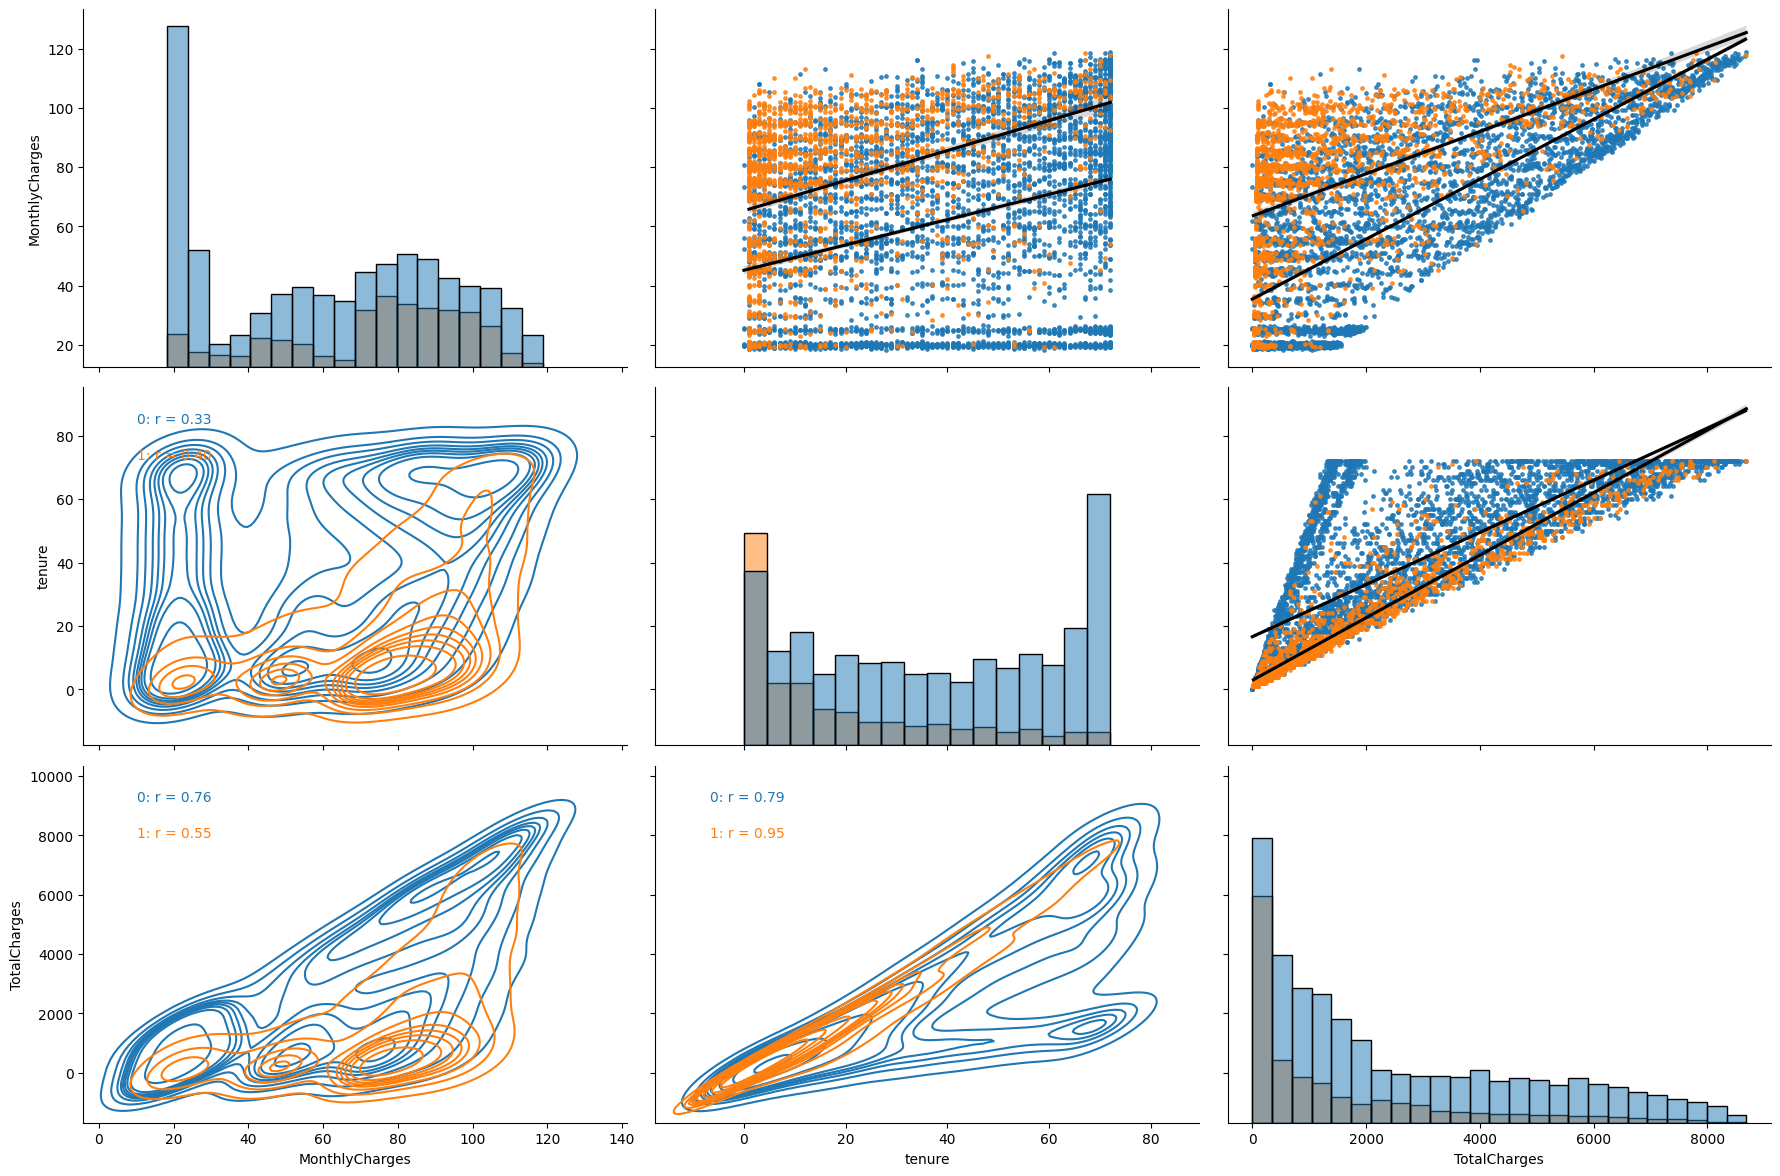

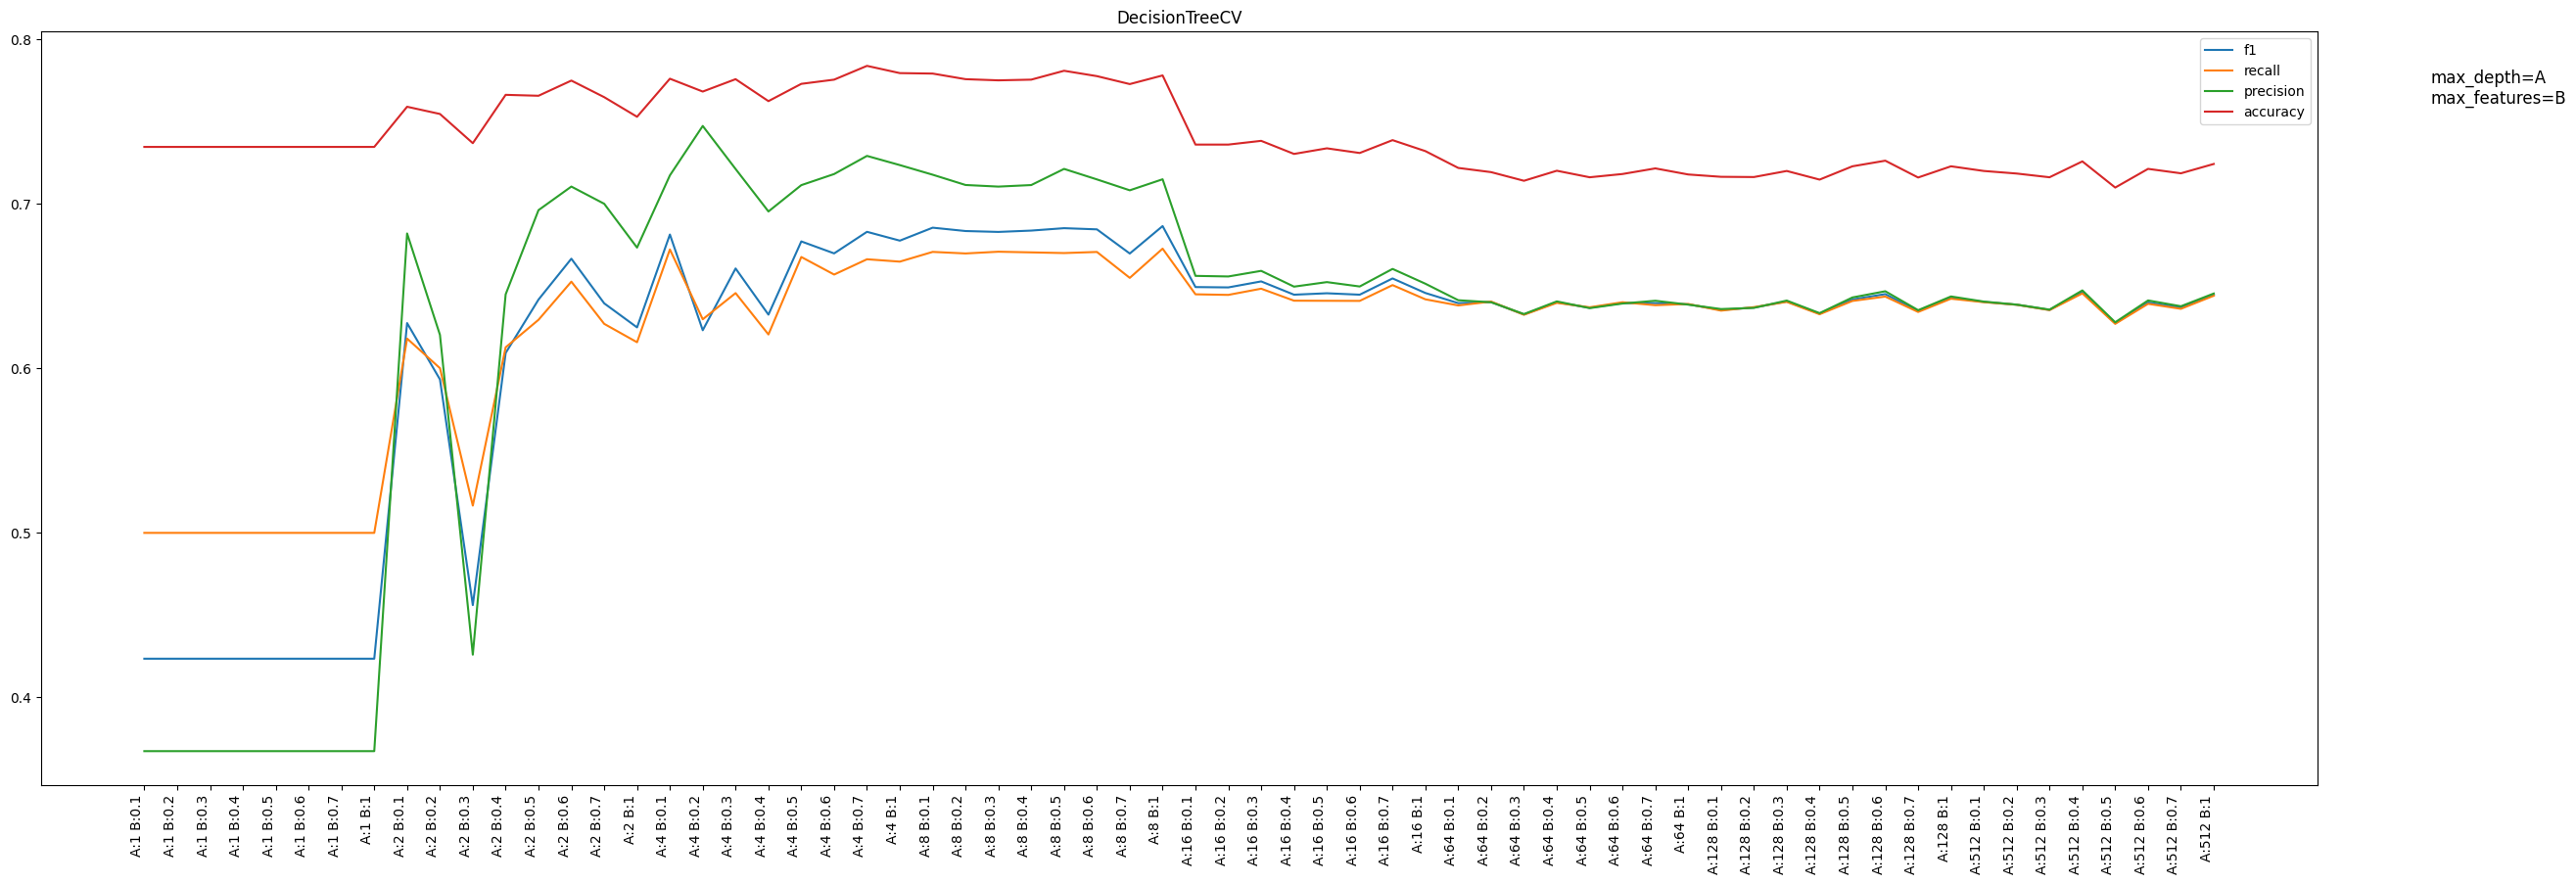

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


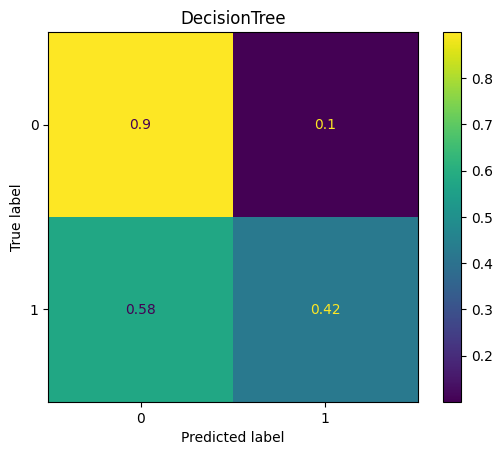

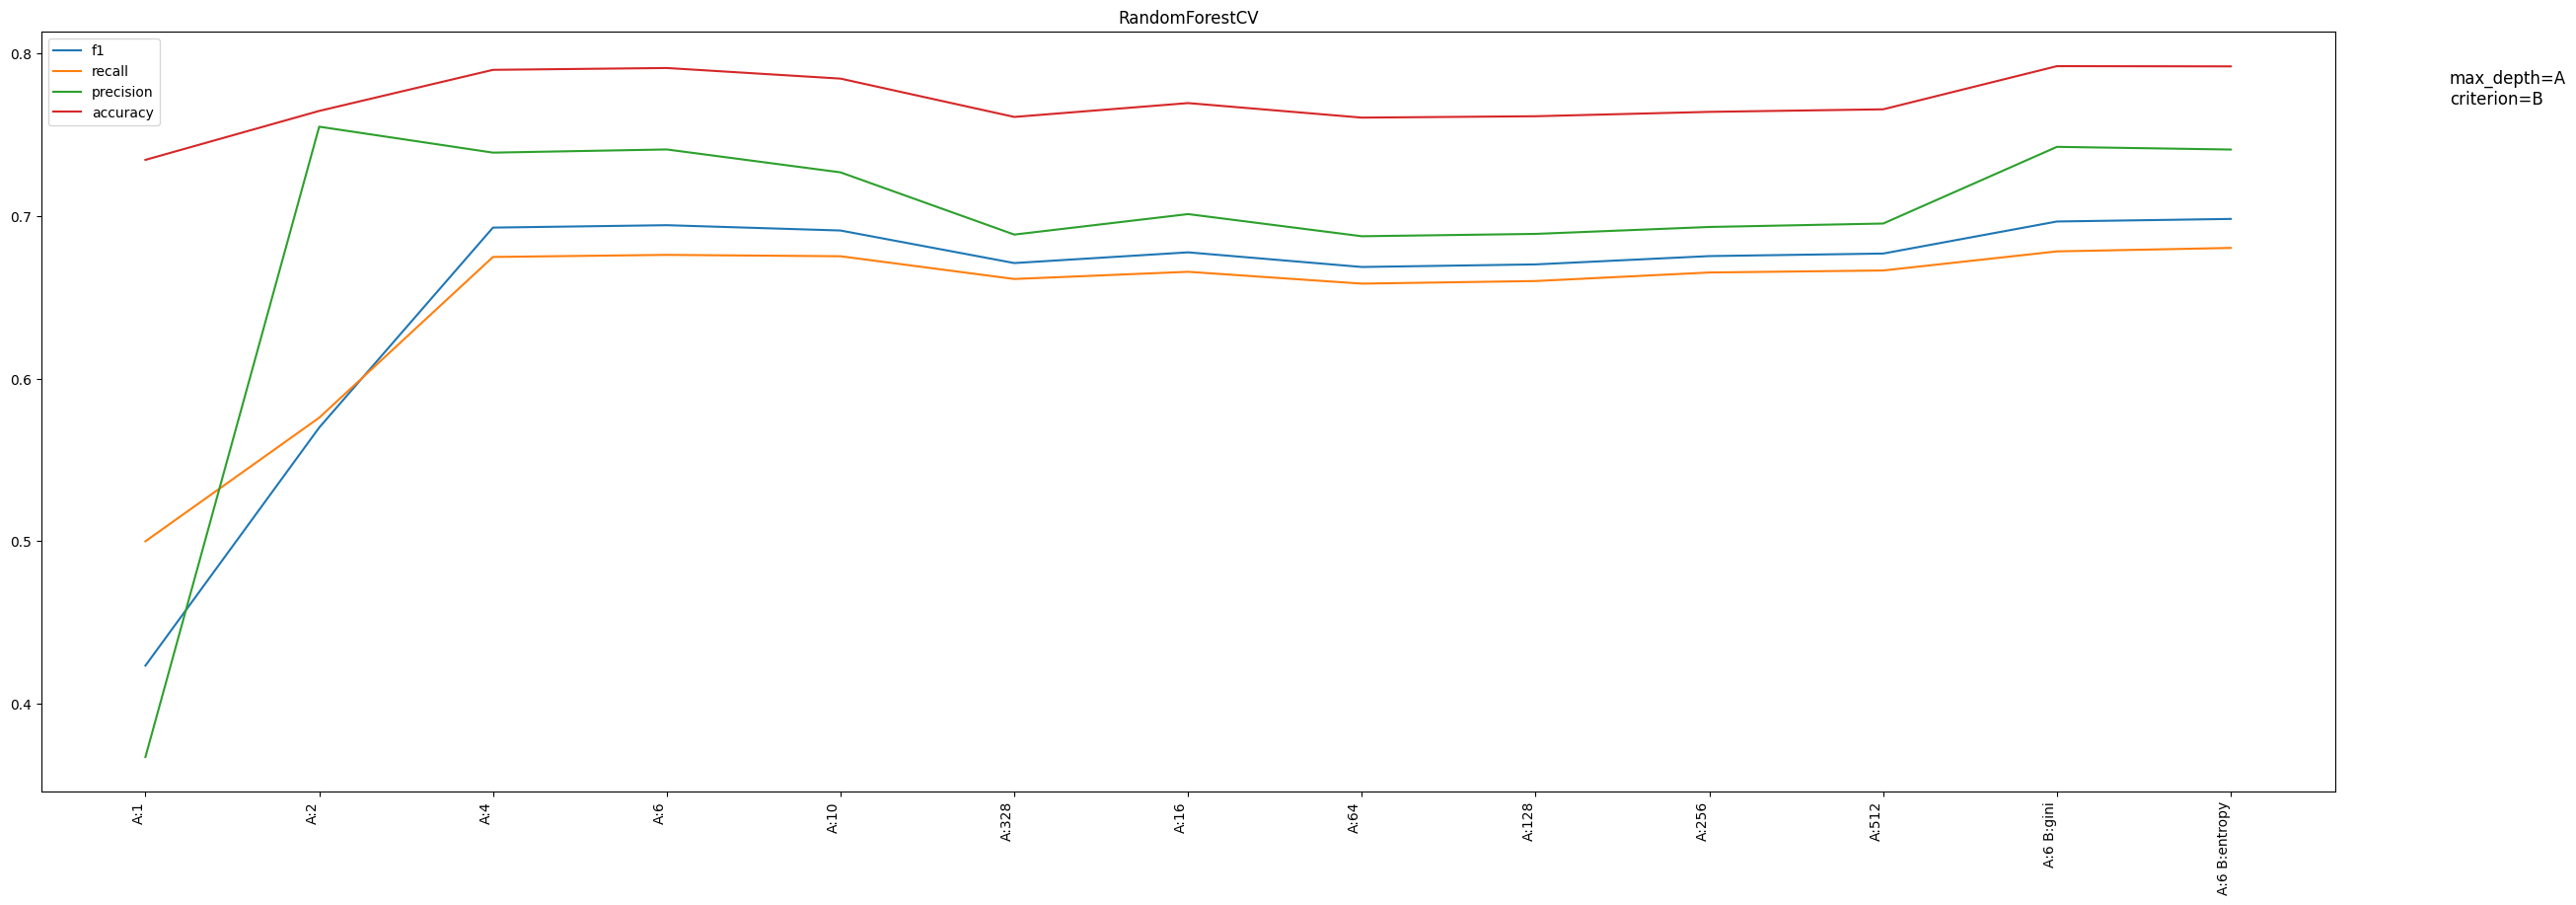

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


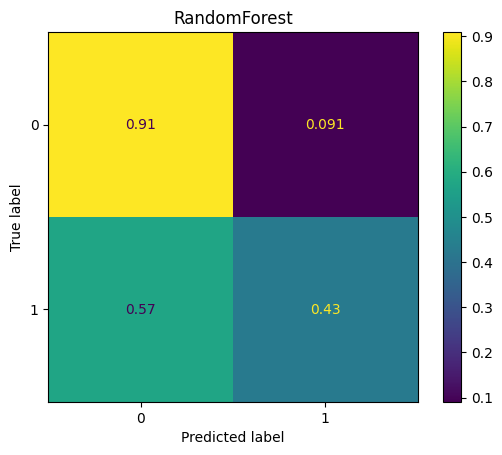

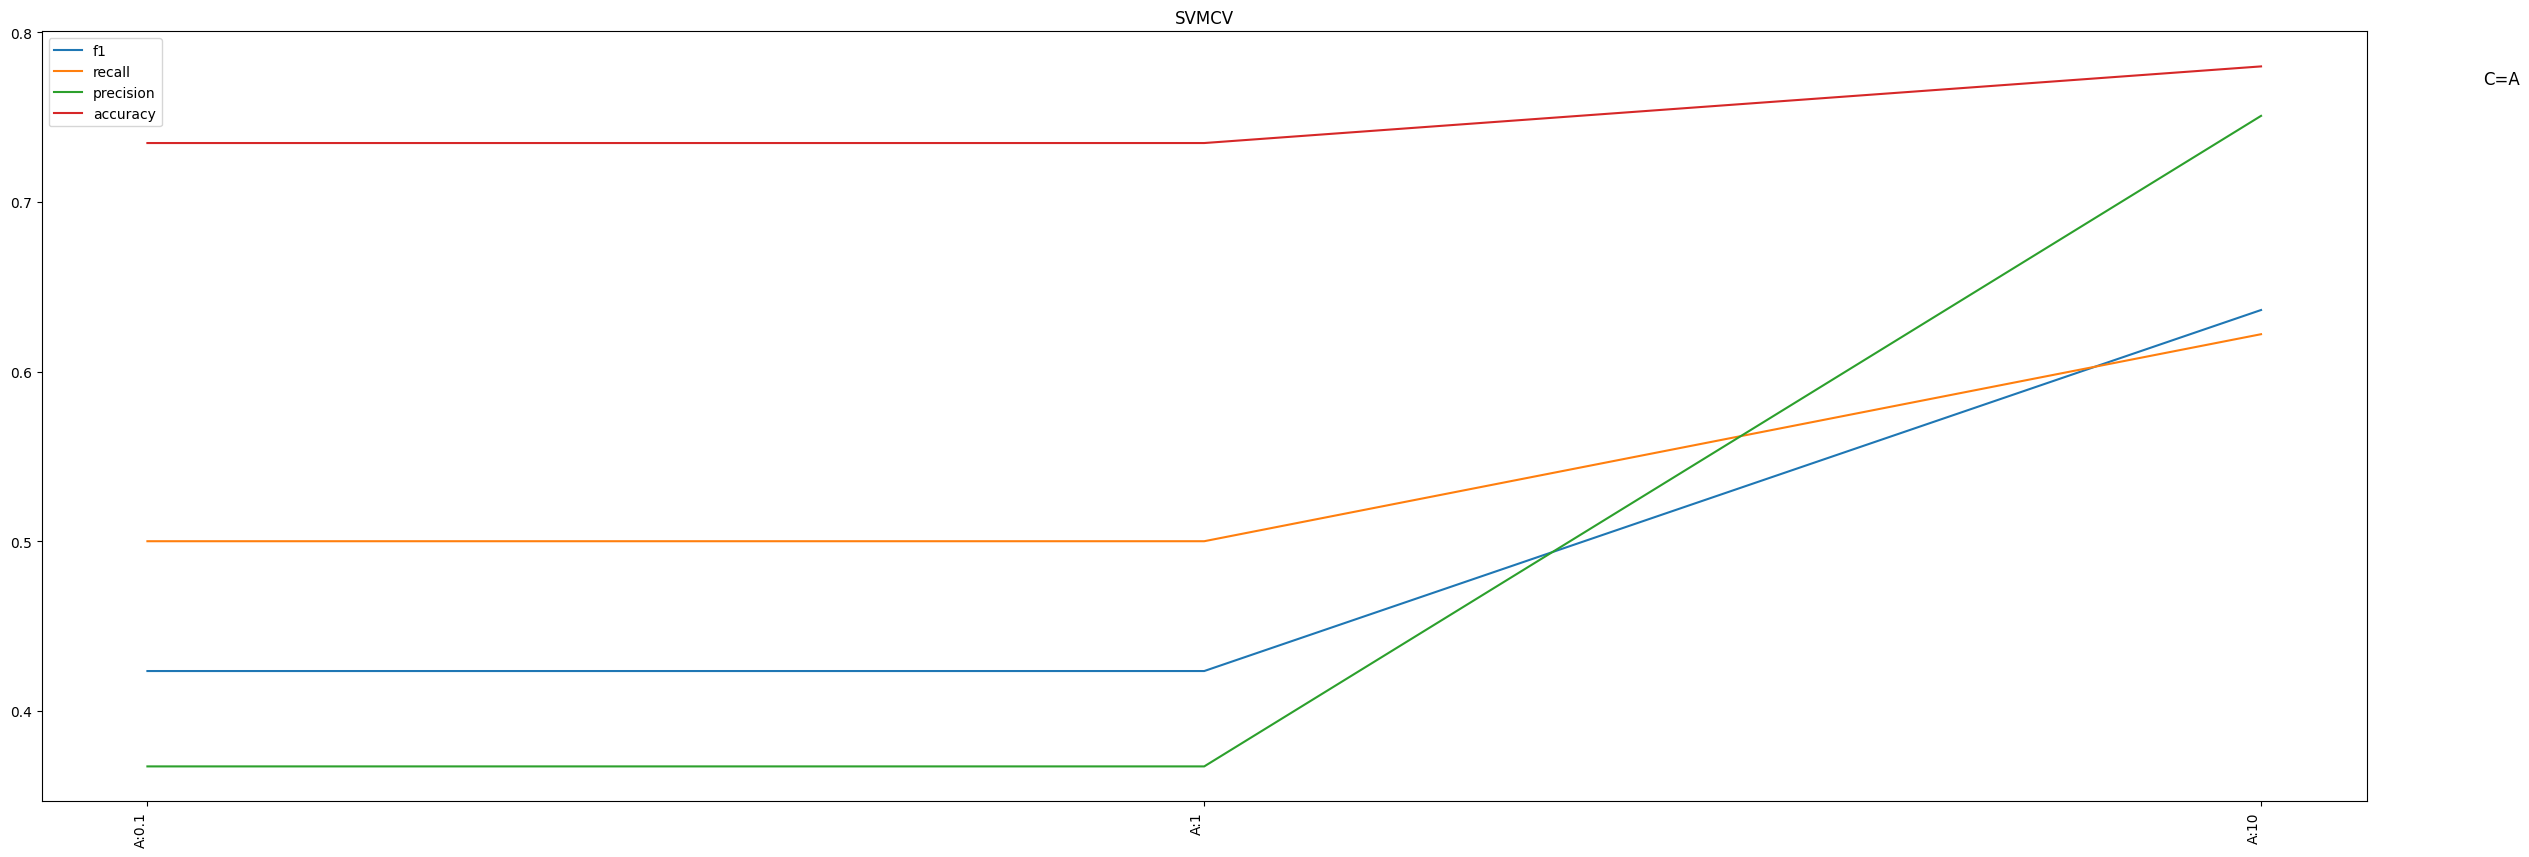

predict_proba is not available when  probability=False


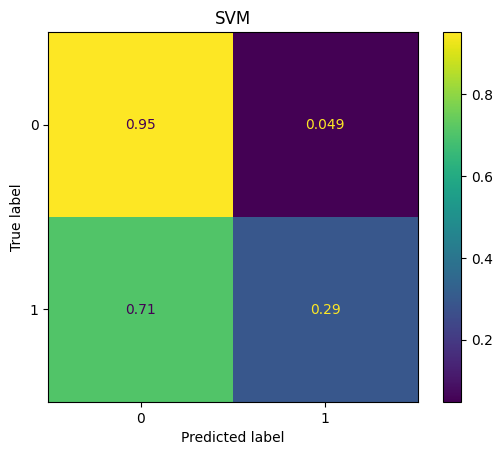

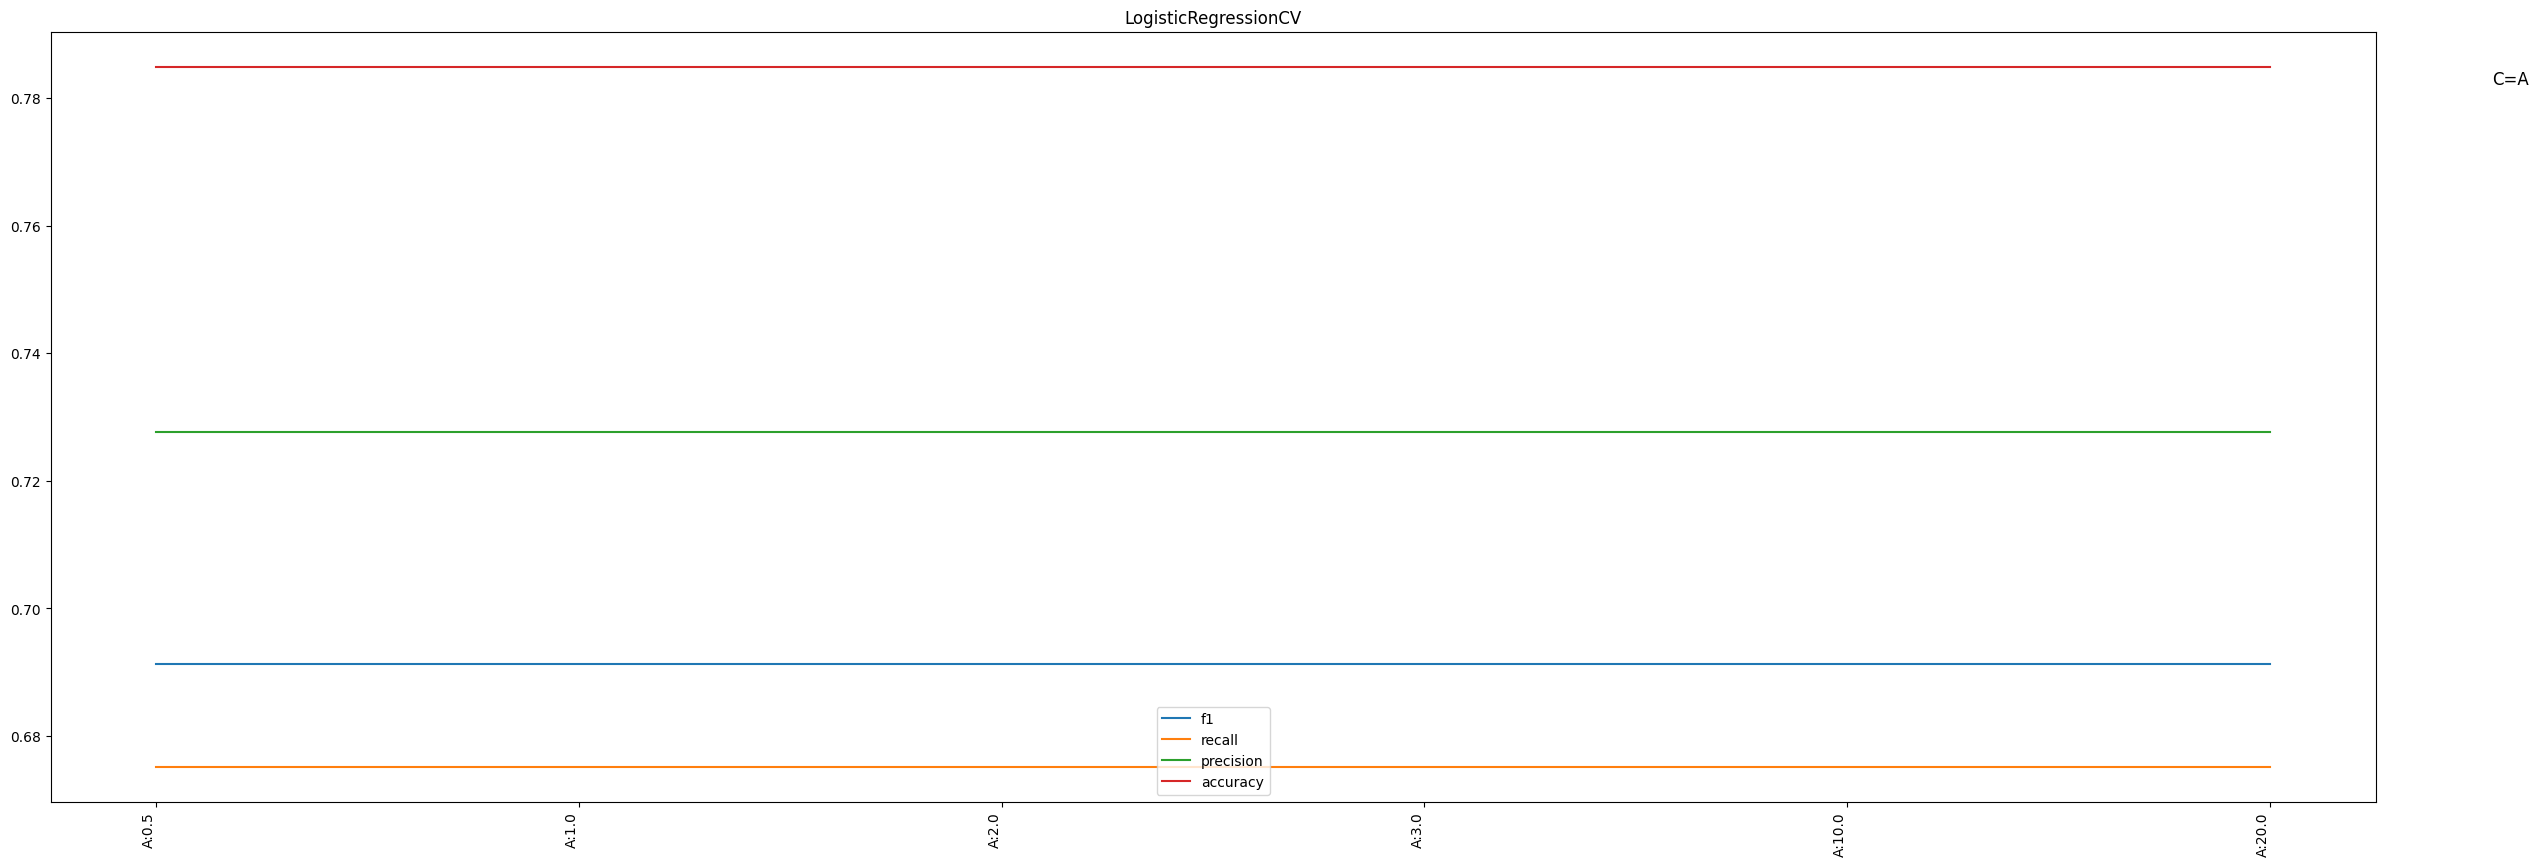

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


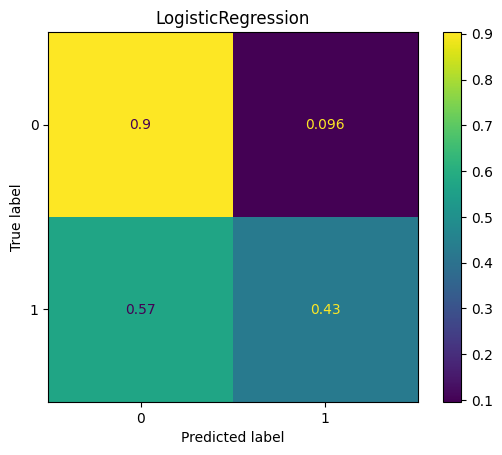

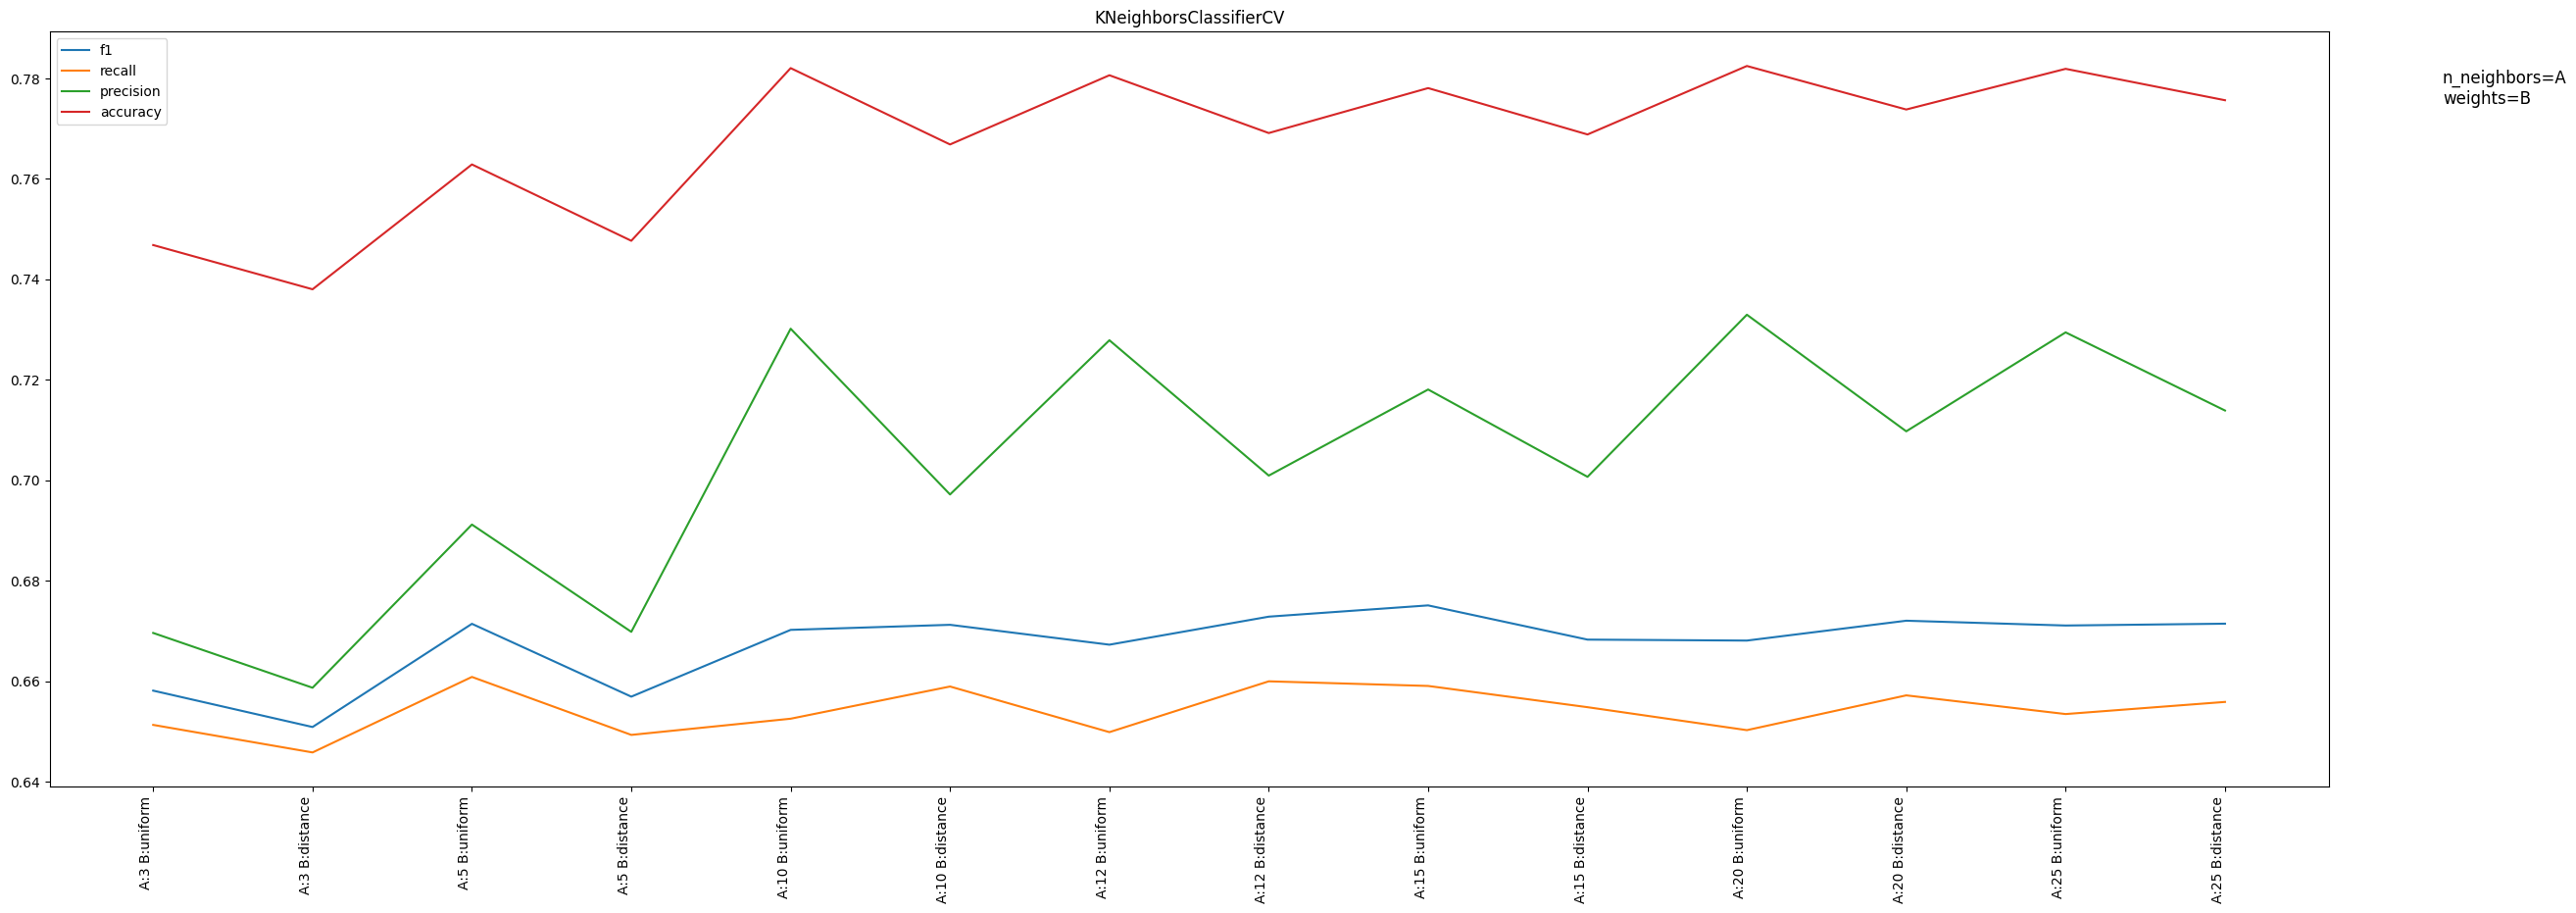

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


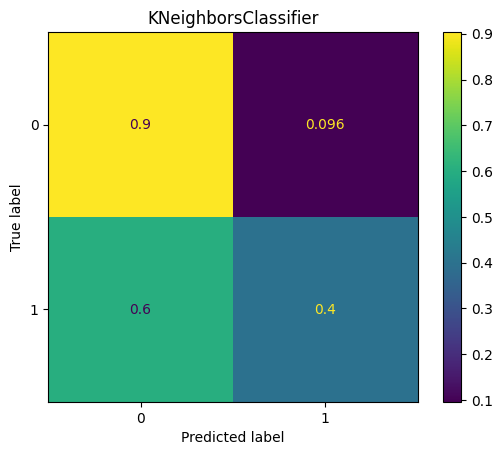

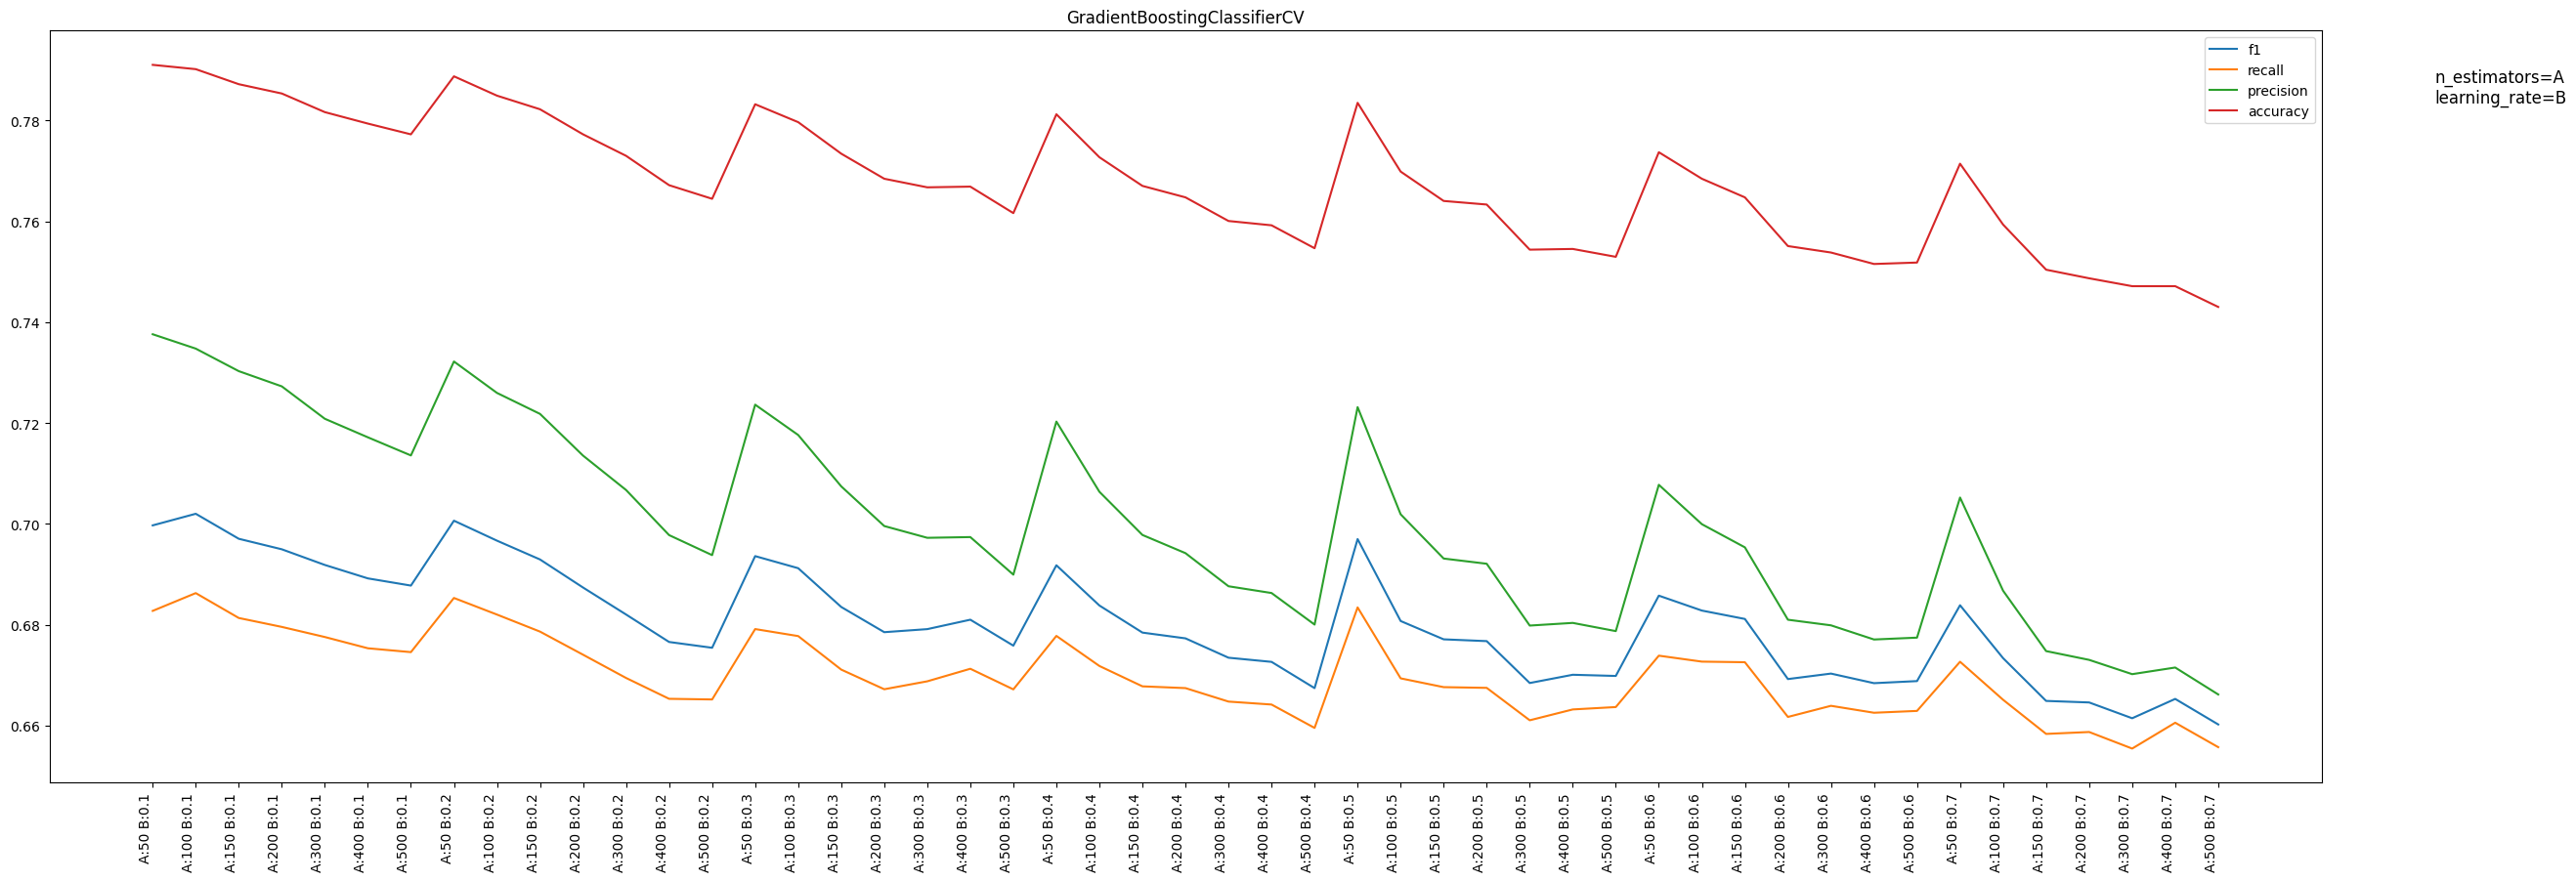

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


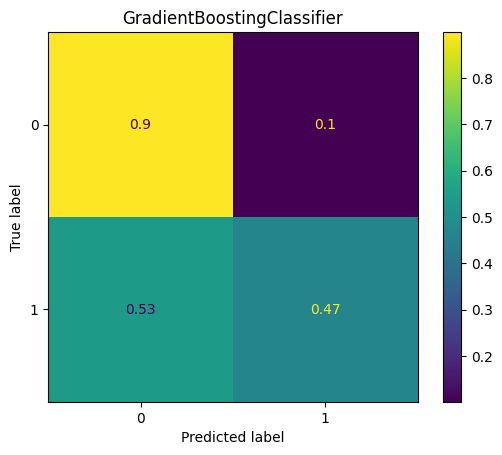

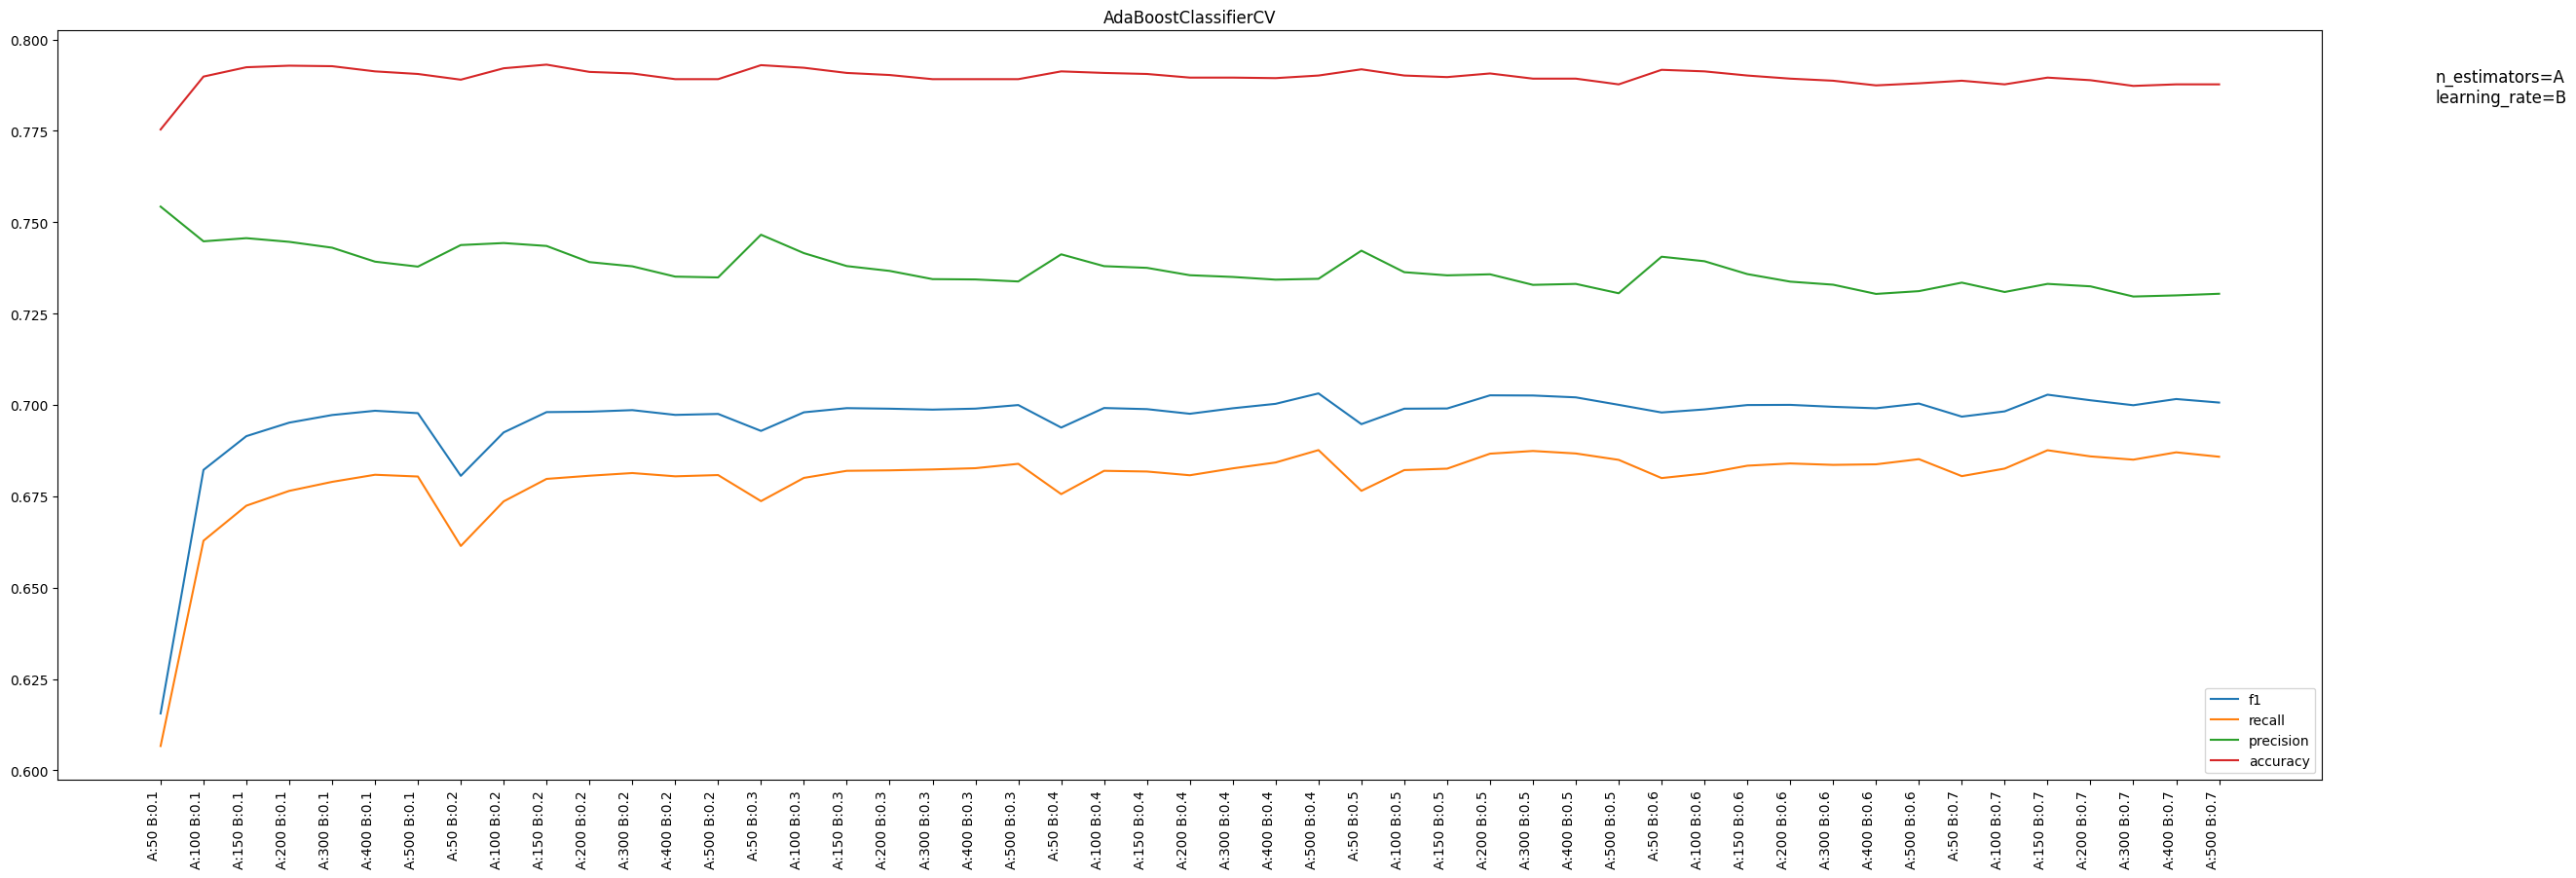

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


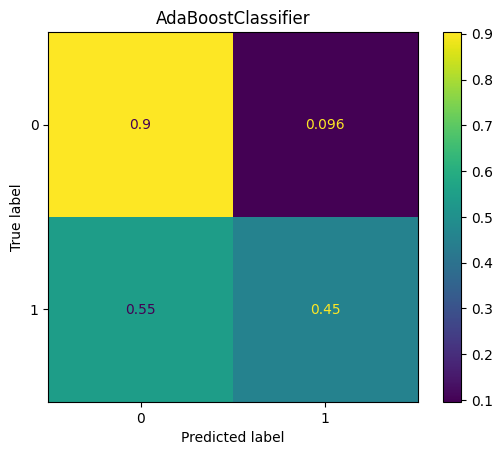

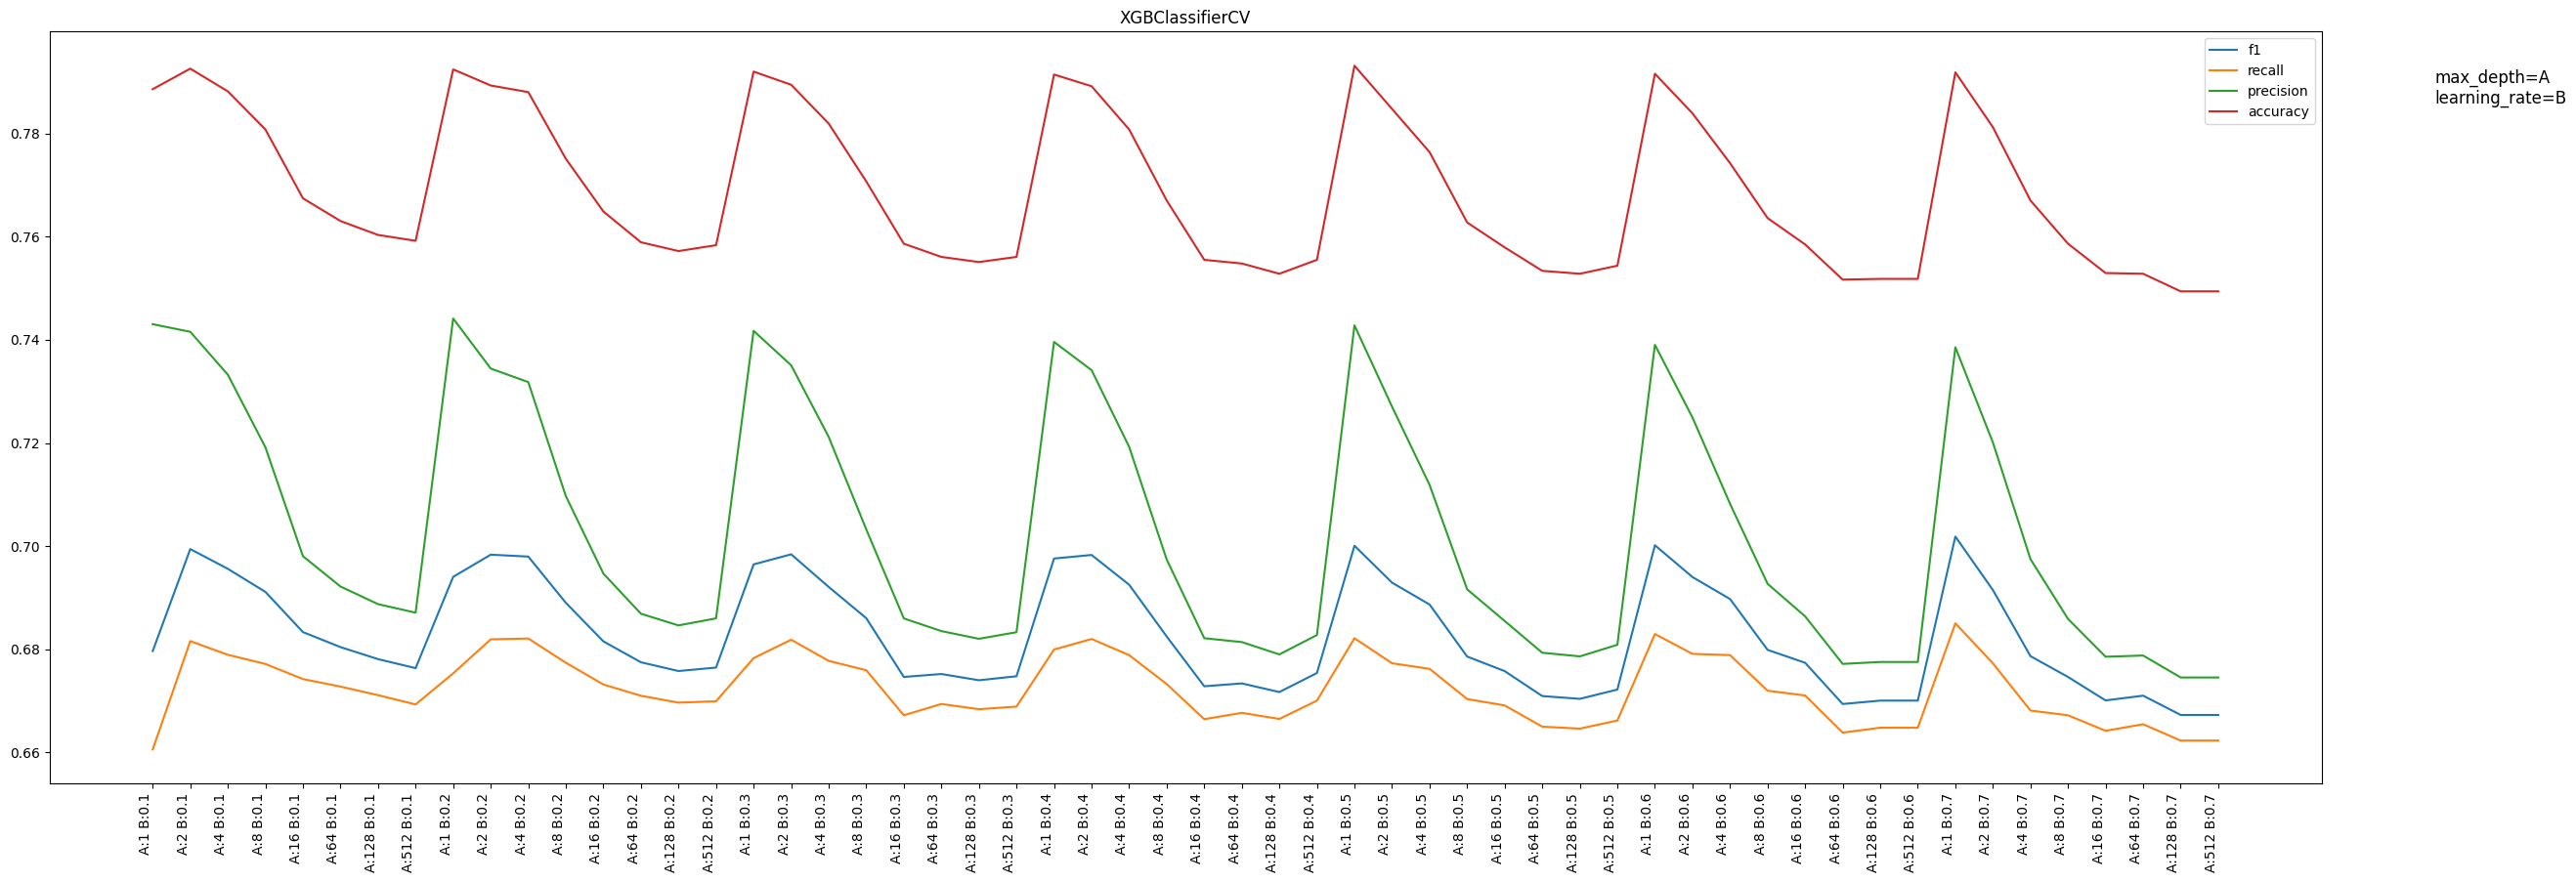

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


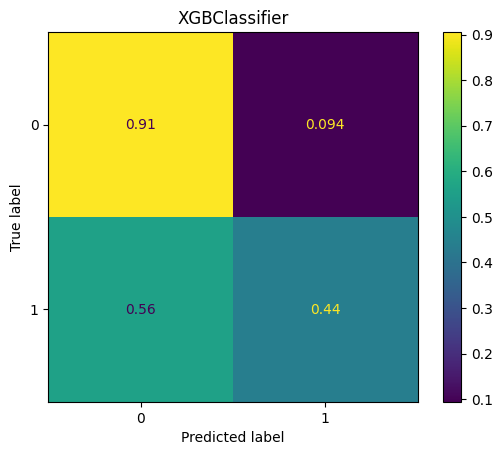

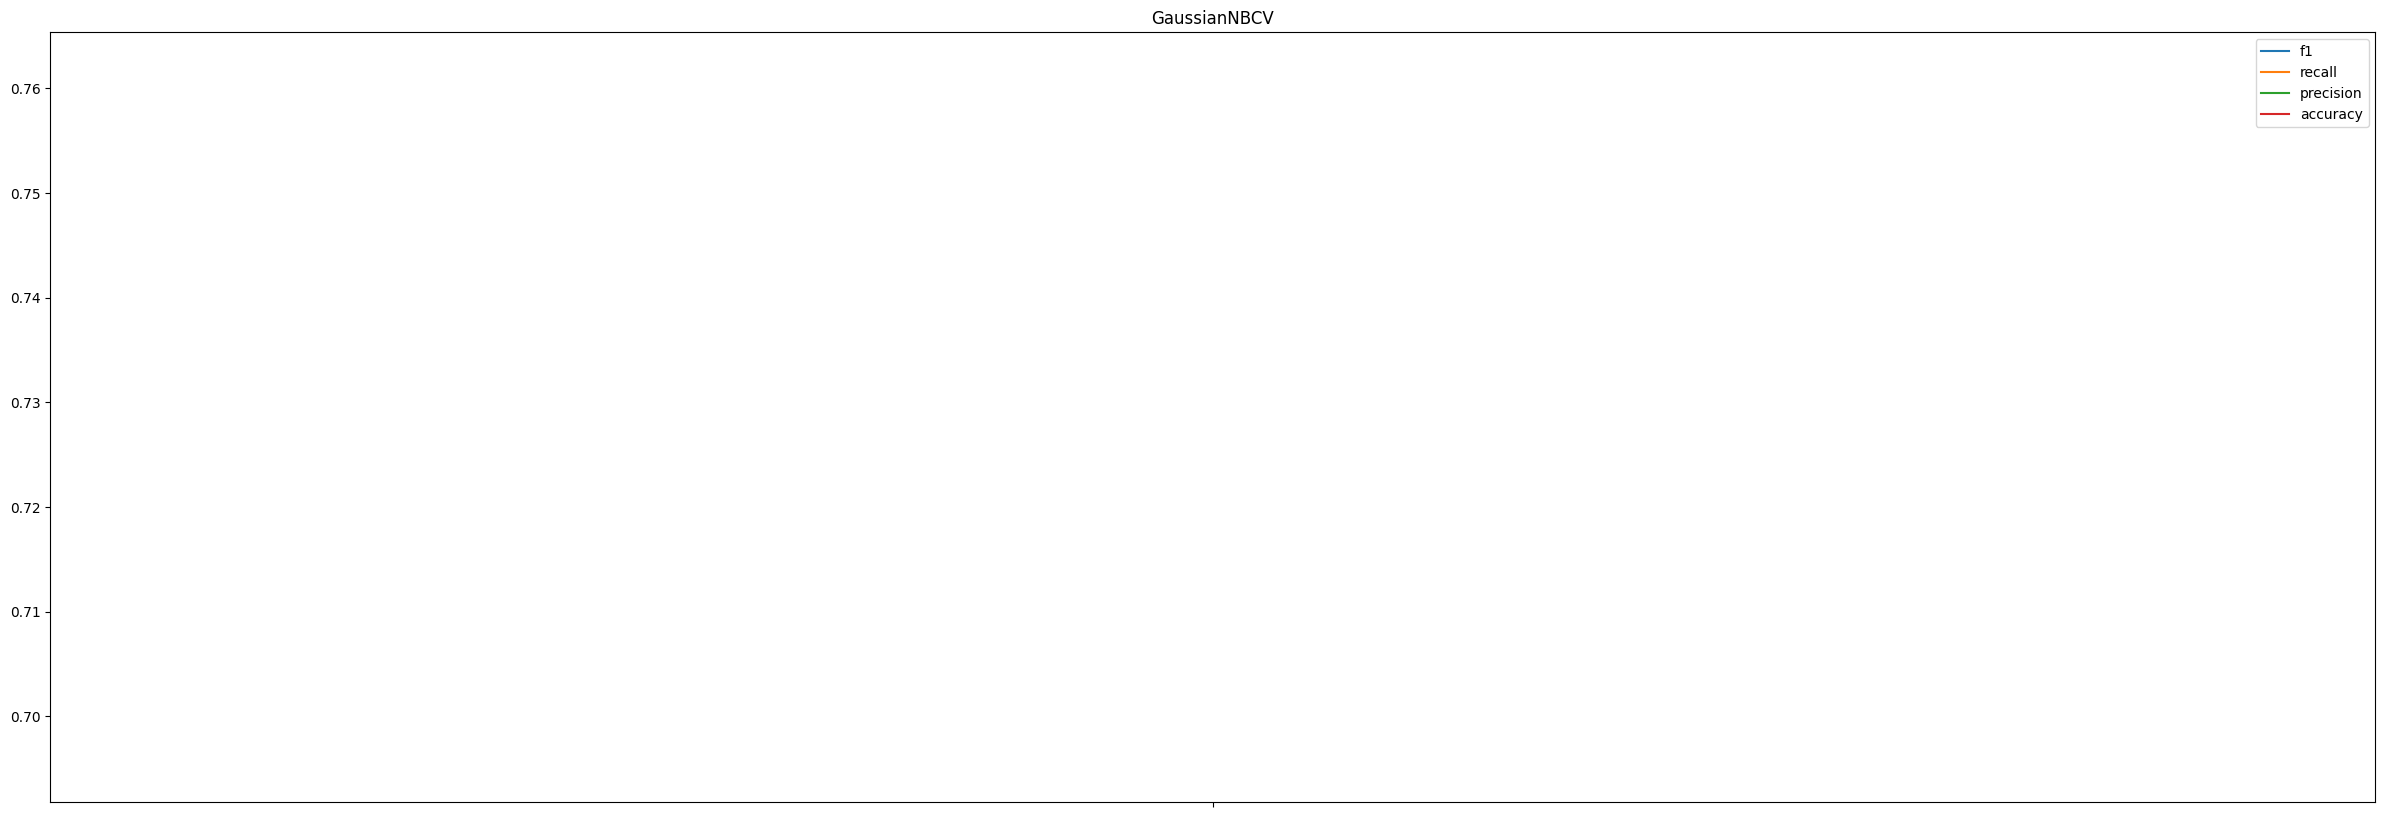

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


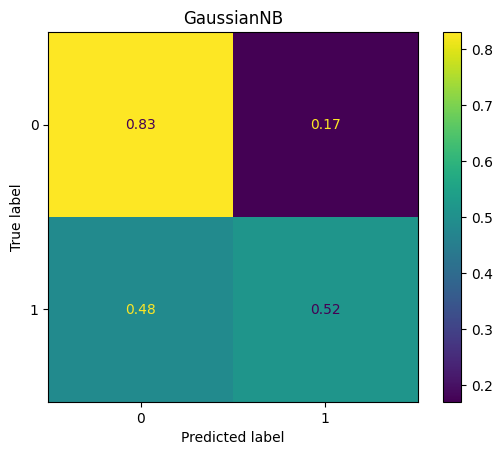

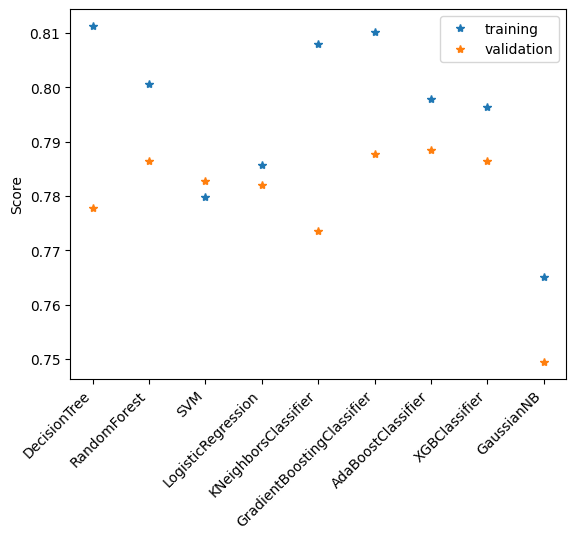

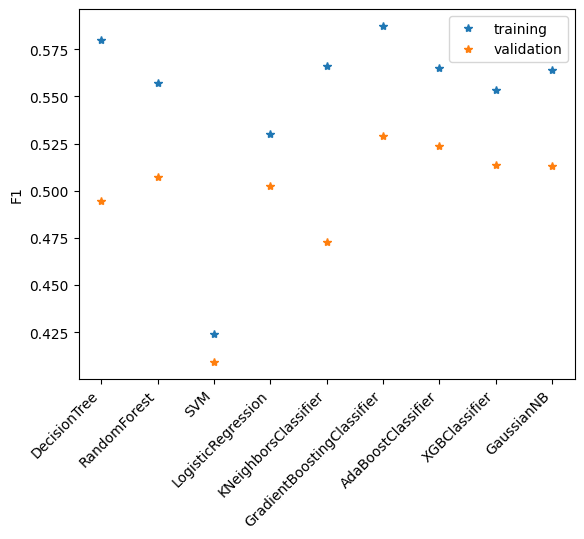

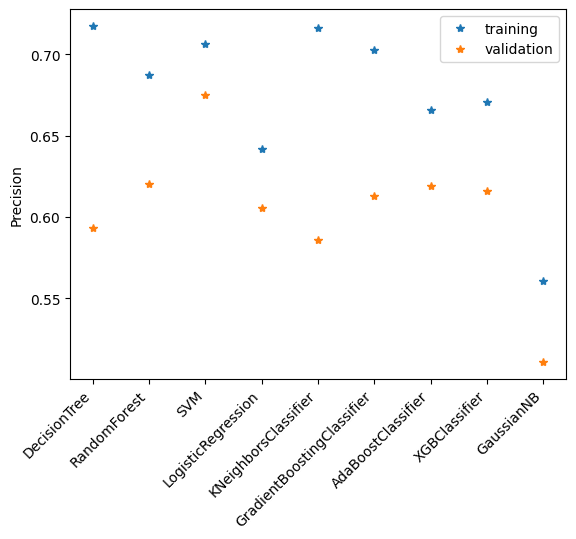

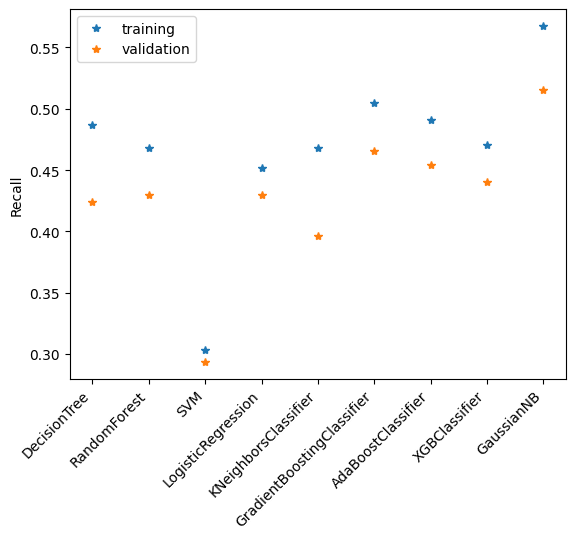

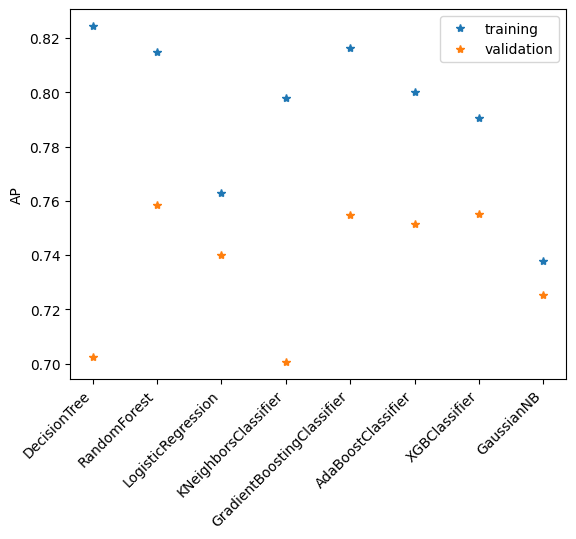

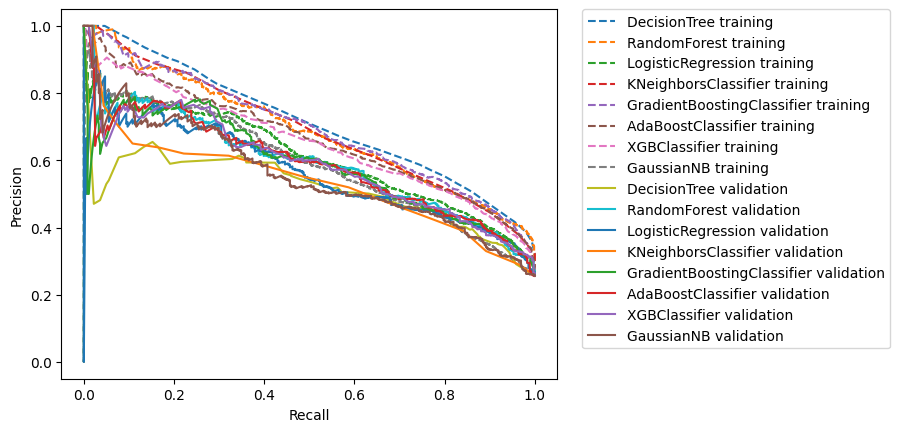

In [12]:
x = df [['MonthlyCharges','tenure','TotalCharges' ]].values
y = df['Churn1'].values
y.reshape(-1)


#model_grid, df_grid,pairs = grid_class(LogisticRegression(n_jobs = 1), {'C':[0.5,1.0, 2.0,3.0,10.0,20.0]},x, y)
      
#print(df_grid)
      
#plot_cv_metrics('model_name' + 'CV', df_grid['params'], df_grid['mean_test_f1'], df_grid['mean_test_recall'], df_grid['mean_test_precision'], df_grid['mean_test_accuracy'],pairs)
res = best_model(x, y, 'classification' , 'Yes', df [['MonthlyCharges','tenure','TotalCharges', 'Churn1' ]], hue = 'Churn1', models = None)

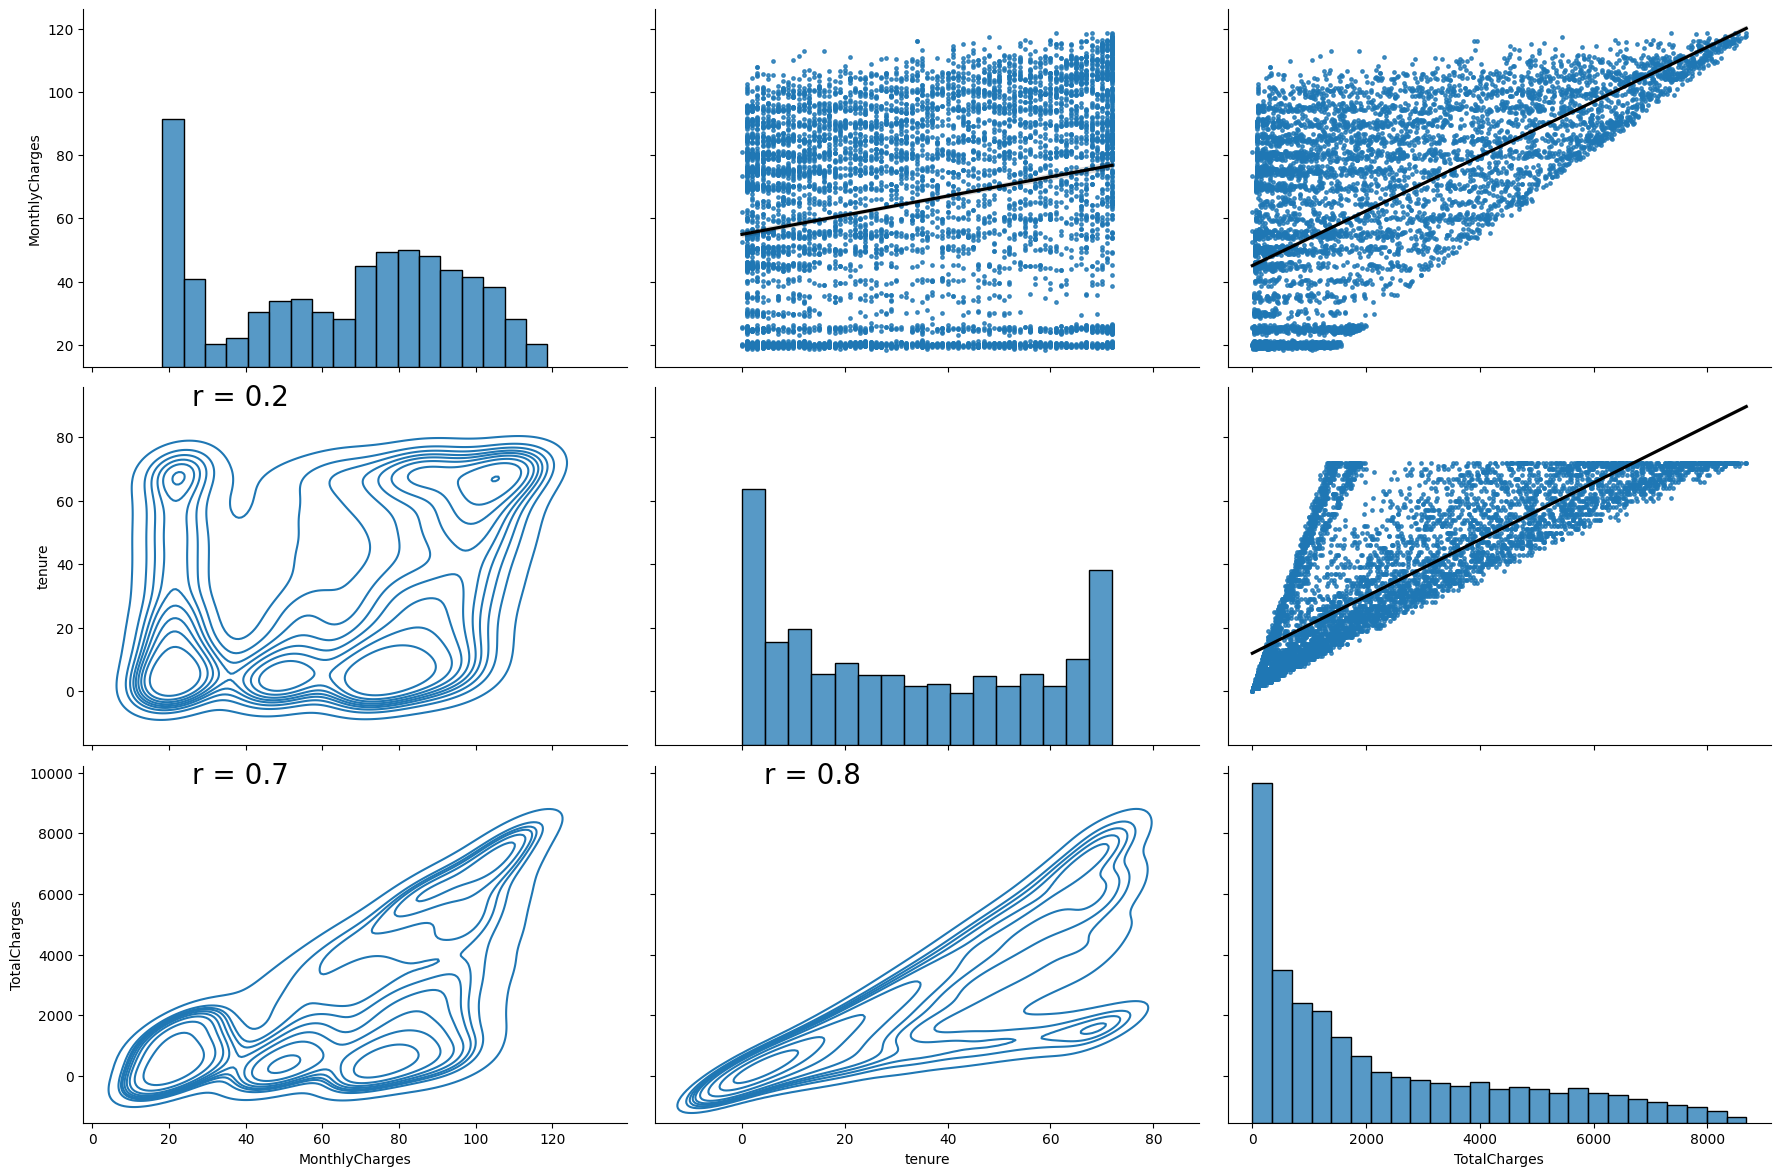

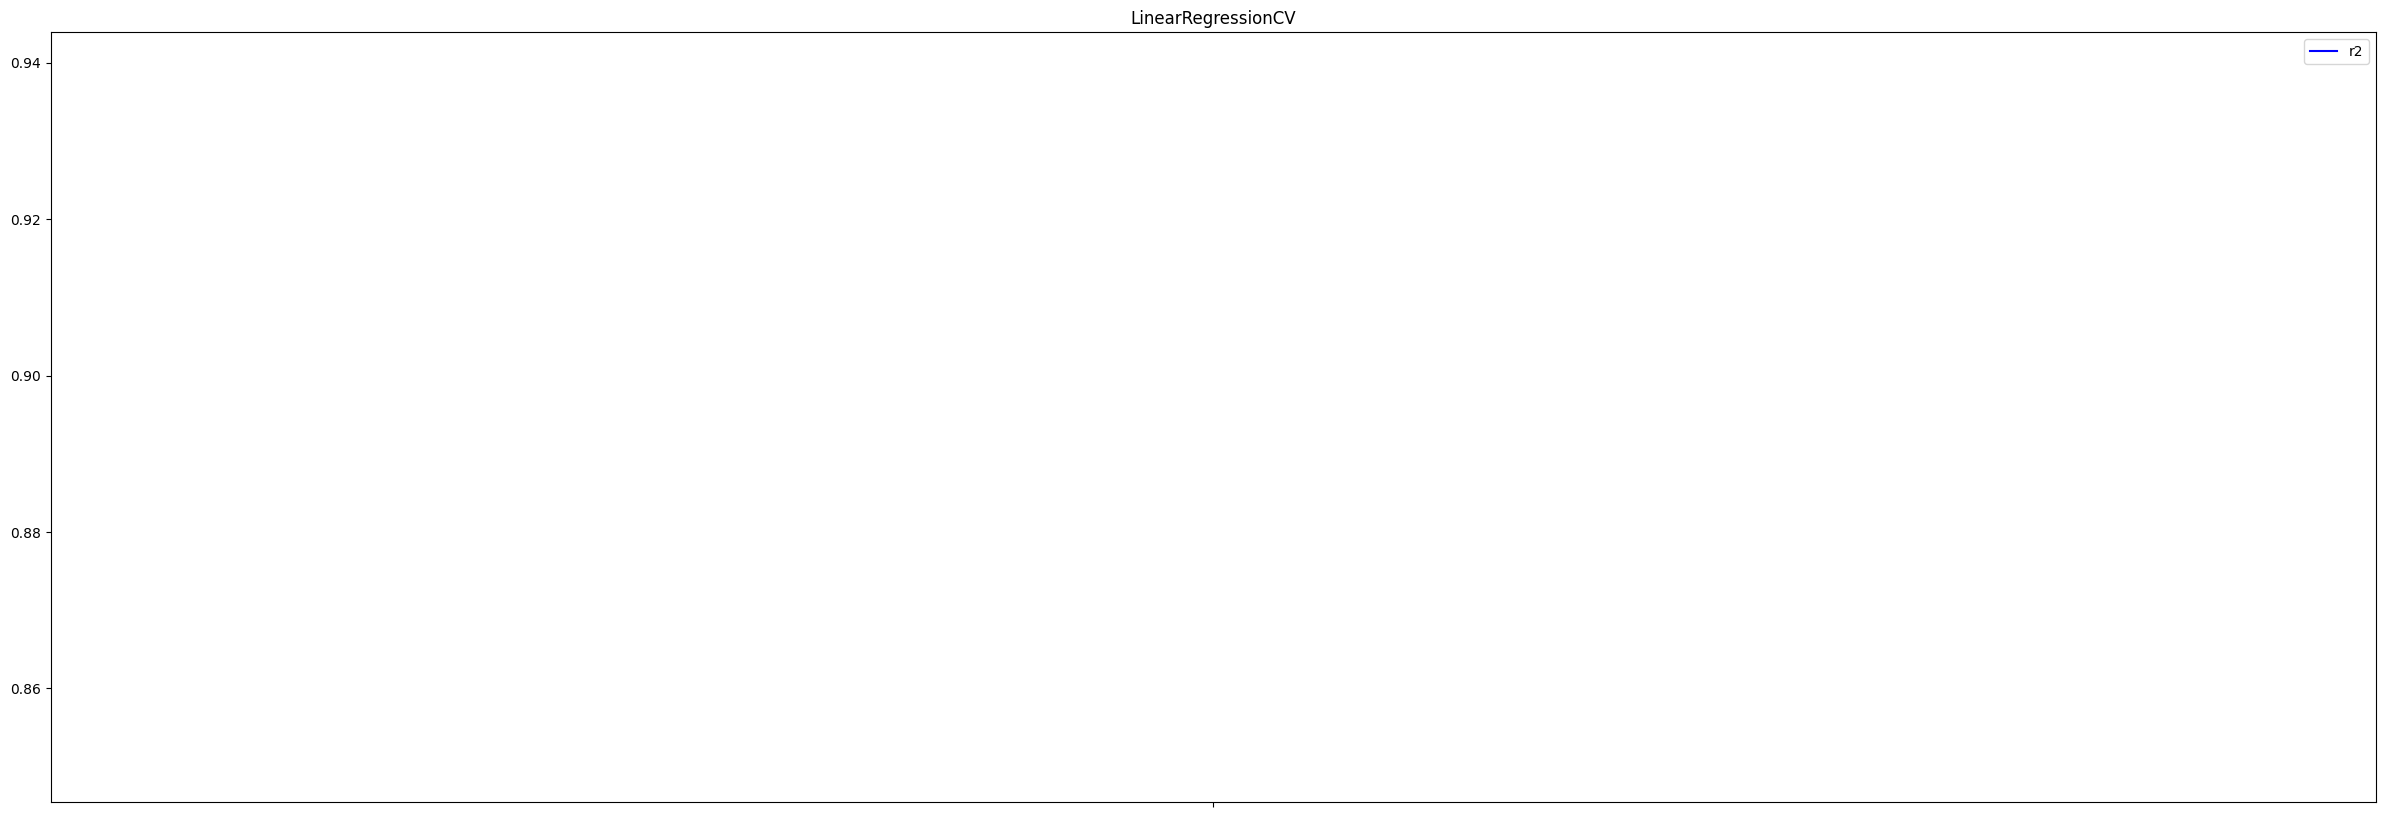

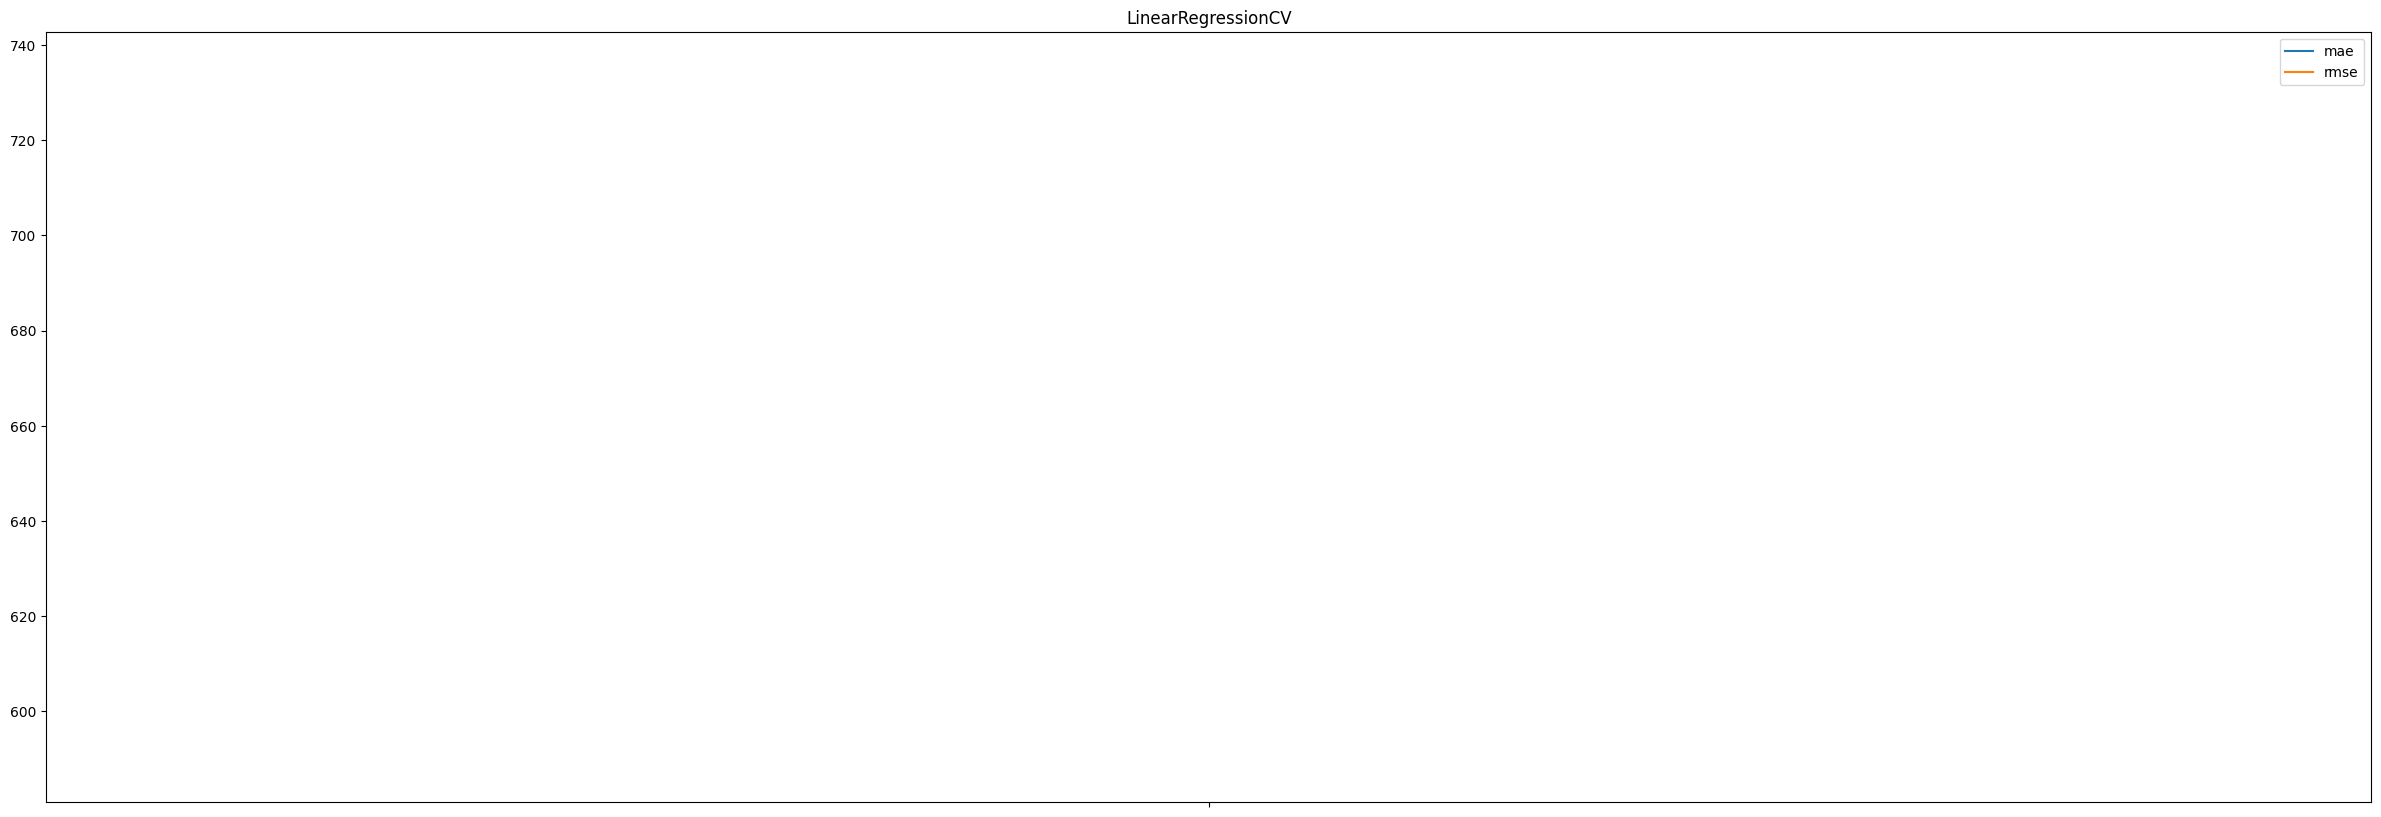

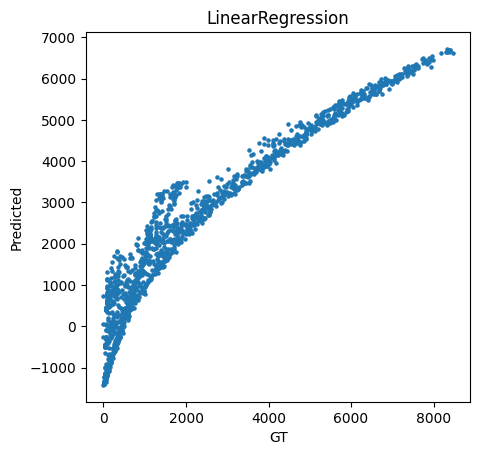

found_params={}, params_i={'max_depth': [4, 16, 32, 42]}
k=max_depth, v=[4, 16, 32, 42], test_params={}
new test_params={'max_depth': [4, 16, 32, 42]}
found_params={'max_depth': [16]}, params_i={'n_estimators': [50, 100, 150, 200, 300, 400, 500]}
k=n_estimators, v=[50, 100, 150, 200, 300, 400, 500], test_params={'max_depth': [16]}
new test_params={'max_depth': [16], 'n_estimators': [50, 100, 150, 200, 300, 400, 500]}


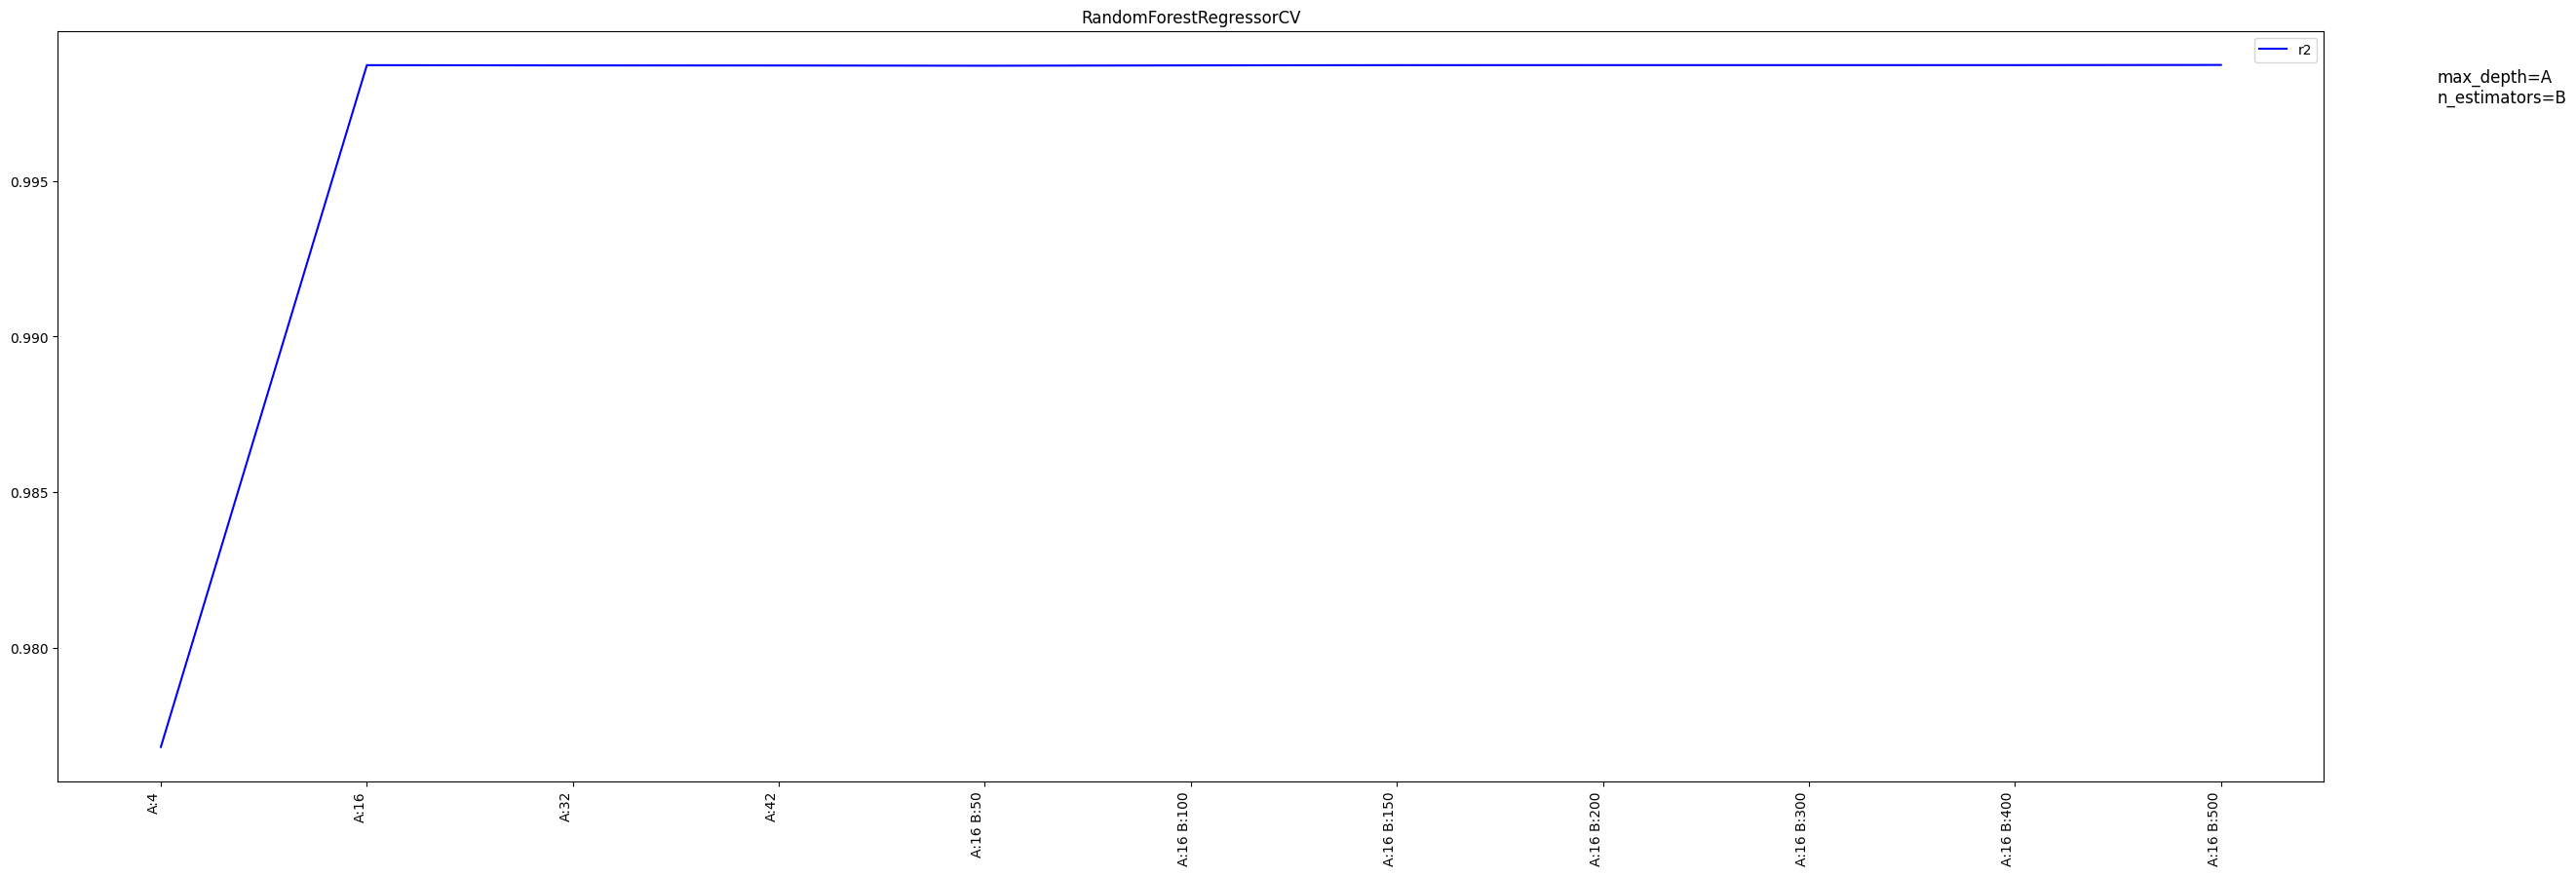

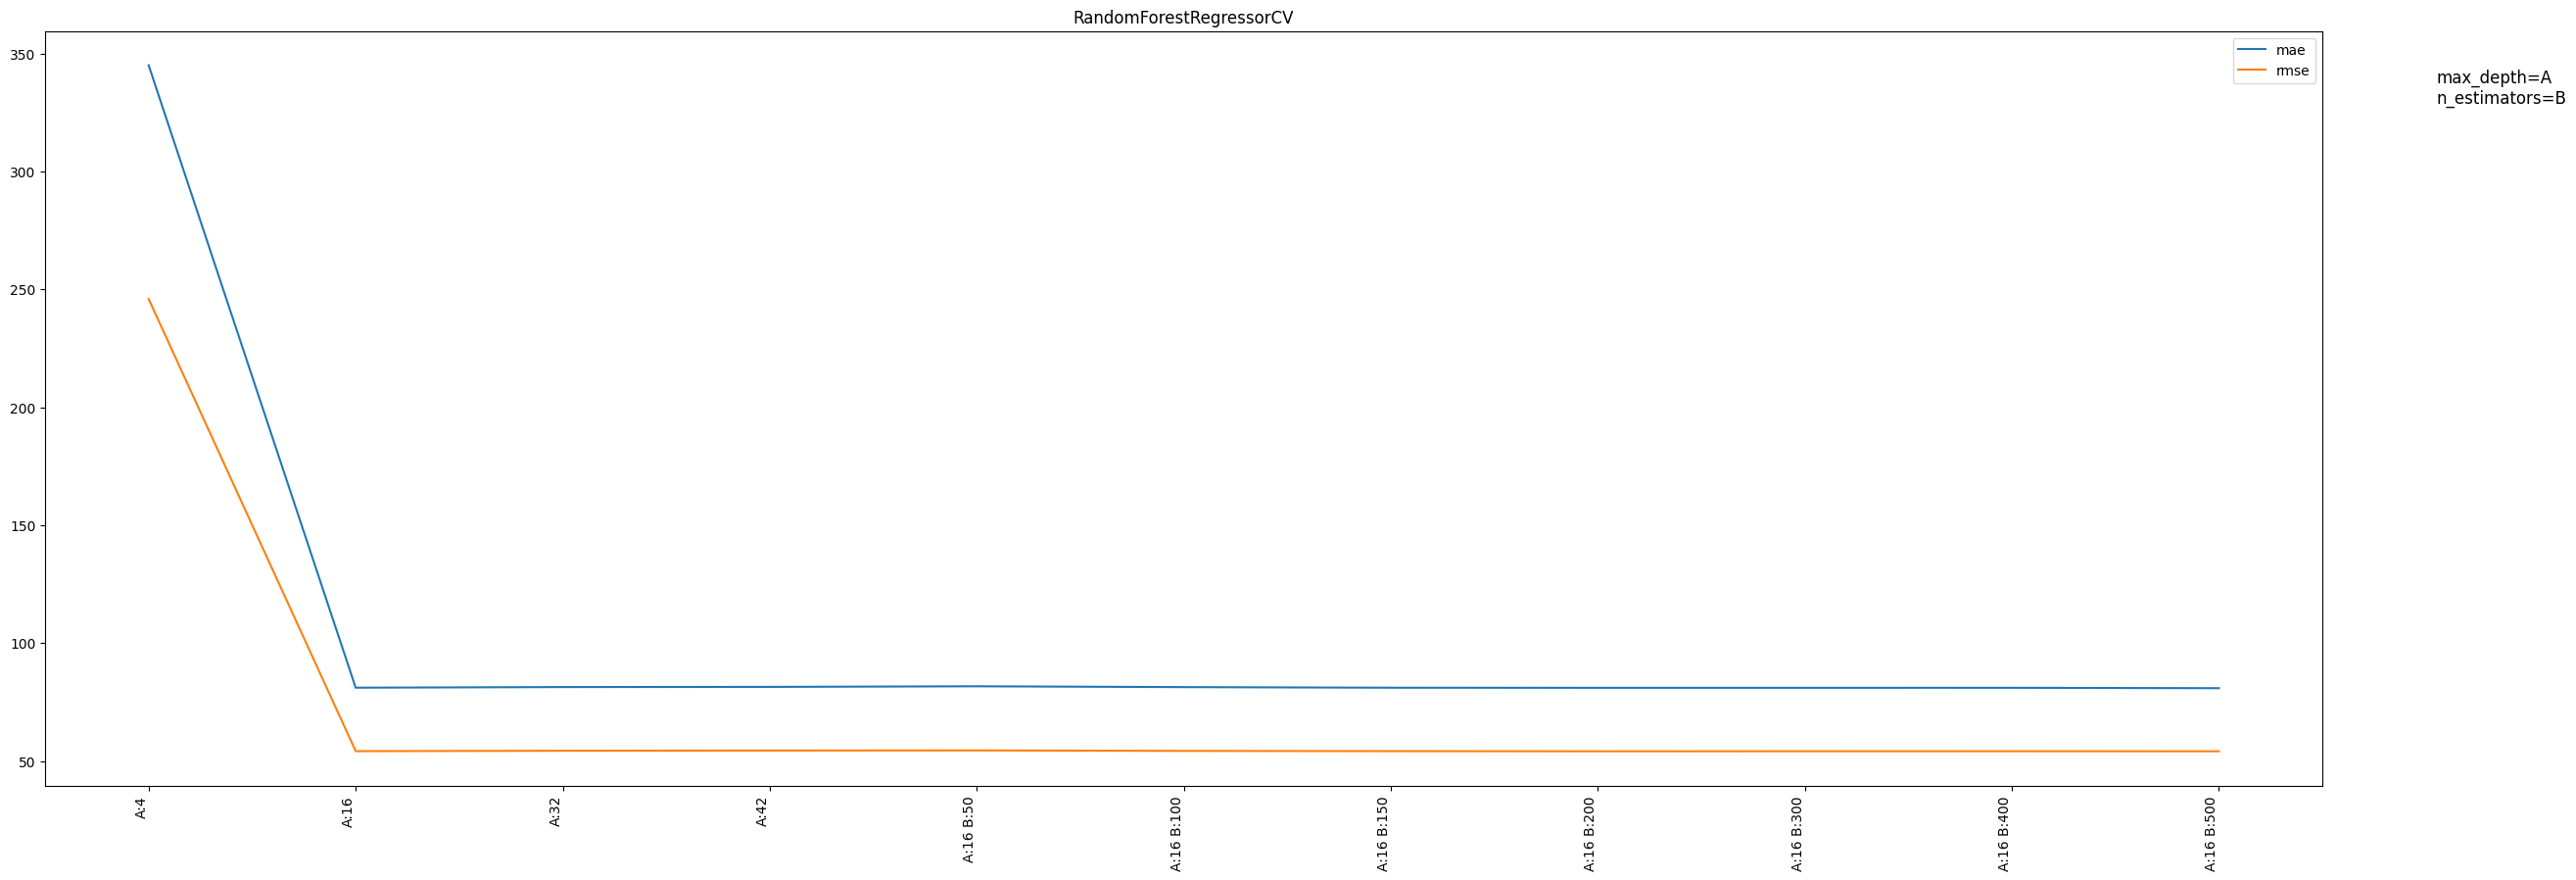

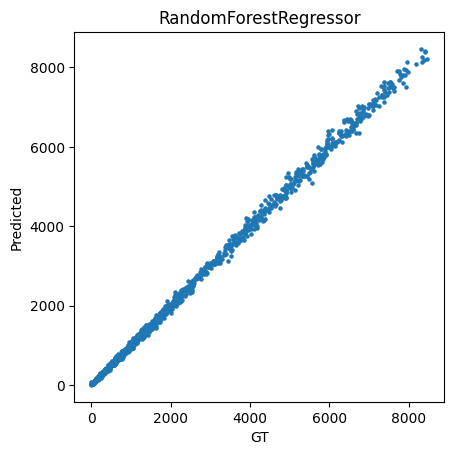

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_p

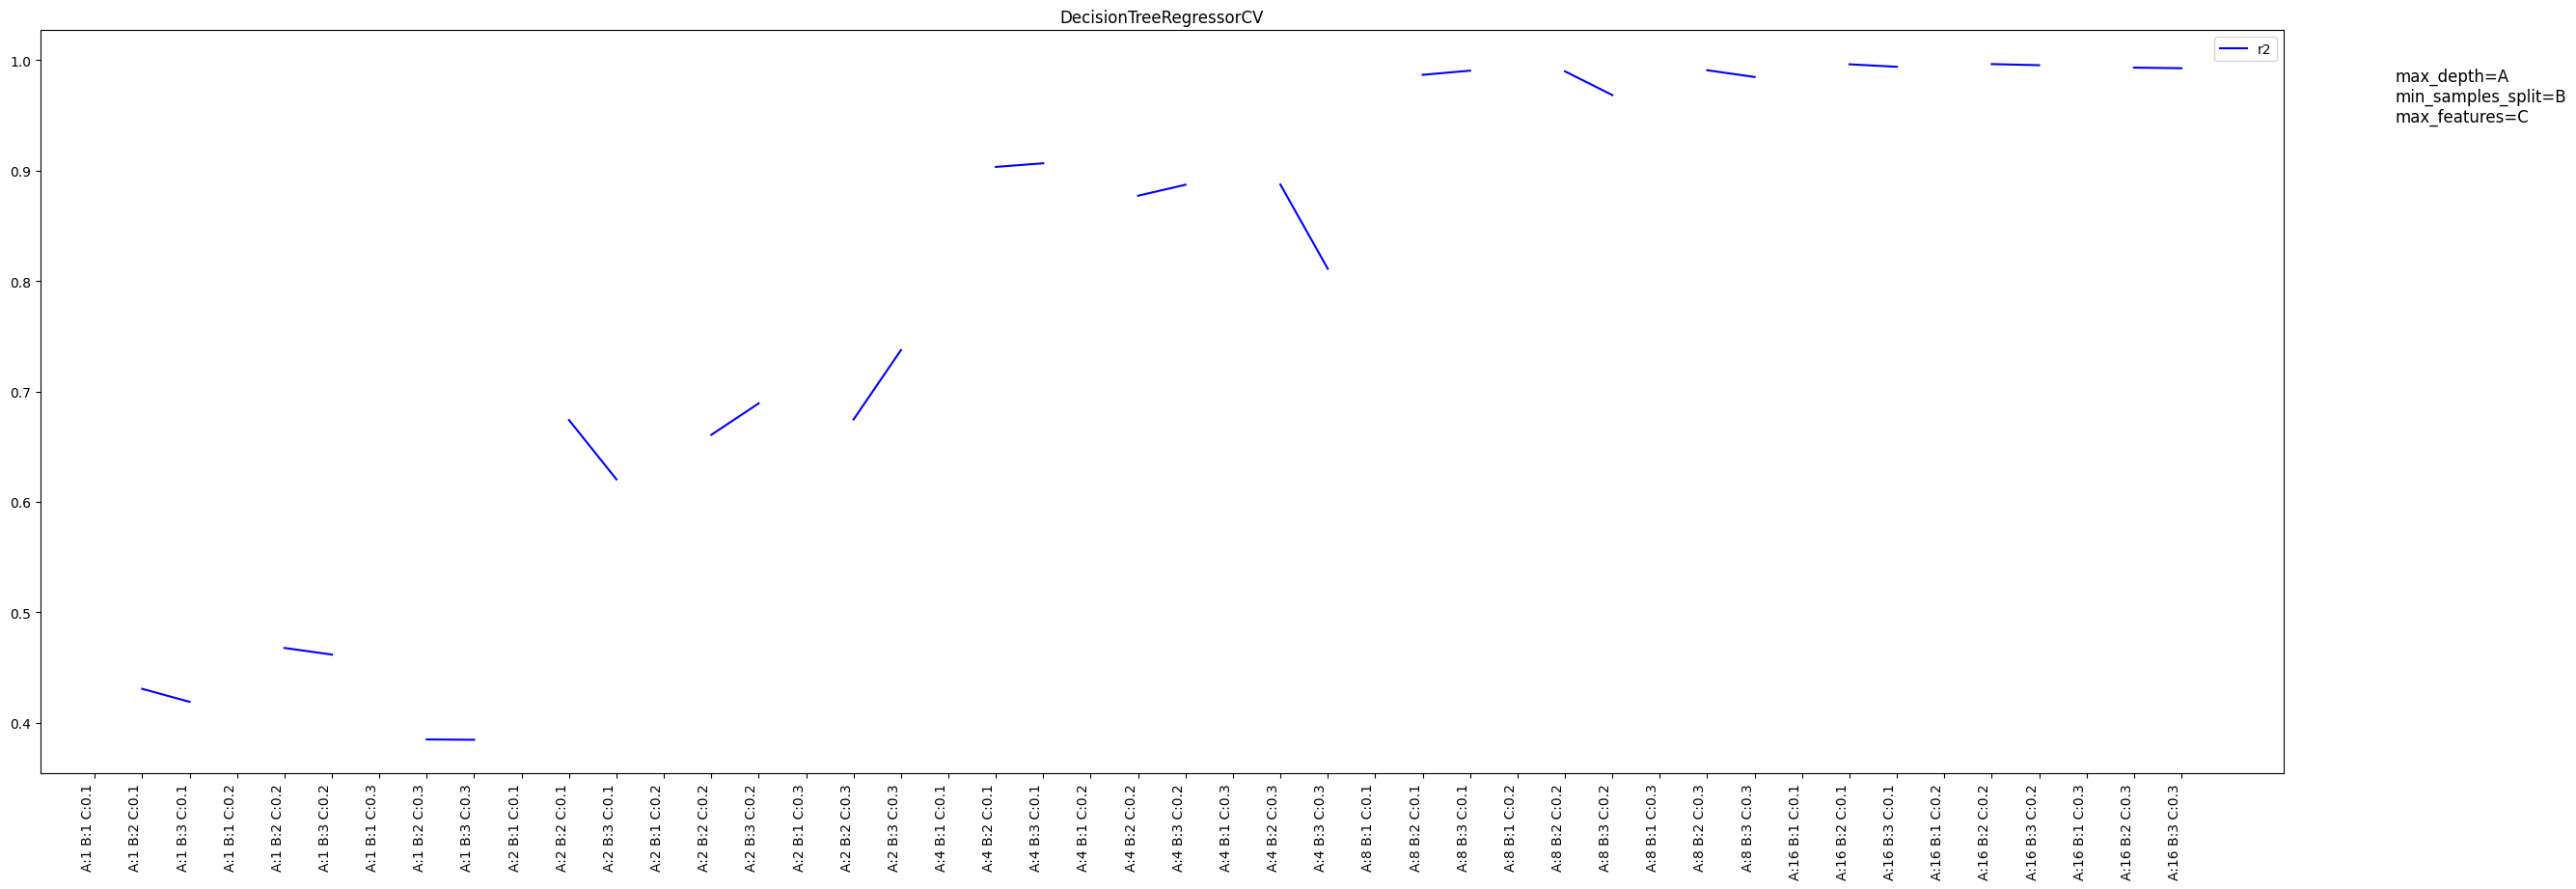

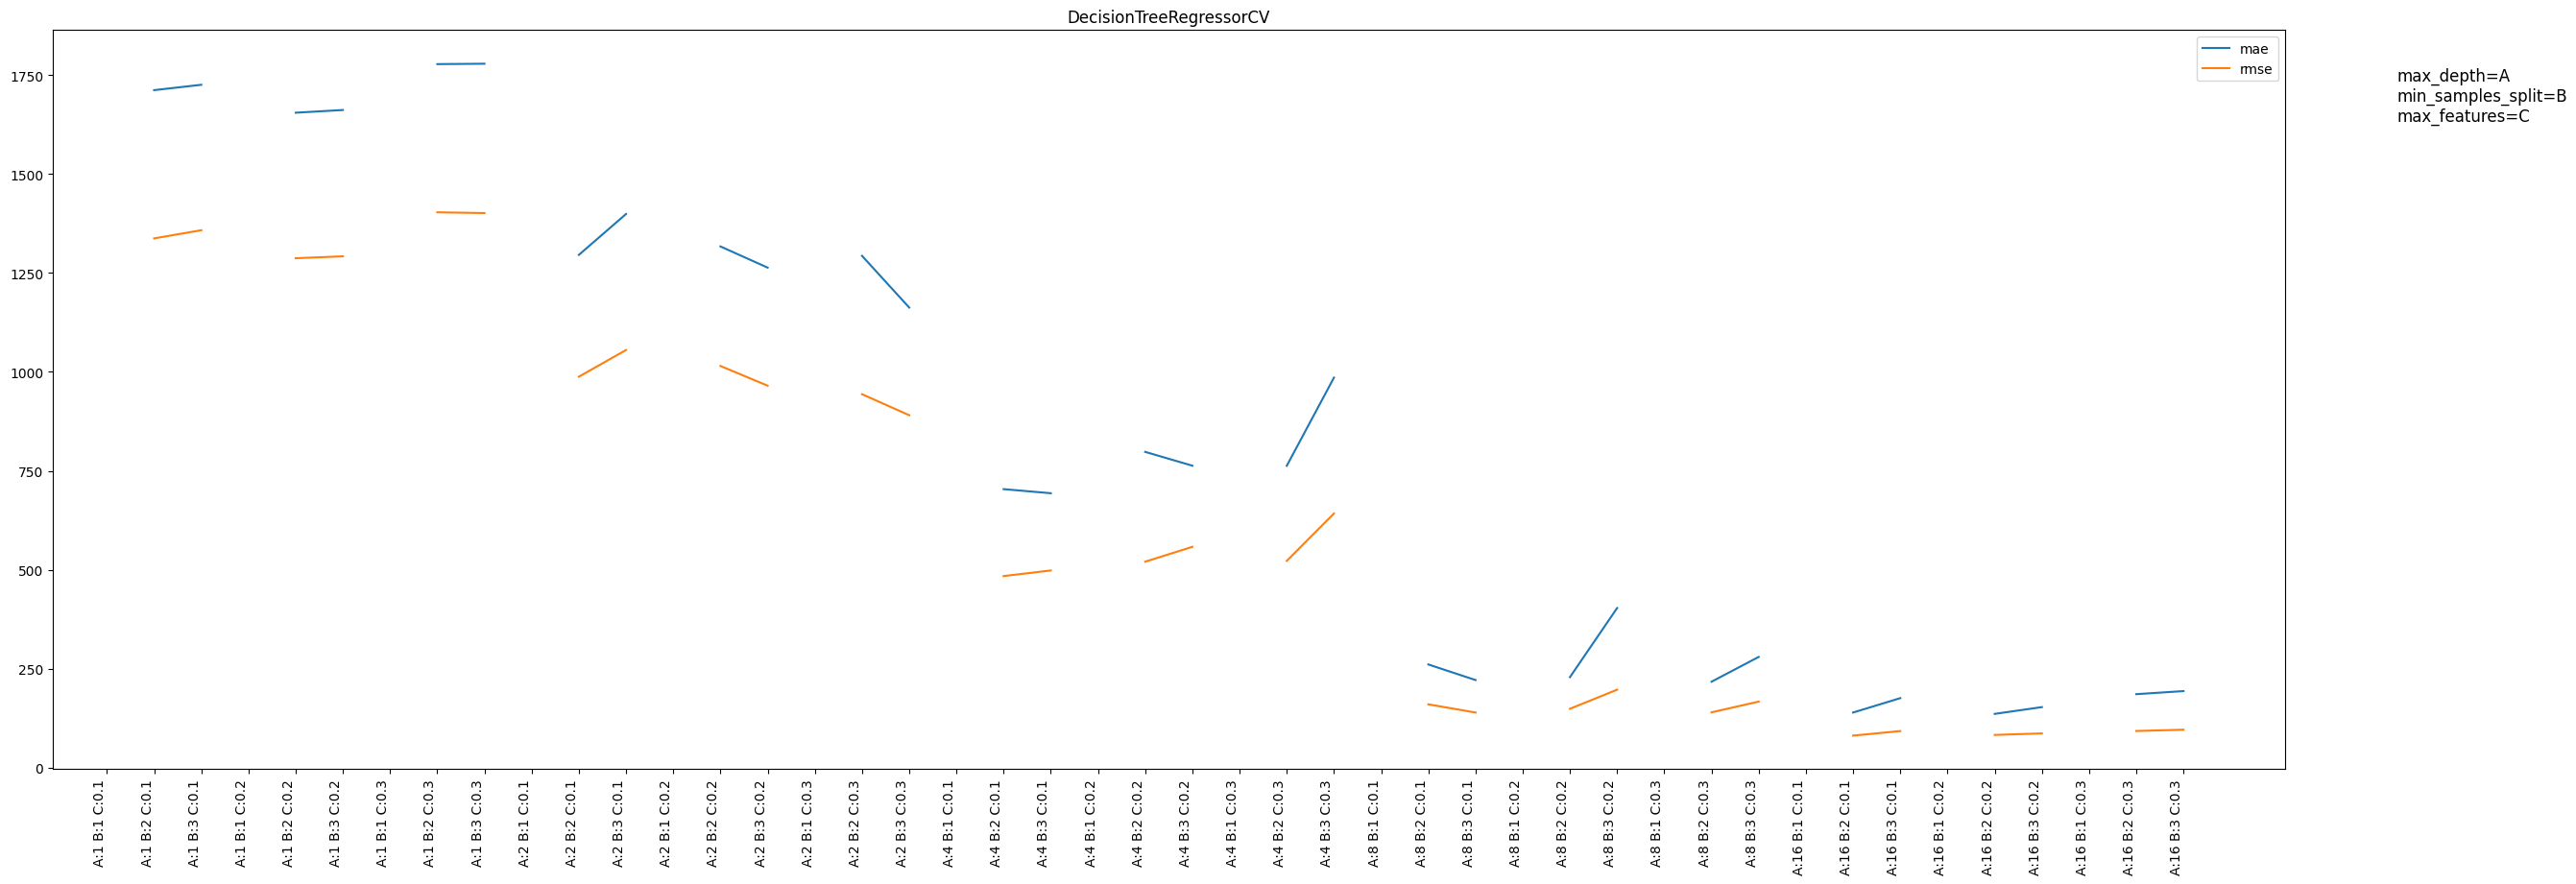

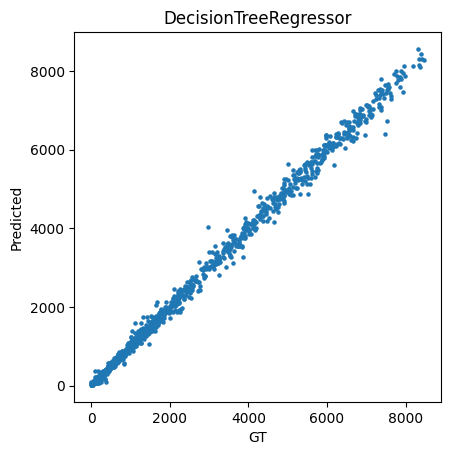

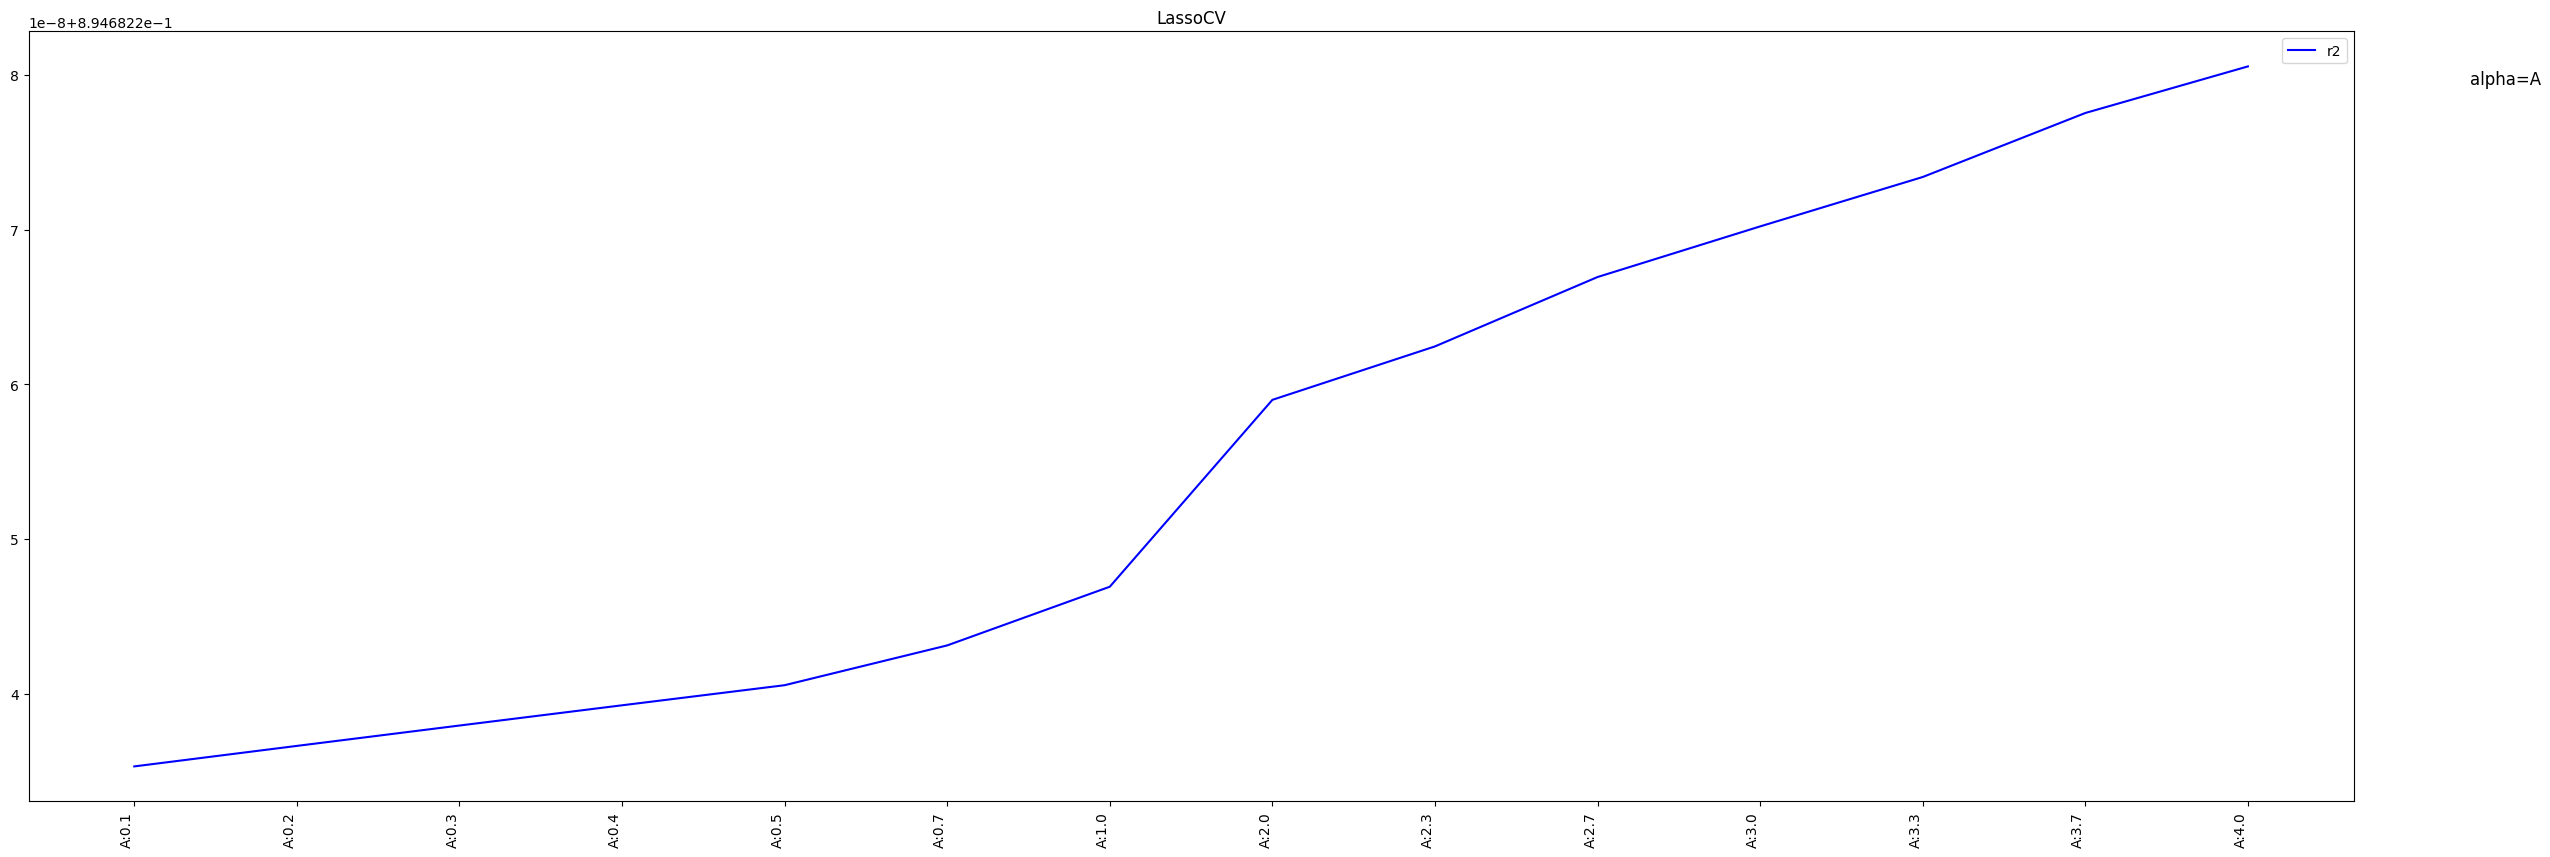

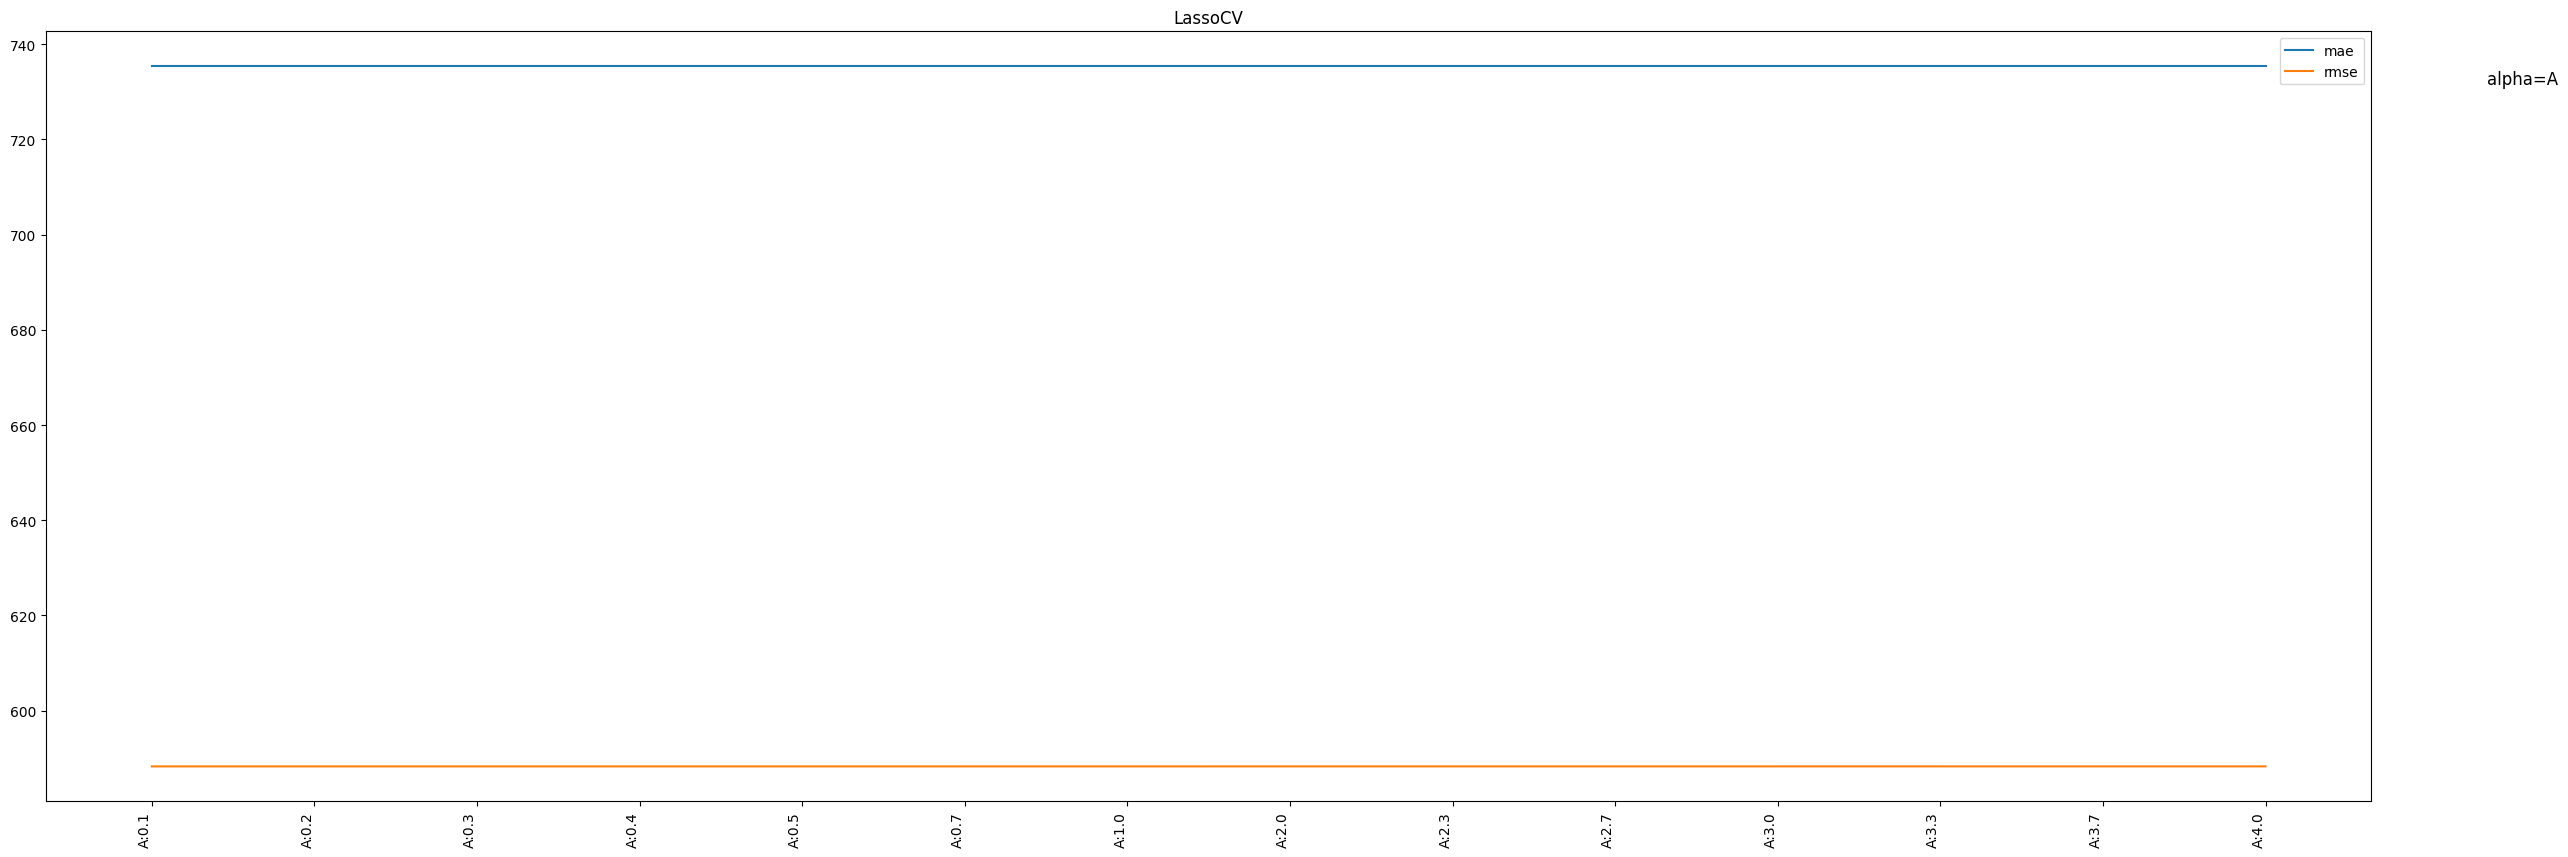

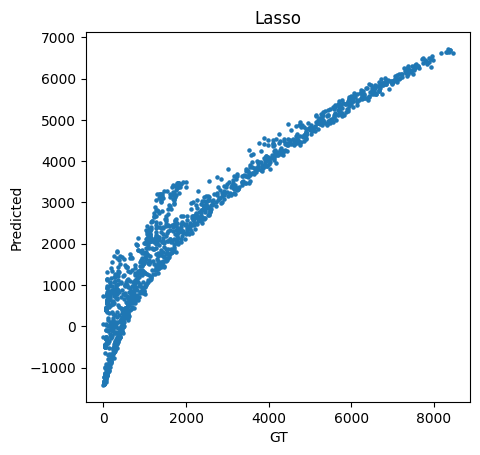

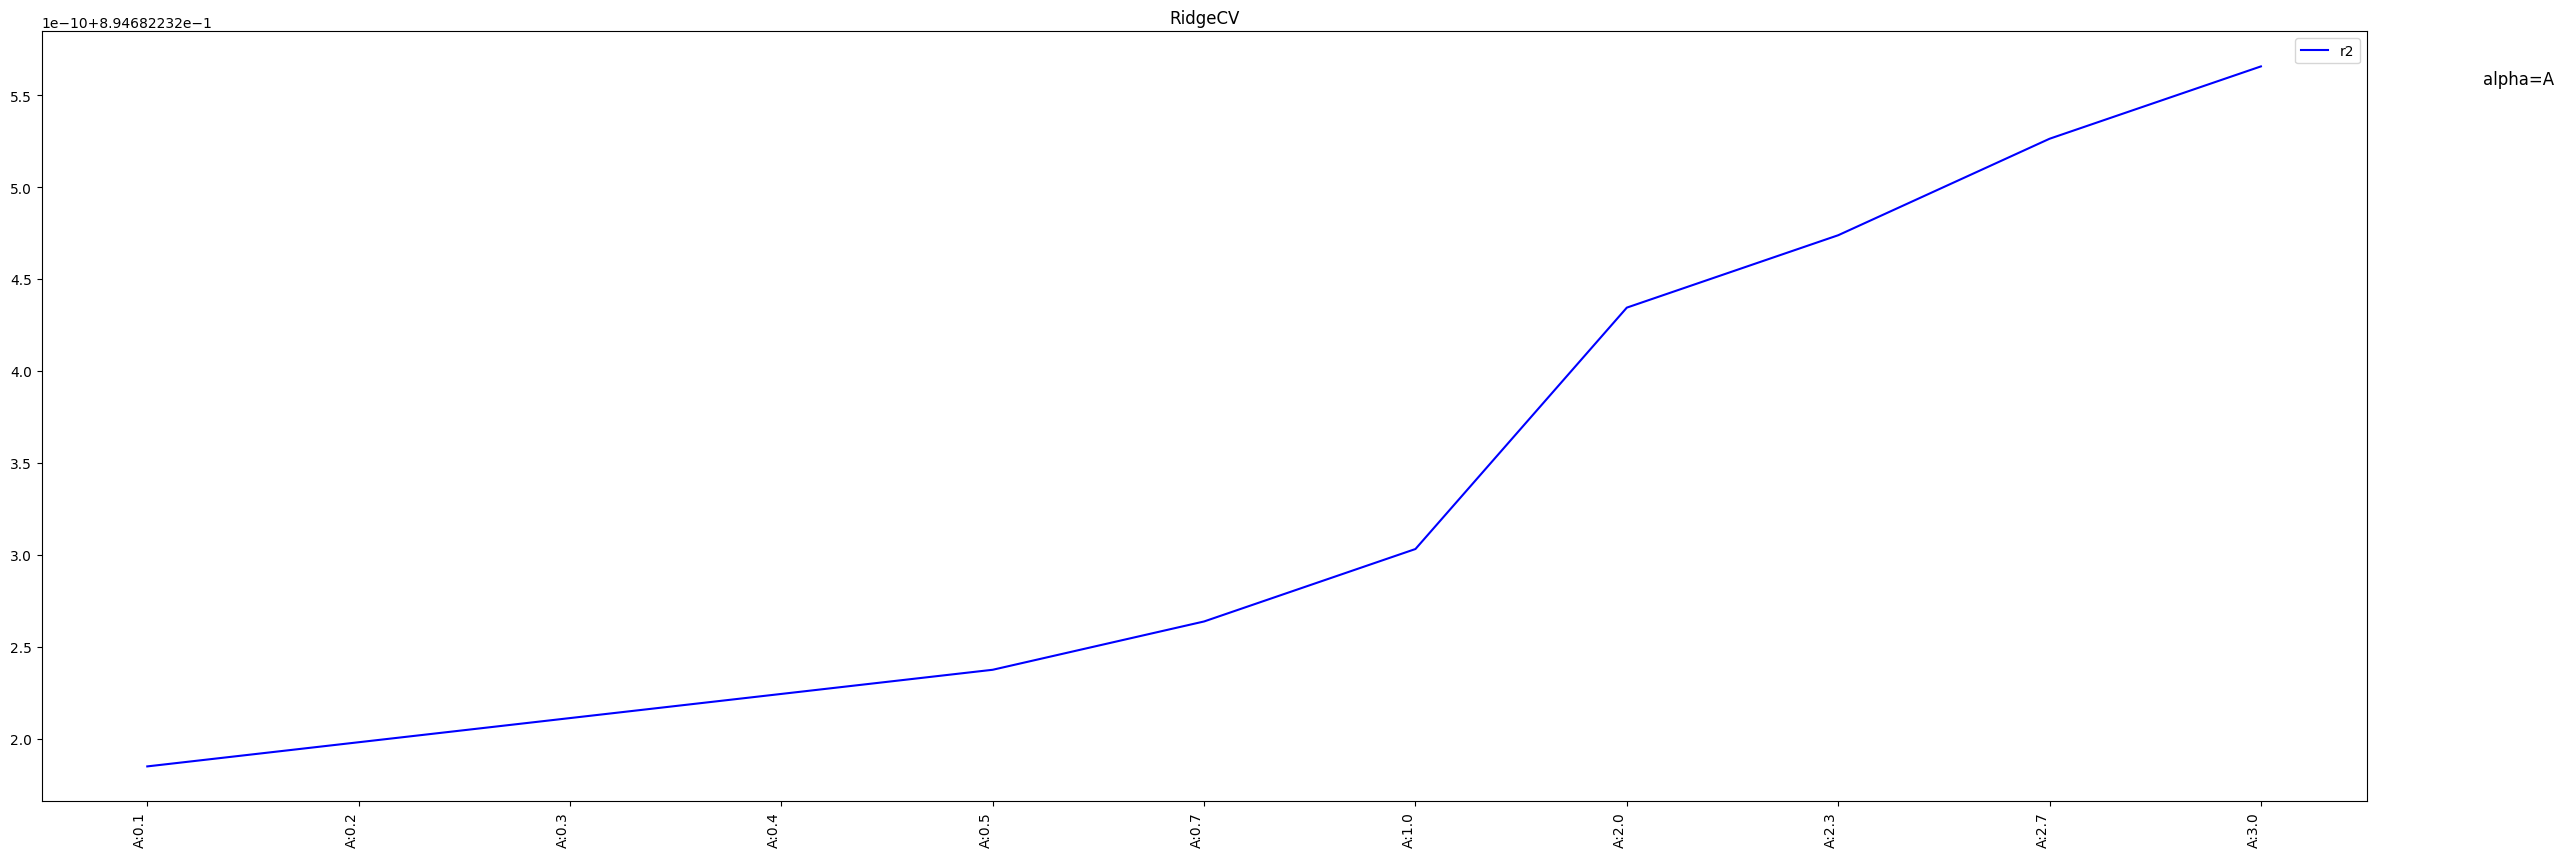

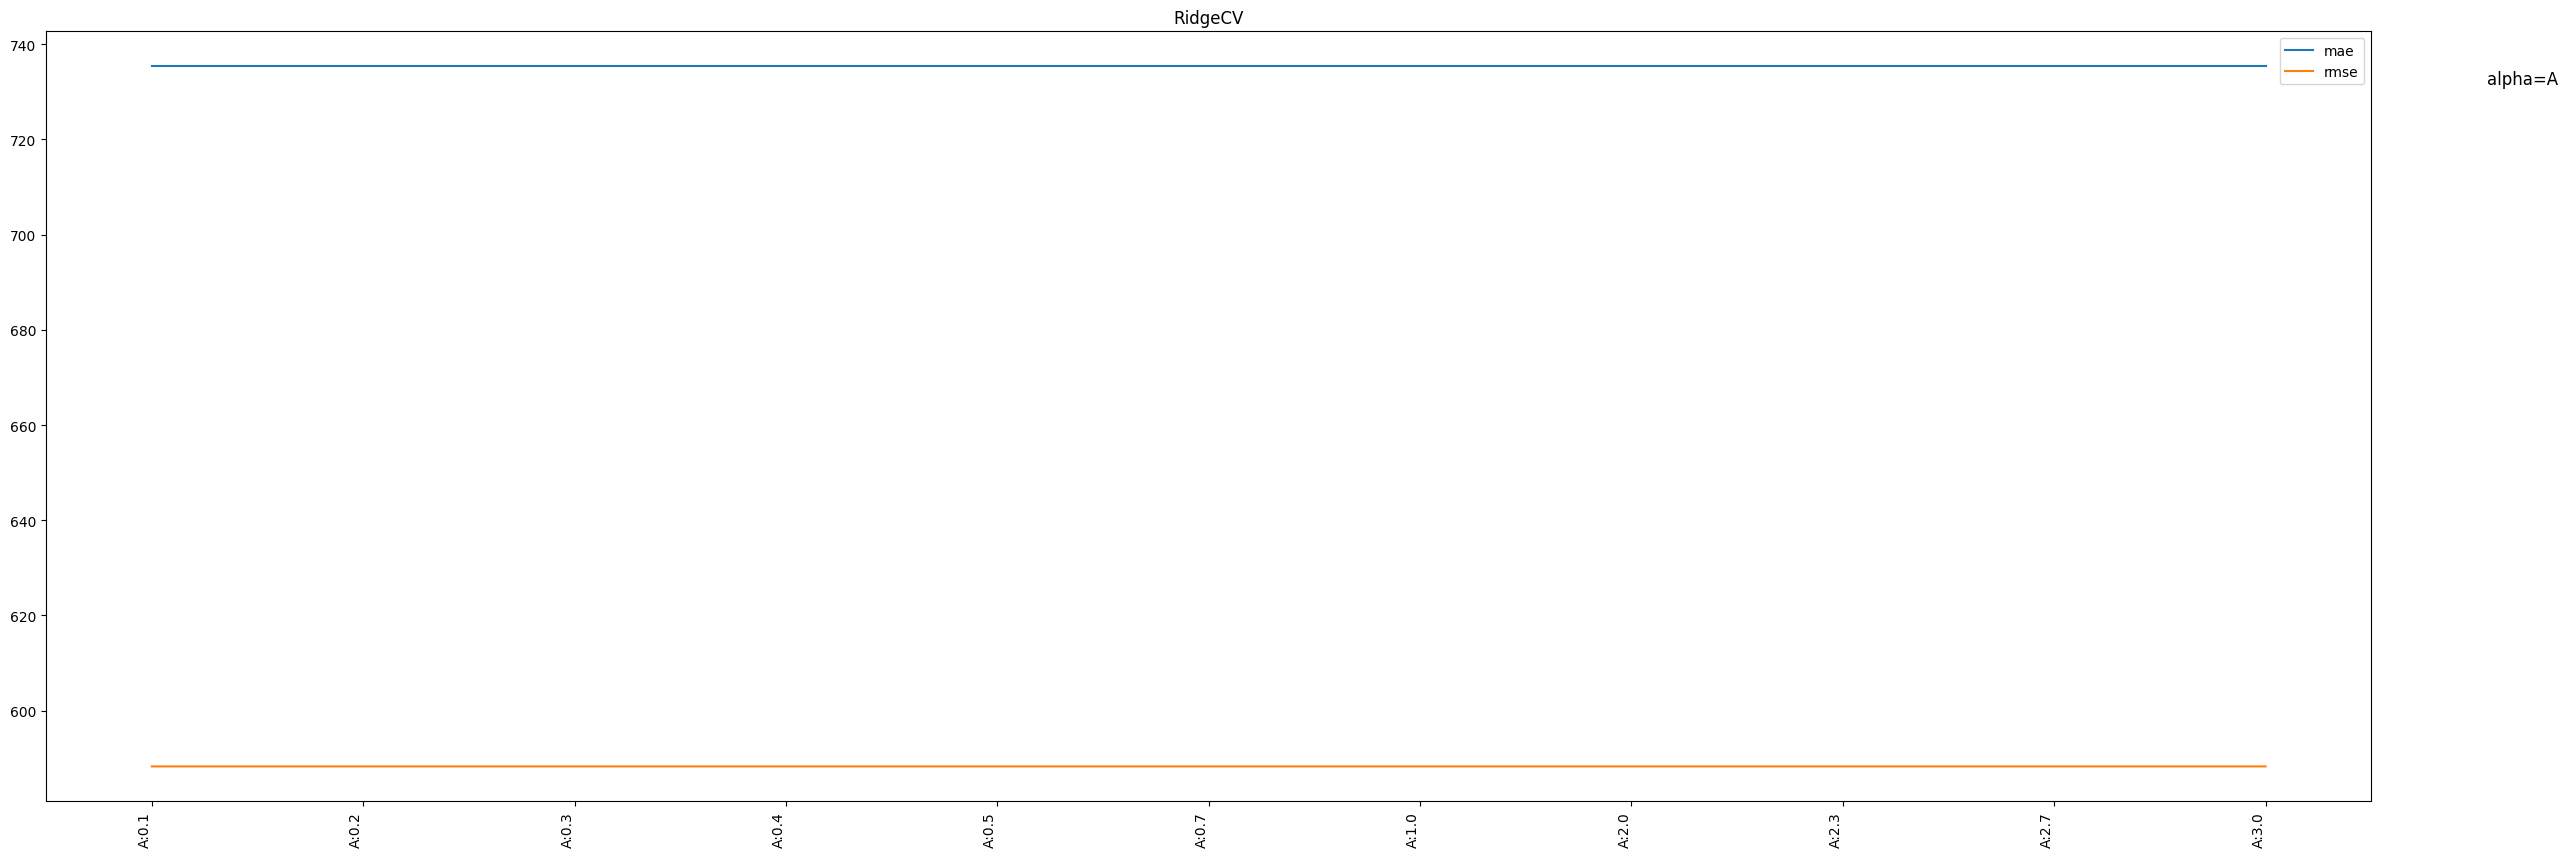

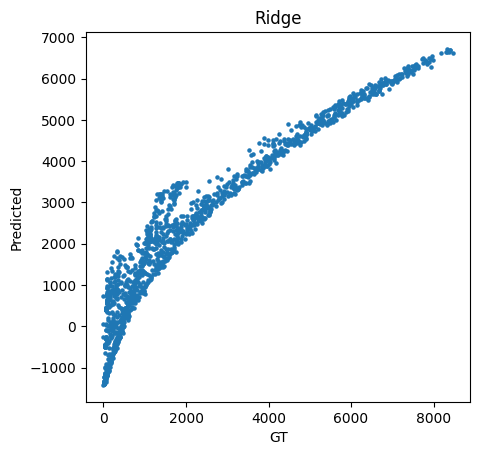

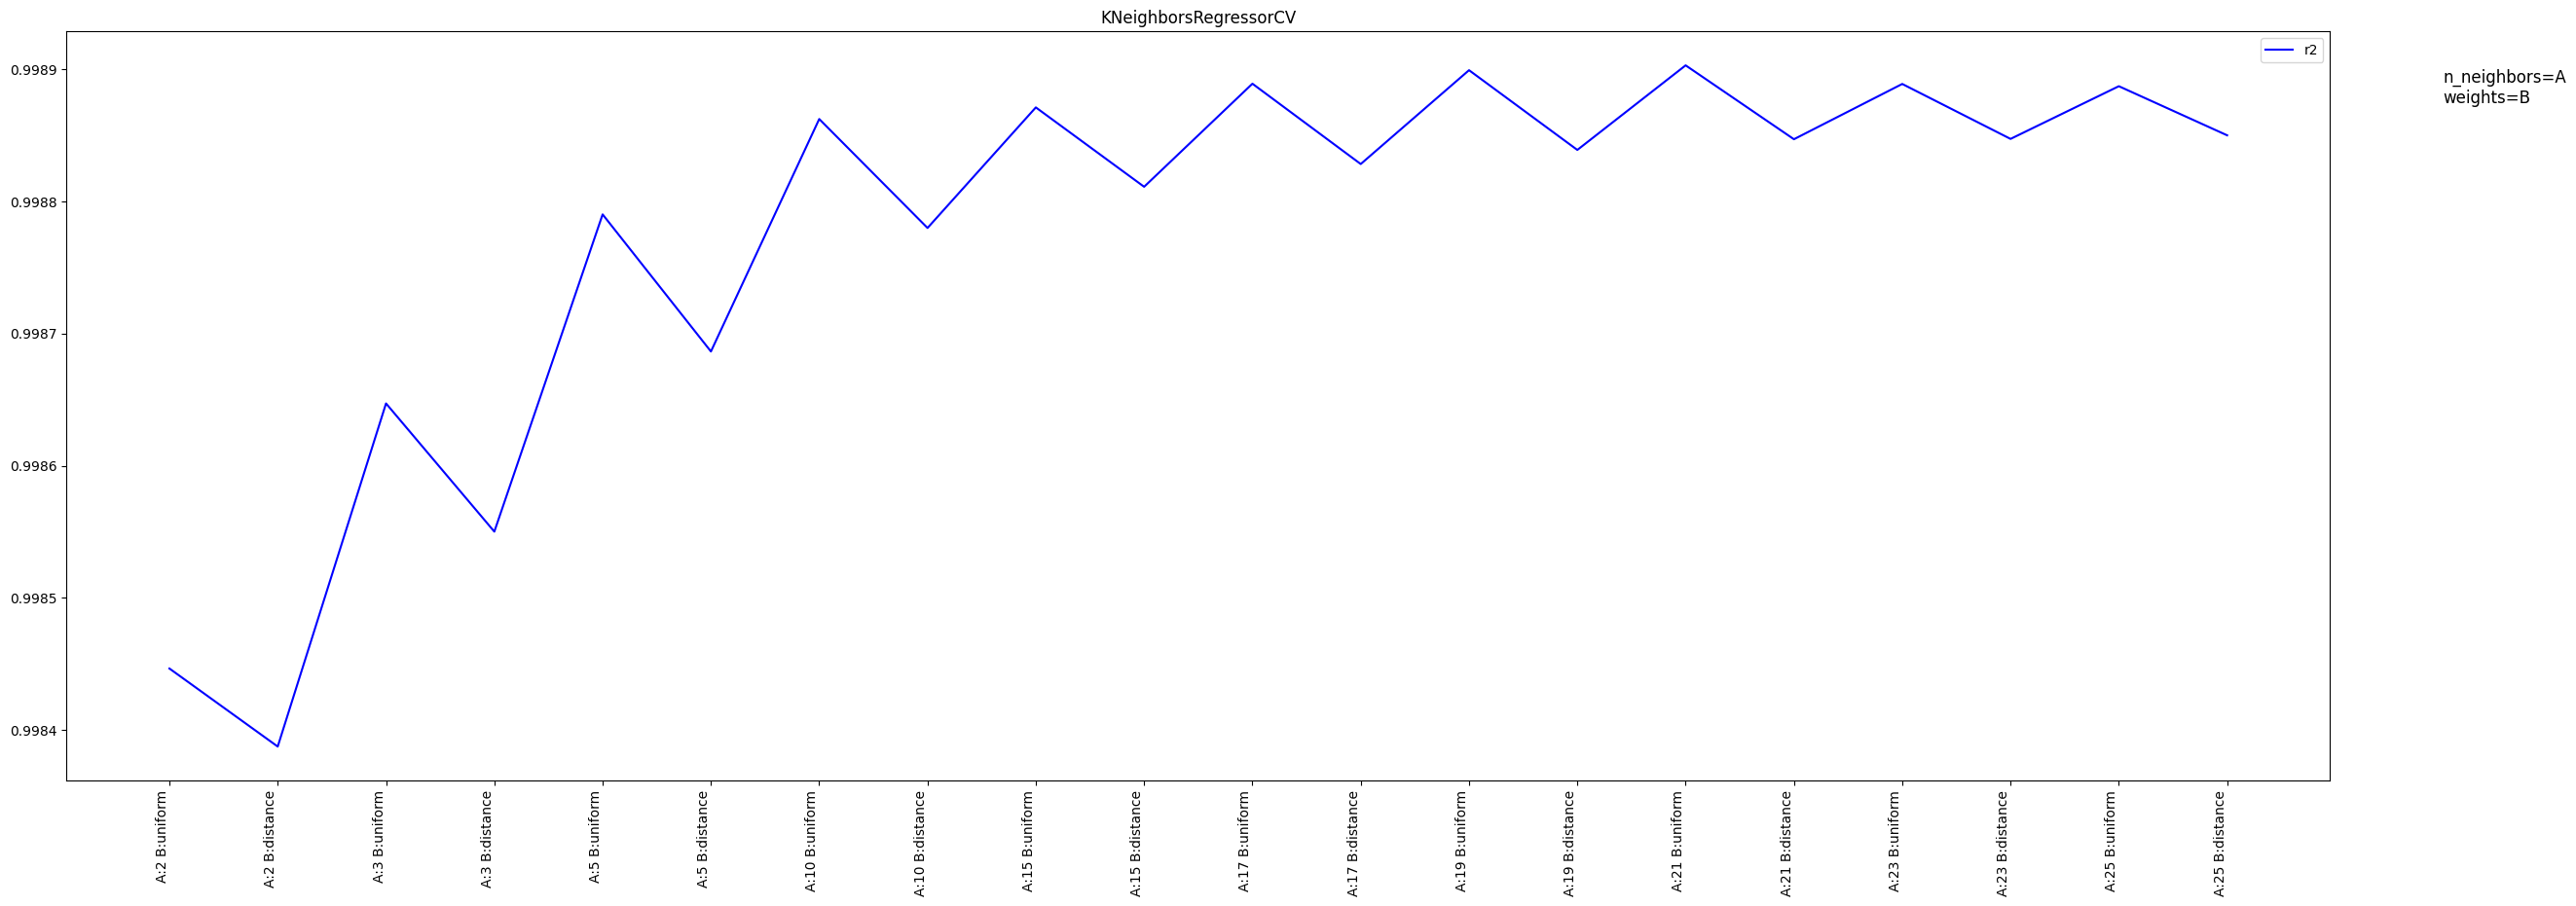

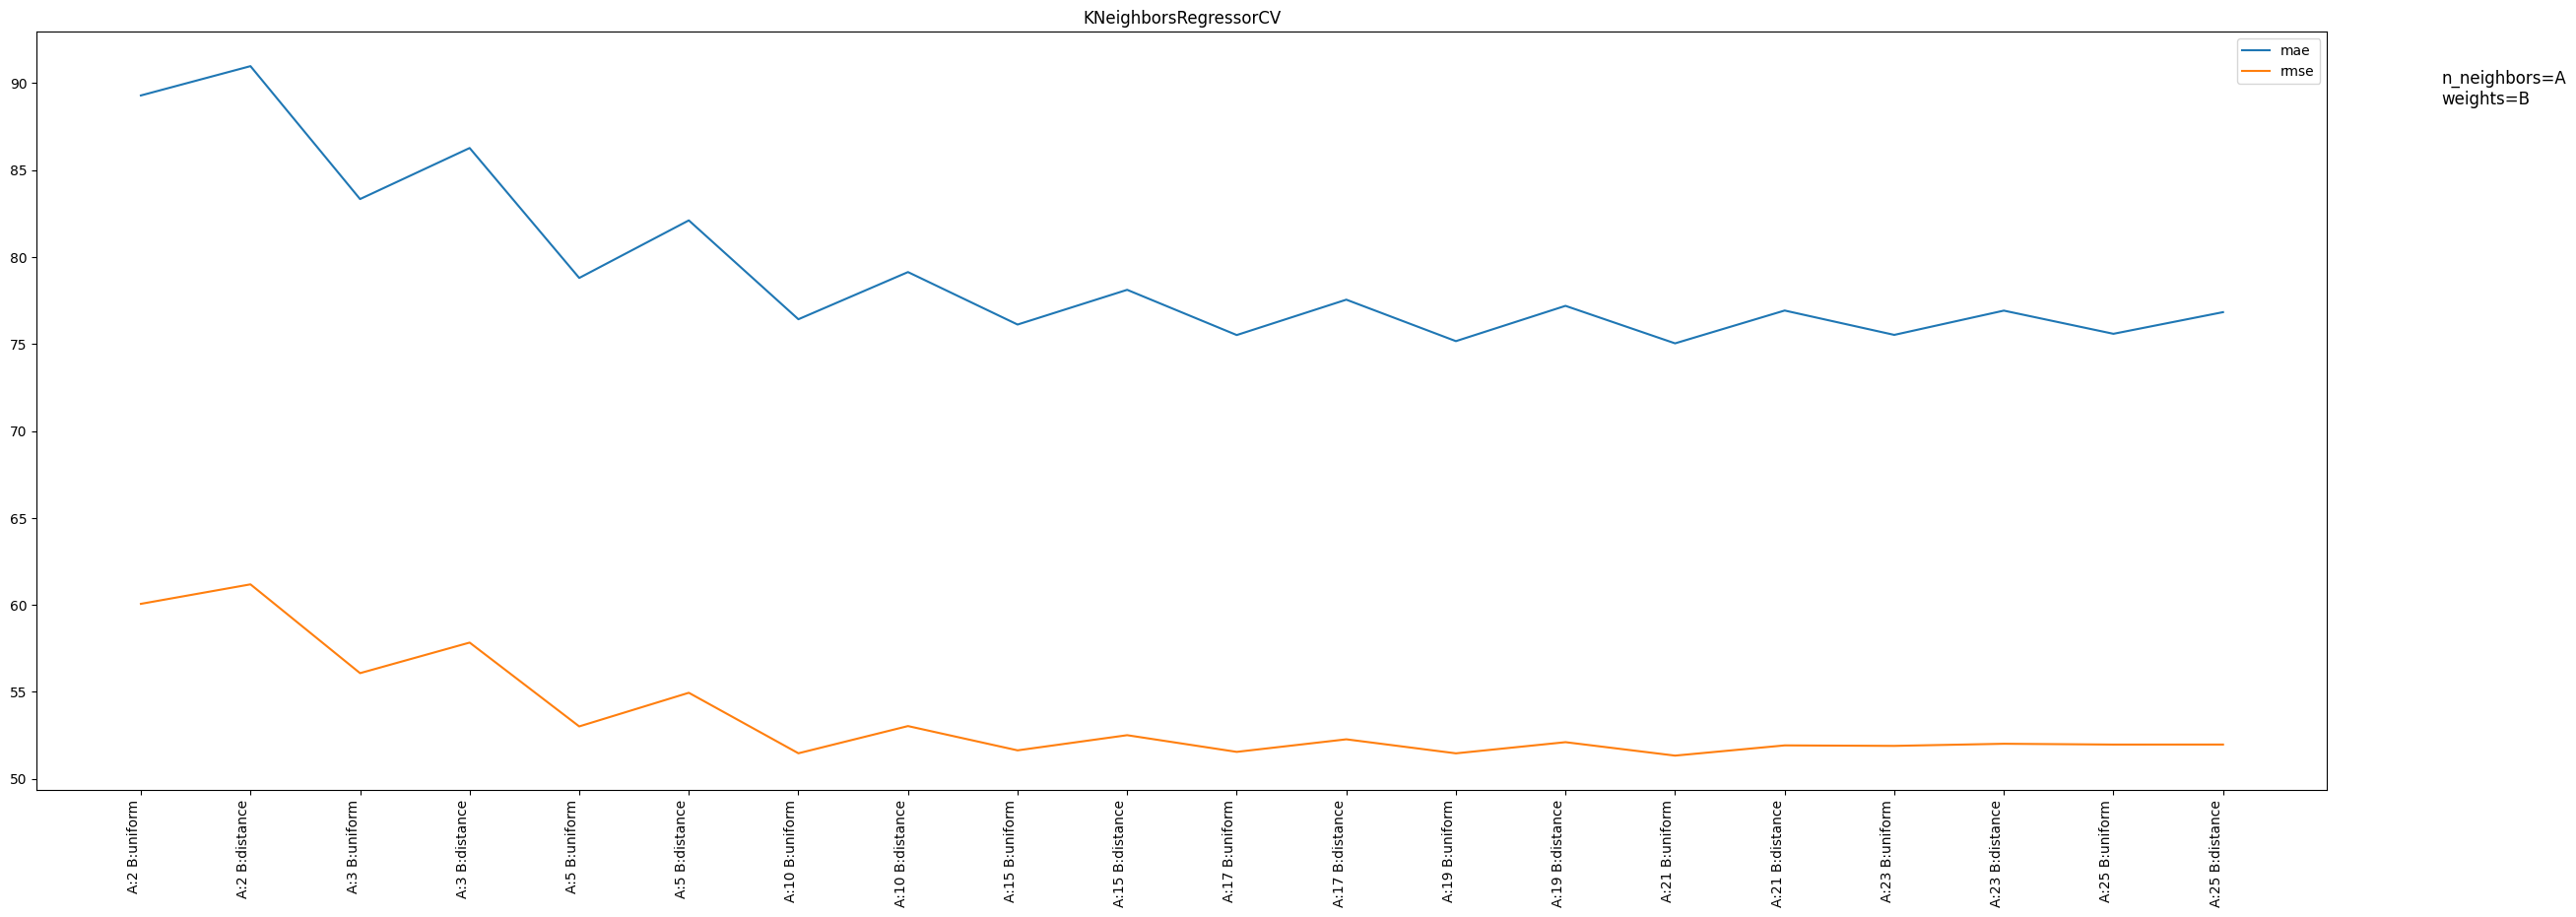

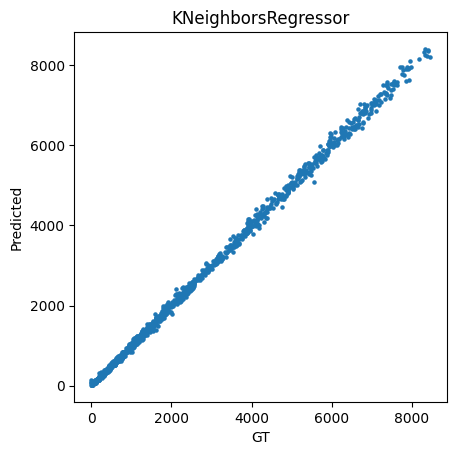

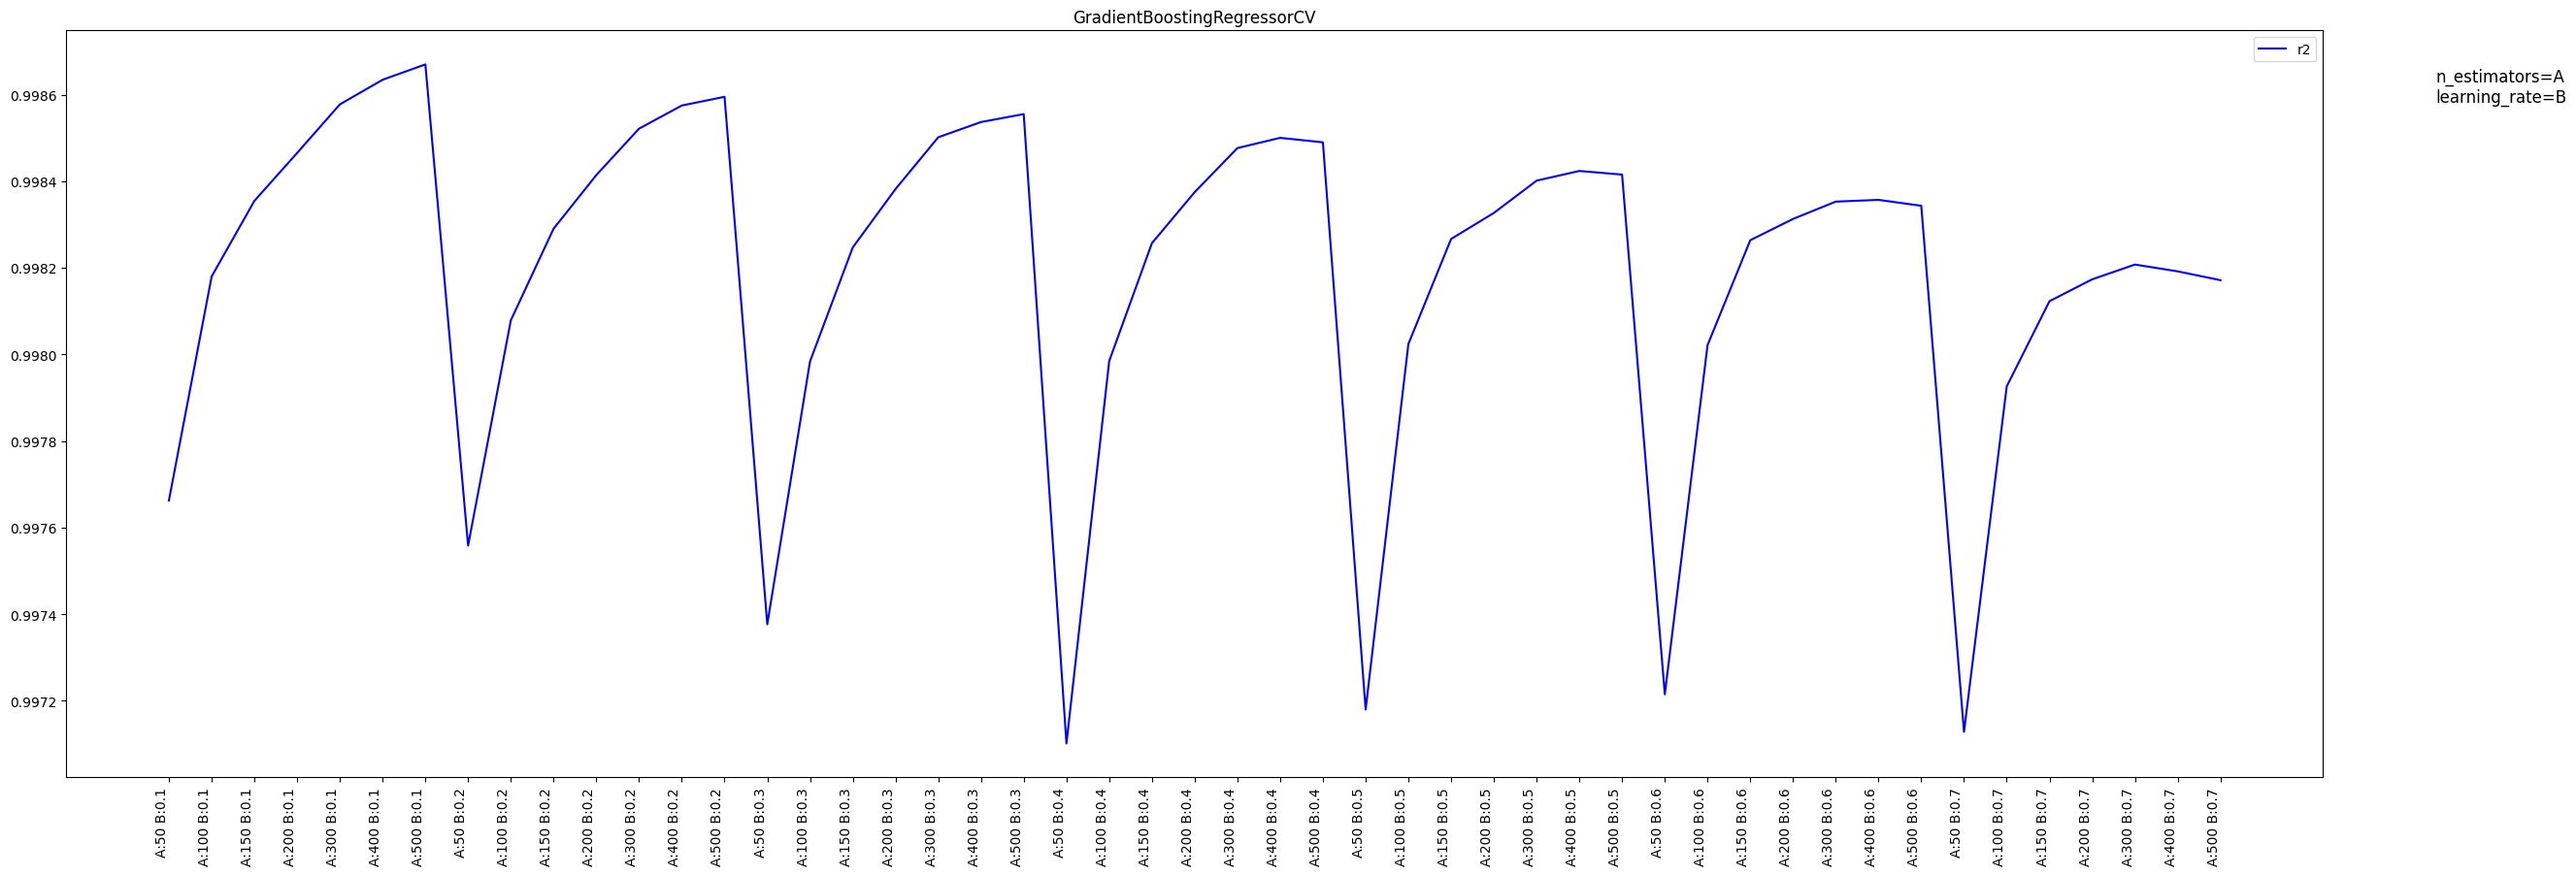

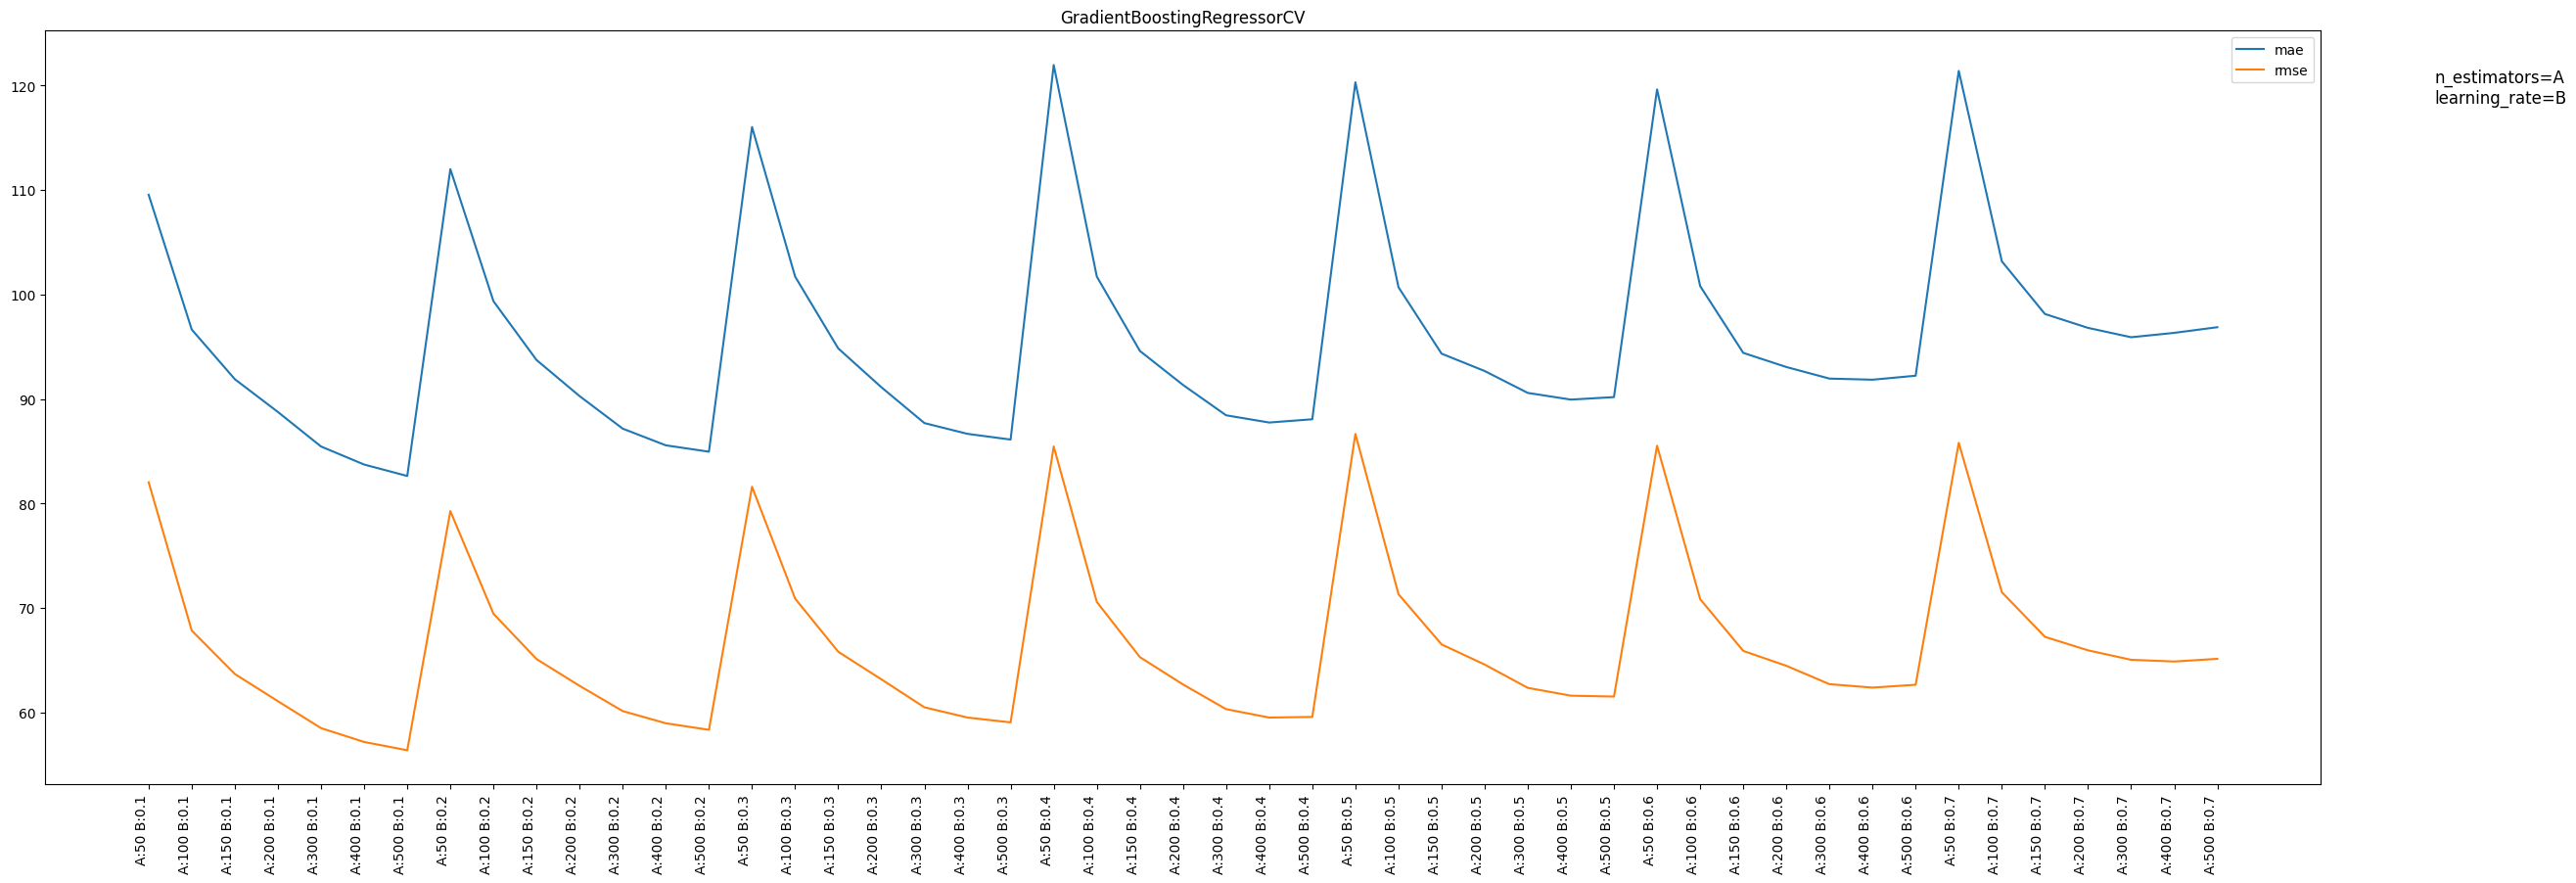

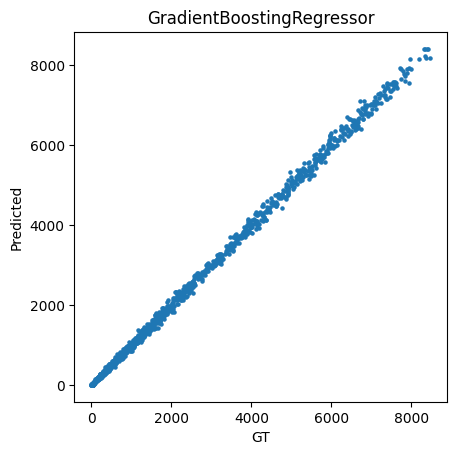

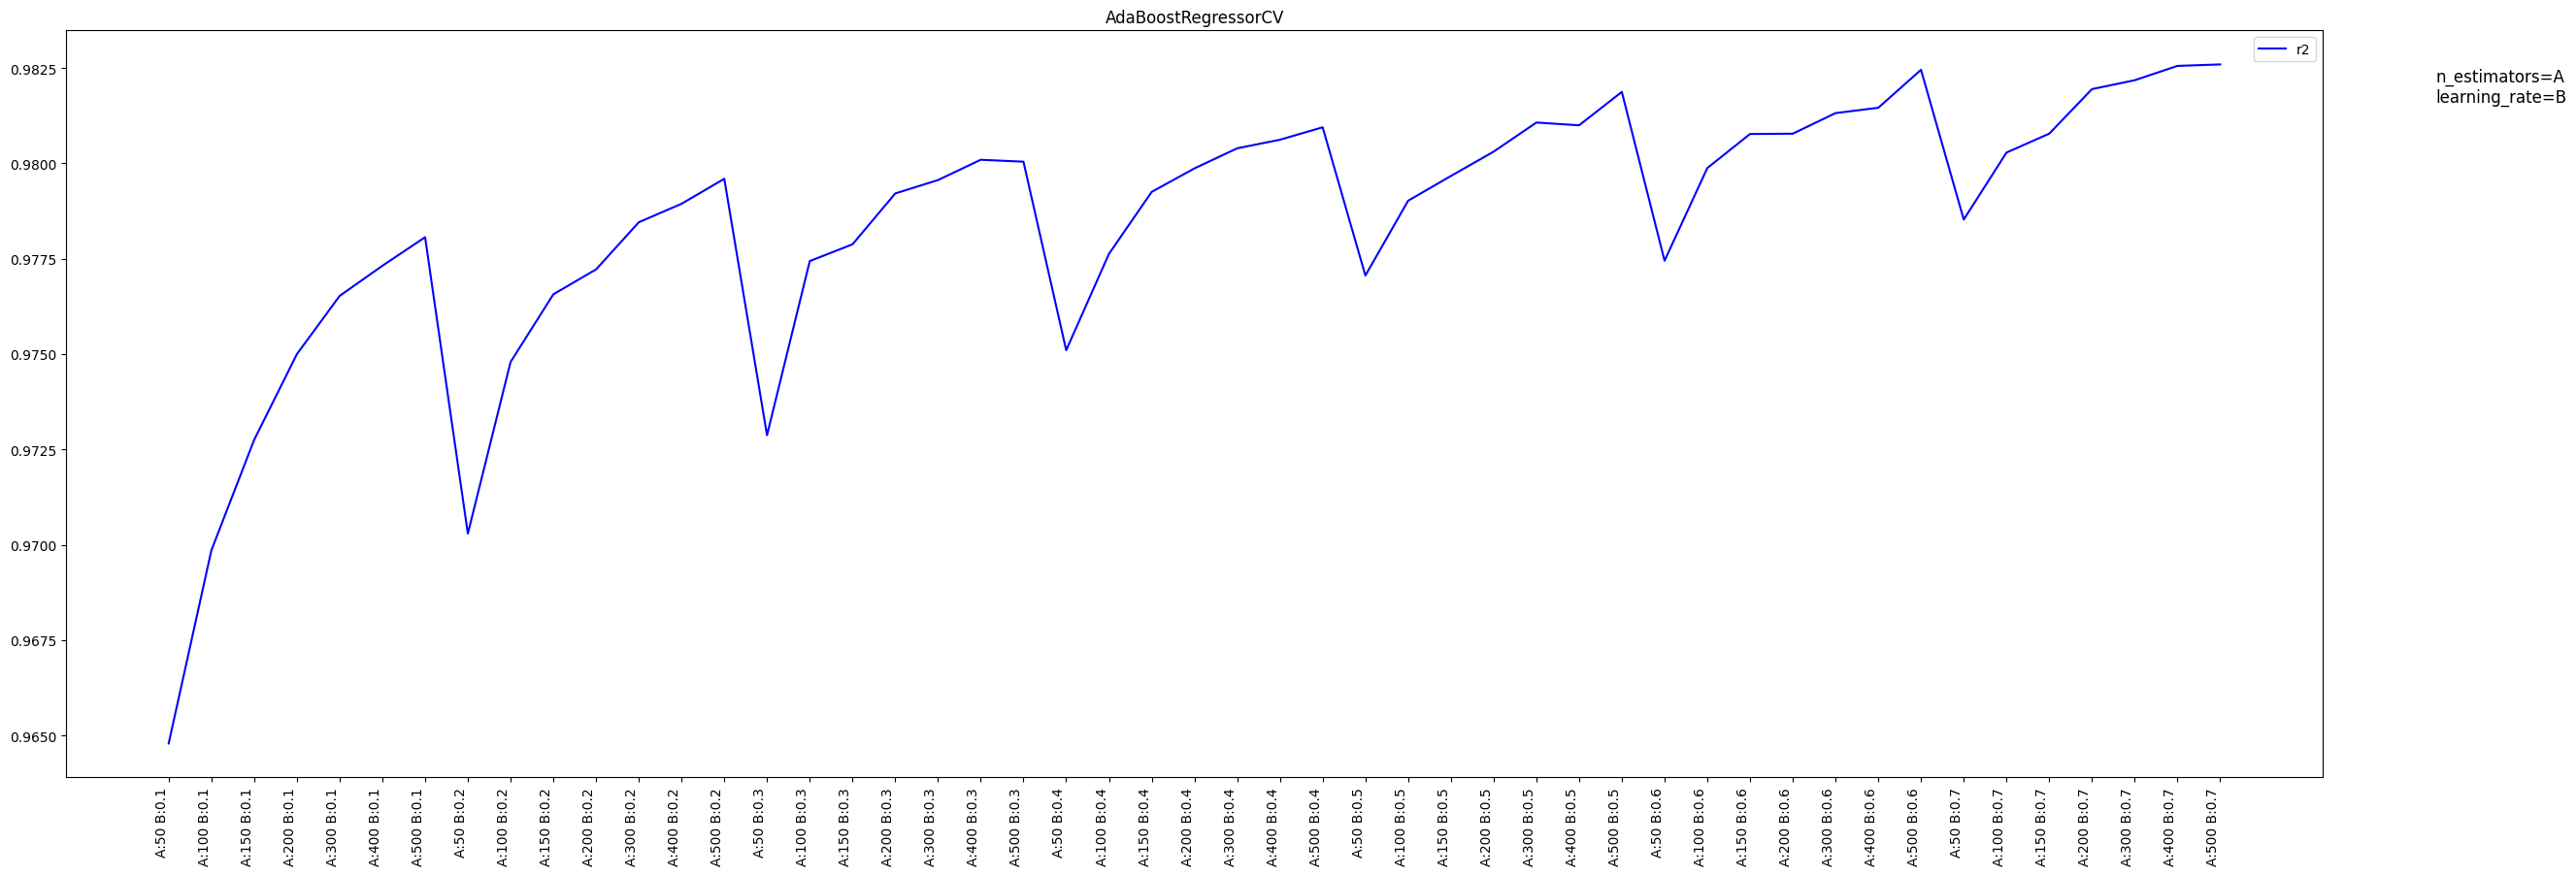

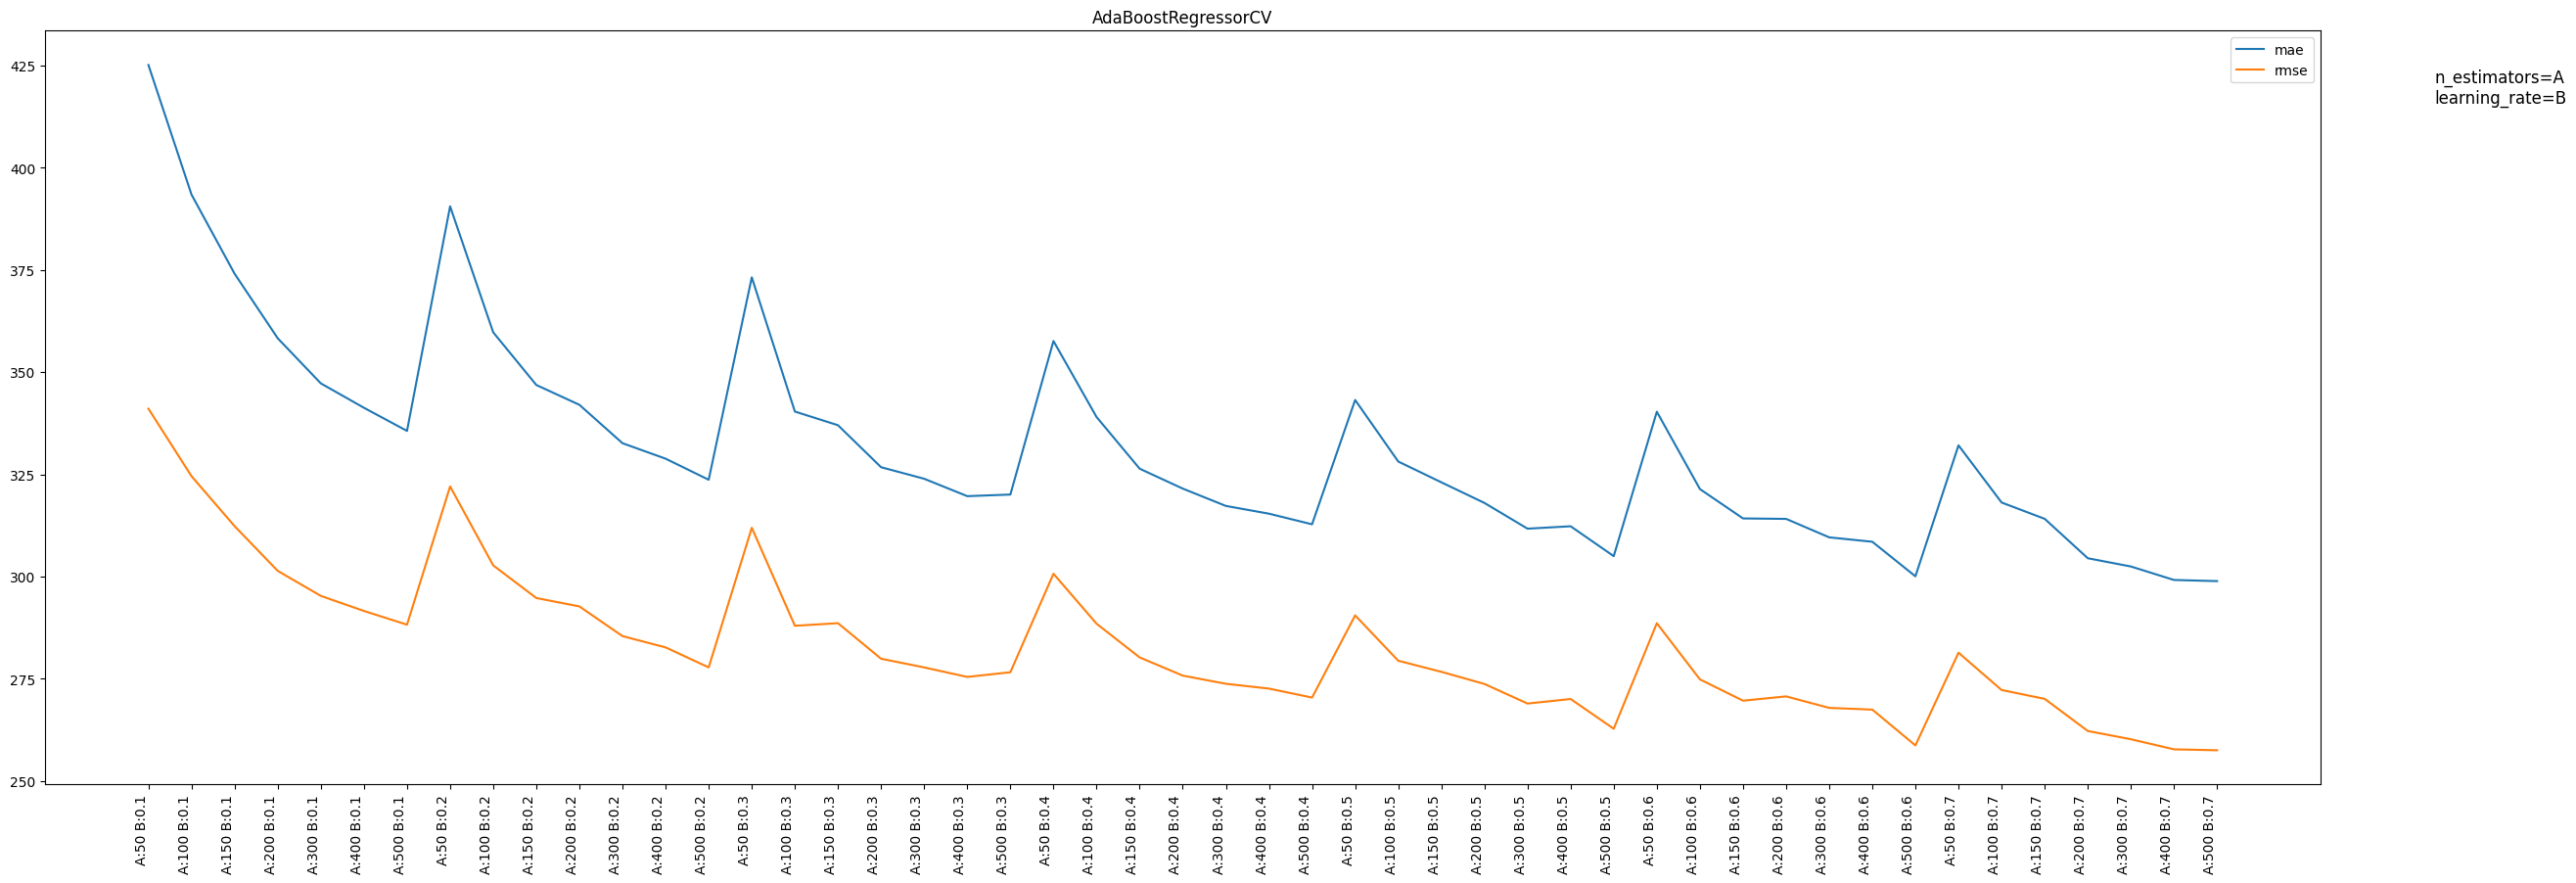

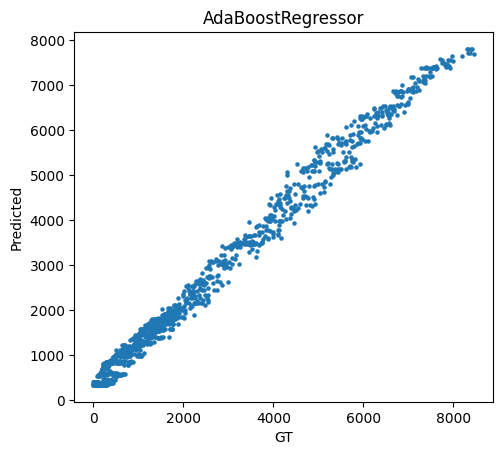

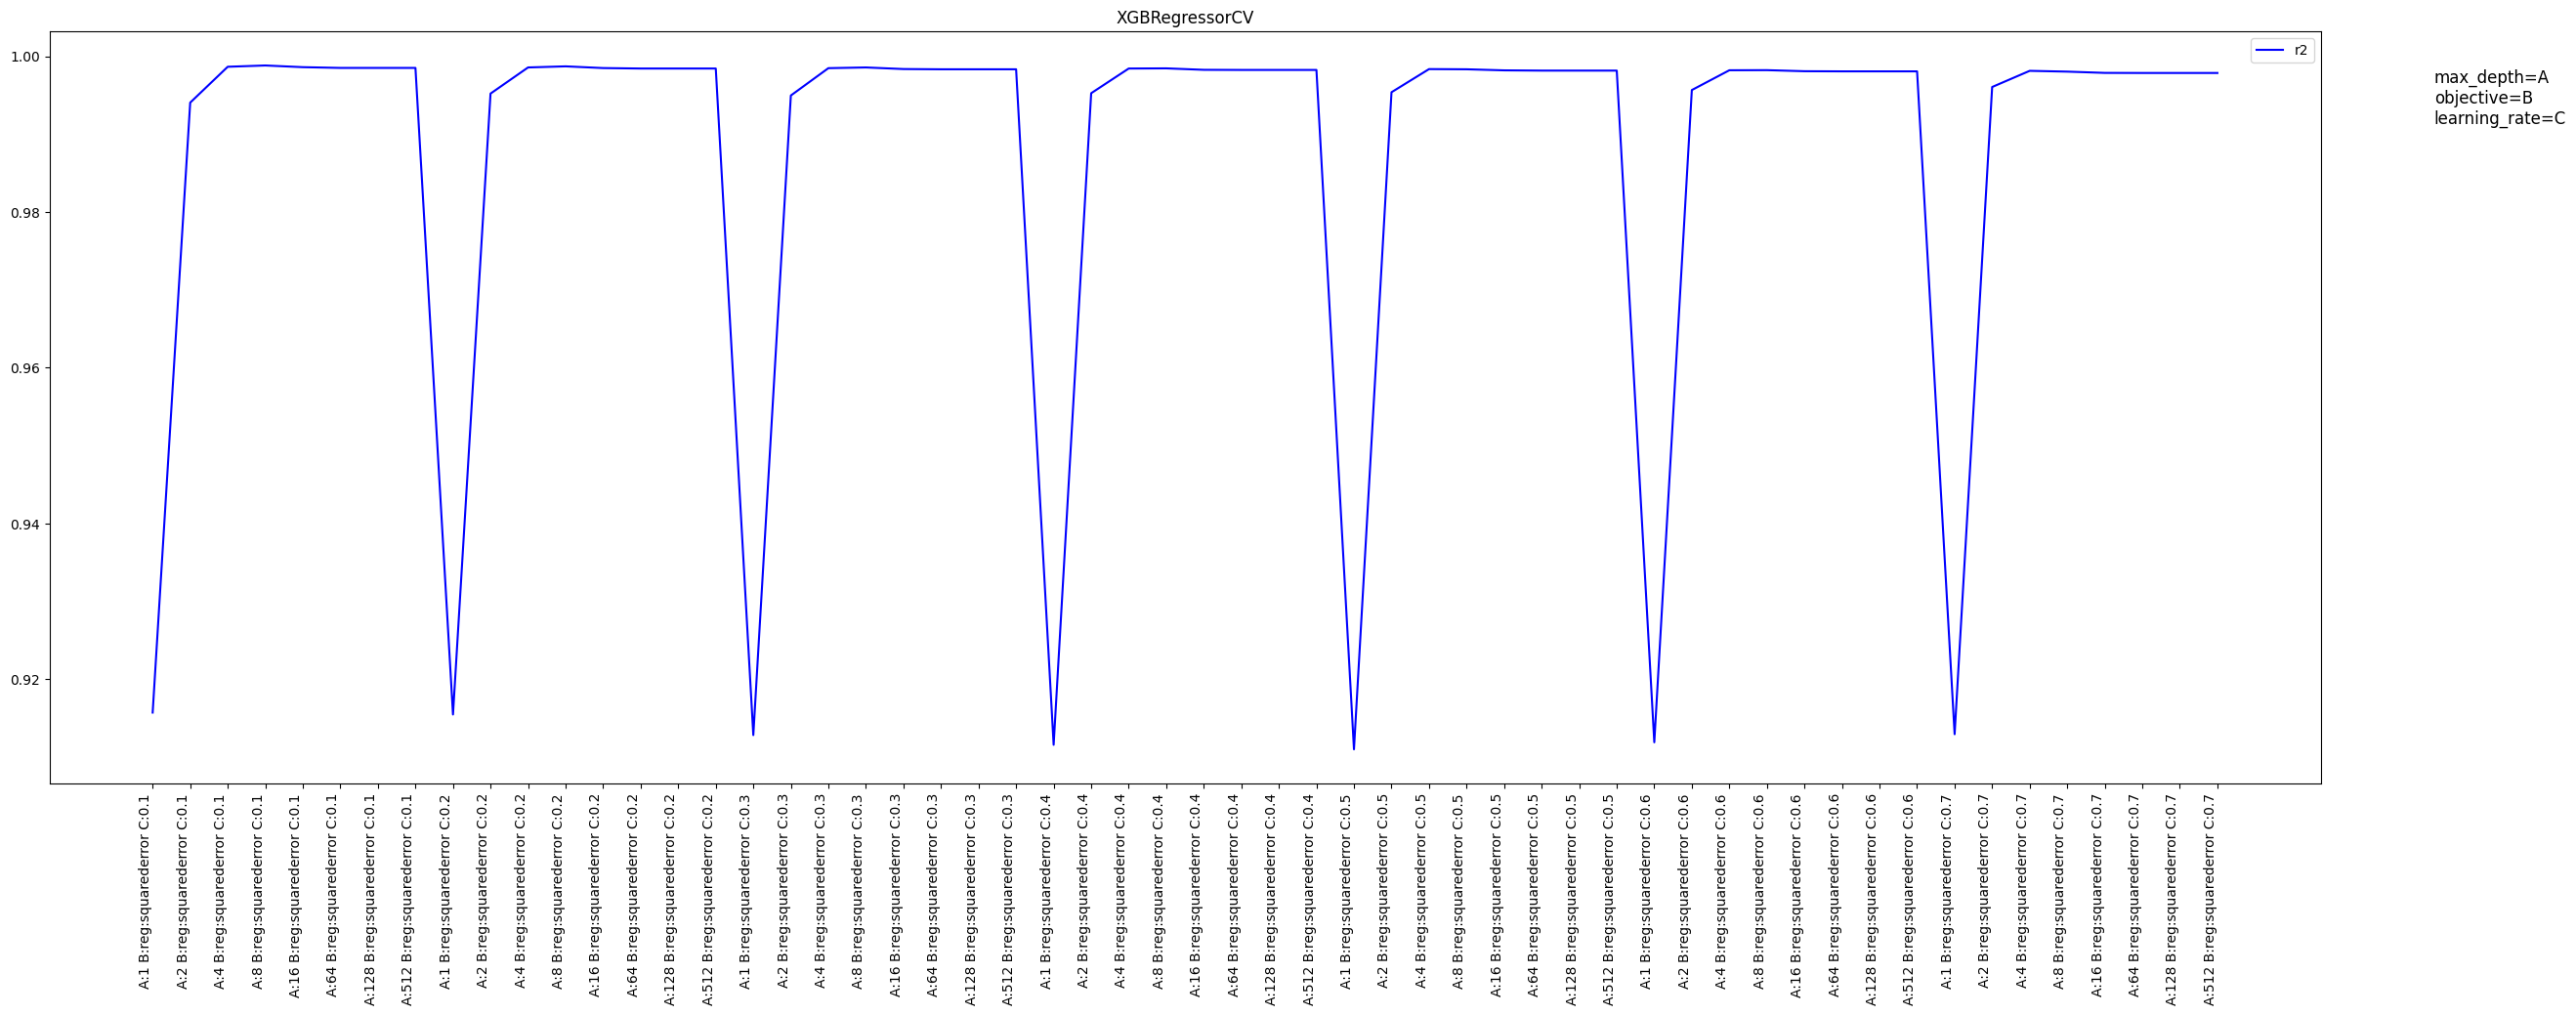

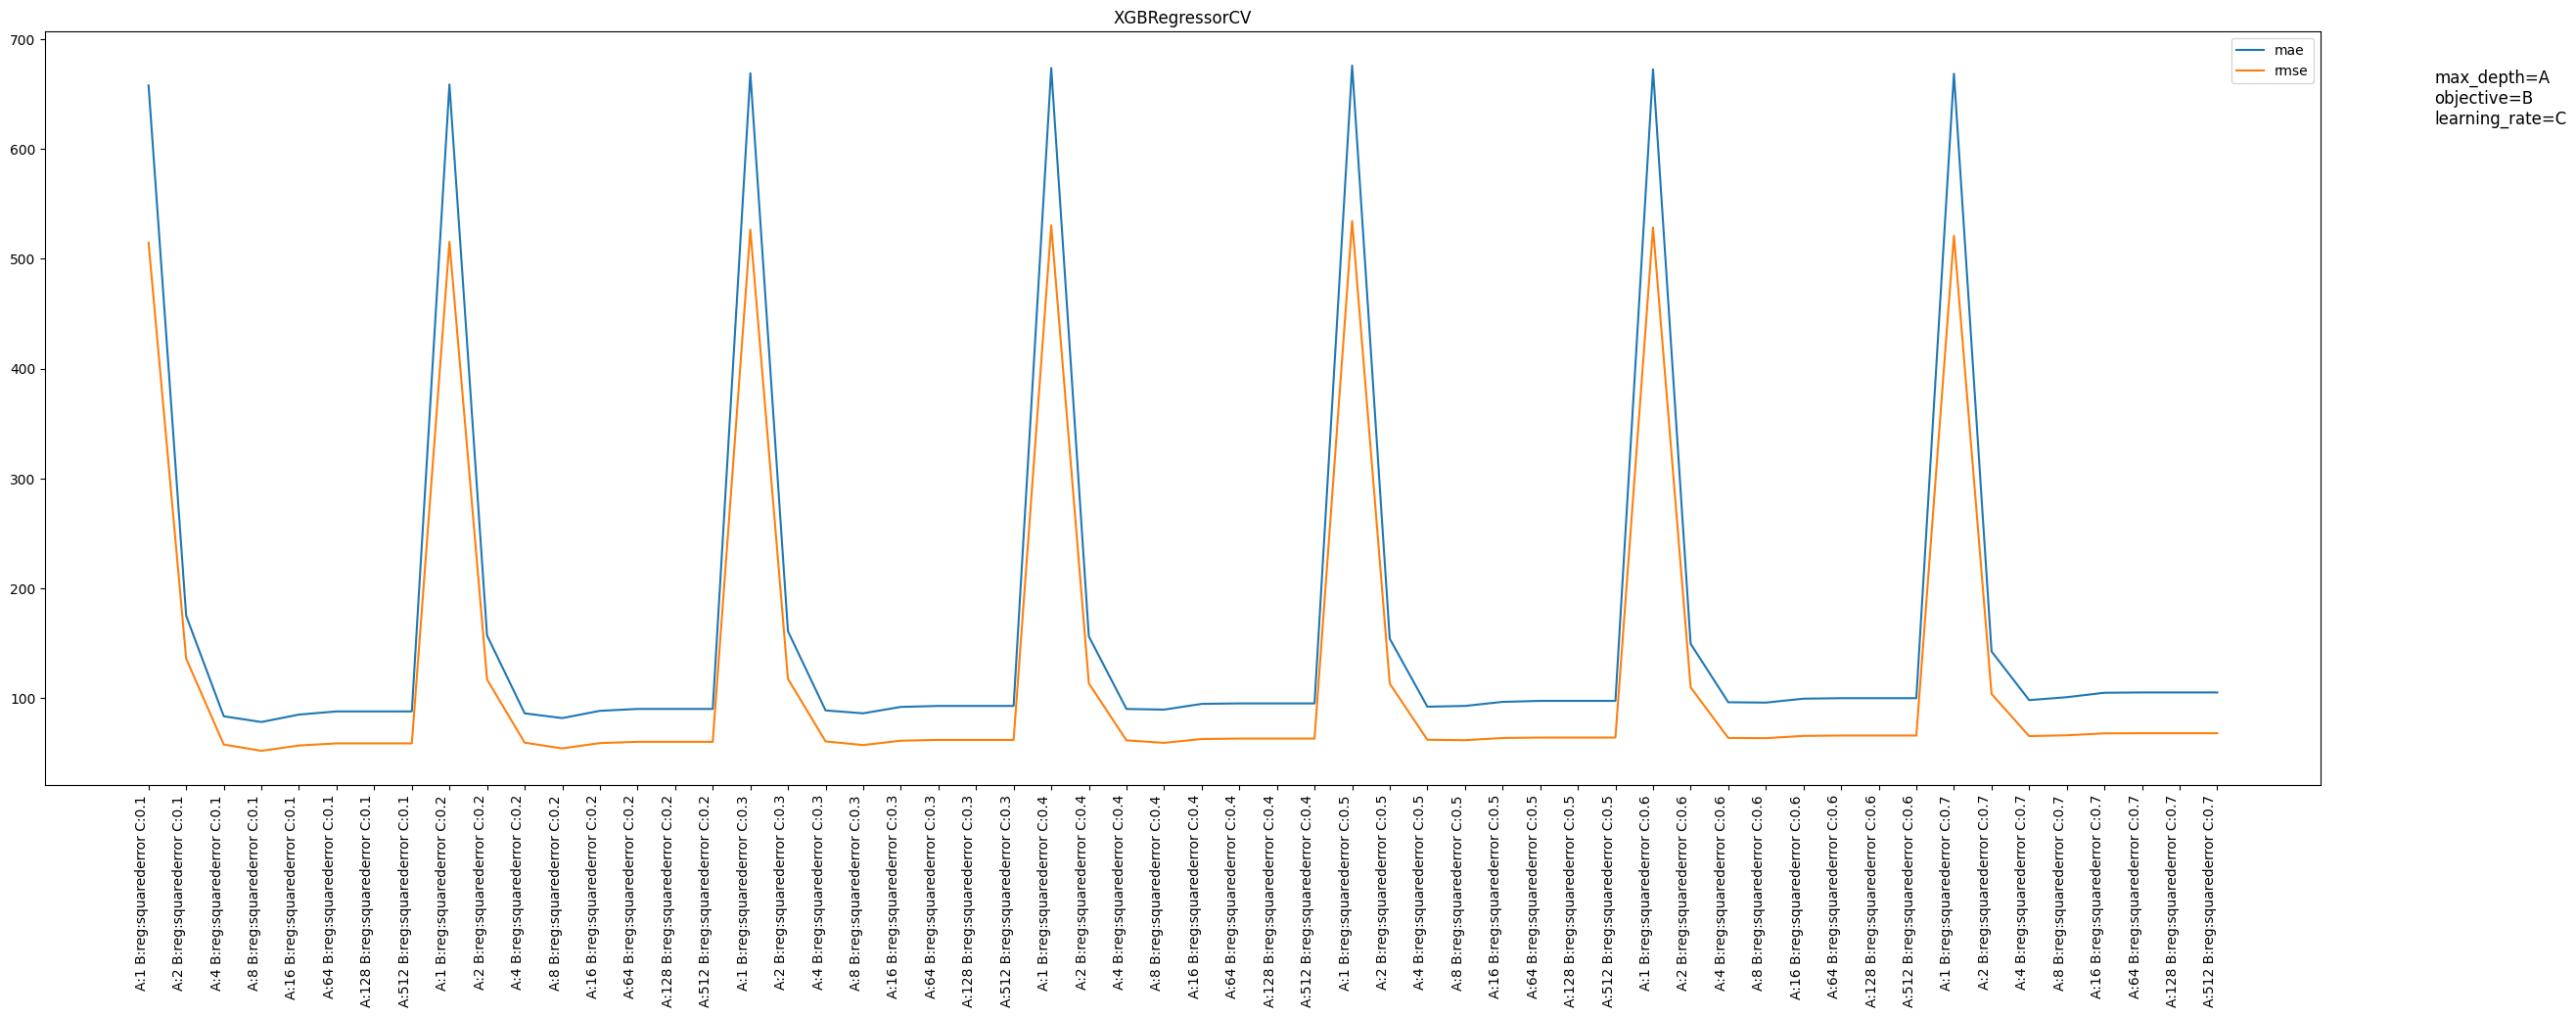

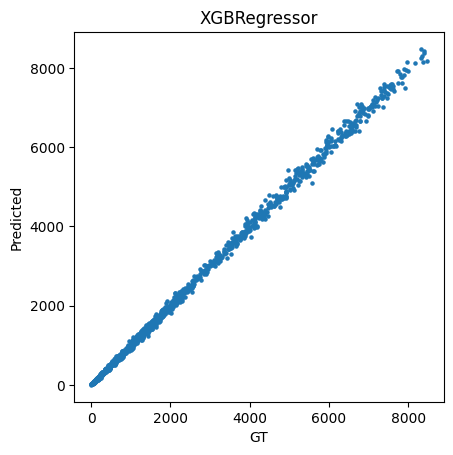

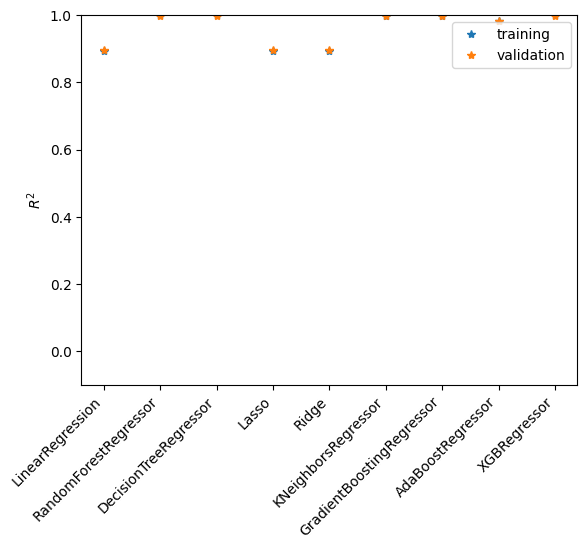

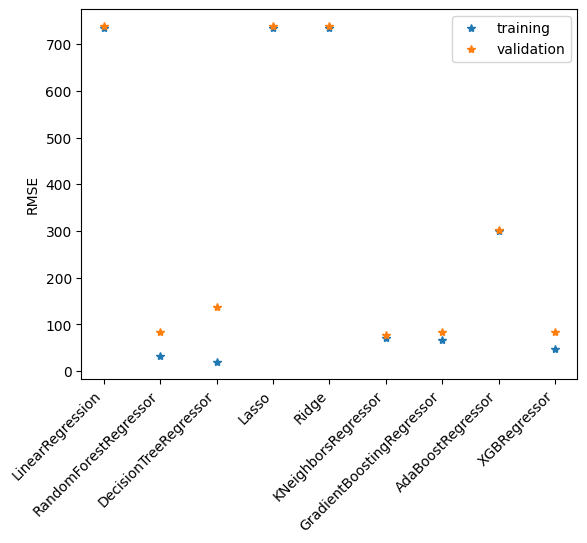

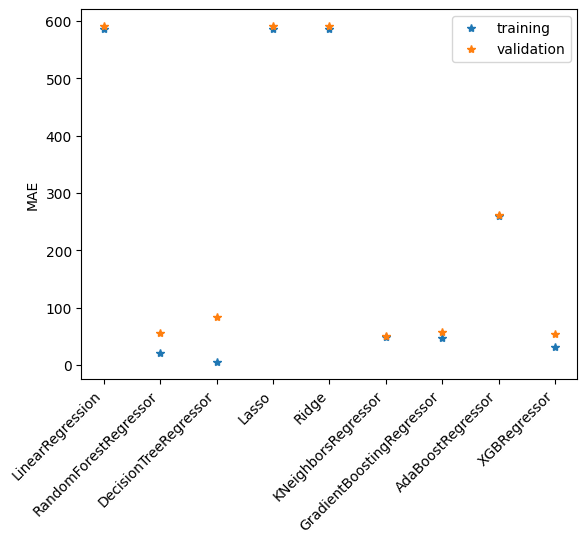

In [13]:
x = df [['MonthlyCharges','tenure' ]]
y = df['TotalCharges']
res = best_model(x, y, 'regression' , 'Yes', df = pd.concat([x, y], axis=1), hue = None, models = None)